In [1]:
from IPython.display import set_matplotlib_formats, display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
from cycler import cycler

# 맷플롯립 한글 폰트 지정
import matplotlib
matplotlib.rc('font', family='NanumBarunGothic')
matplotlib.rcParams['axes.unicode_minus'] = False

set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 300
plt.rcParams['image.cmap'] = "viridis"
plt.rcParams['image.interpolation'] = "none"
plt.rcParams['savefig.bbox'] = "tight"
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['legend.numpoints'] = 1
plt.rc('axes', prop_cycle=(
    cycler('color', mglearn.plot_helpers.cm_cycle.colors) +
    cycler('linestyle', ['-', '-', "--", (0, (3, 3)), (0, (1.5, 1.5))])))


np.set_printoptions(precision=3, suppress=True)

pd.set_option("display.max_columns", 8)
pd.set_option('precision', 2)

__all__ = ['np', 'mglearn', 'display', 'plt', 'pd']

# 데이터 표현과 특성 공학

In [2]:
import os

data = pd.read_csv(
    os.path.join(mglearn.datasets.DATA_PATH, "adult.data"), header=None, index_col=False,
    names=['age', 'workclass', 'fnlwgt', 'education',  'education-num',
           'marital-status', 'occupation', 'relationship', 'race', 'gender',
           'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
           'income'])
data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week',
             'occupation', 'income']]
display(data.head())

age          workclass   education   gender  hours-per-week  \
0   39          State-gov   Bachelors     Male              40   
1   50   Self-emp-not-inc   Bachelors     Male              13   
2   38            Private     HS-grad     Male              40   
3   53            Private        11th     Male              40   
4   28            Private   Bachelors   Female              40   

           occupation  income  
0        Adm-clerical   <=50K  
1     Exec-managerial   <=50K  
2   Handlers-cleaners   <=50K  
3   Handlers-cleaners   <=50K  
4      Prof-specialty   <=50K

In [3]:
print(data.gender.value_counts())

print("원본 특성:\n", list(data.columns), "\n")
data_dummies = pd.get_dummies(data)
print("get_dummies 후의 특성:\n", list(data_dummies.columns))

 Male      21790
 Female    10771
Name: gender, dtype: int64
원본 특성:
 ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income'] 

get_dummies 후의 특성:
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handl

In [4]:
display(data_dummies.head())

age  hours-per-week  workclass_ ?  workclass_ Federal-gov  ...  \
0   39              40             0                       0  ...   
1   50              13             0                       0  ...   
2   38              40             0                       0  ...   
3   53              40             0                       0  ...   
4   28              40             0                       0  ...   

   occupation_ Tech-support  occupation_ Transport-moving  income_ <=50K  \
0                         0                             0              1   
1                         0                             0              1   
2                         0                             0              1   
3                         0                             0              1   
4                         0                             0              1   

   income_ >50K  
0             0  
1             0  
2             0  
3             0  
4             0  

[5 rows x 46 columns]

get_dummies 함수 사용해 데이터 쉽게 인코딩,  
객체 타입이나 범주형을 가진 열을 자동으로 변환해준다.

In [5]:
features = data_dummies.loc[:, 'age':'occupation_ Transport-moving']
# NumPy 배열 추출
X = features.values
y = data_dummies['income_ >50K'].values
print("X.shape: {}  y.shape: {}".format(X.shape, y.shape))

X.shape: (32561, 44)  y.shape: (32561,)


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)
print("테스트 점수: {:.2f}".format(logreg.score(X_test, y_test)))

테스트 점수: 0.81


In [7]:
demo_df = pd.DataFrame({'숫자 특성': [0, 1, 2, 1],
                        '범주형 특성': ['양말', '여우', '양말', '상자']})
display(demo_df)

숫자 특성 범주형 특성
0      0     양말
1      1     여우
2      2     양말
3      1     상자

문자열 범주형 특성과 숫자 특성을 가진 DataFrame 생성

In [8]:
display(pd.get_dummies(demo_df))

숫자 특성  범주형 특성_상자  범주형 특성_양말  범주형 특성_여우
0      0          0          1          0
1      1          0          0          1
2      2          0          1          0
3      1          1          0          0

문자열 특성만 인코딩되고 숫자 특성은 인코딩 되지 않는다는 문제 확인 가능

In [9]:
demo_df['숫자 특성'] = demo_df['숫자 특성'].astype(str)
display(pd.get_dummies(demo_df, columns=['숫자 특성', '범주형 특성']))

숫자 특성_0  숫자 특성_1  숫자 특성_2  범주형 특성_상자  범주형 특성_양말  범주형 특성_여우
0        1        0        0          0          1          0
1        0        1        0          0          0          1
2        0        0        1          0          1          0
3        0        1        0          1          0          0

숫자 특성 도한 가변수로 만들기 위해 숫자 특성을 문자열로 변경해줘야한다.

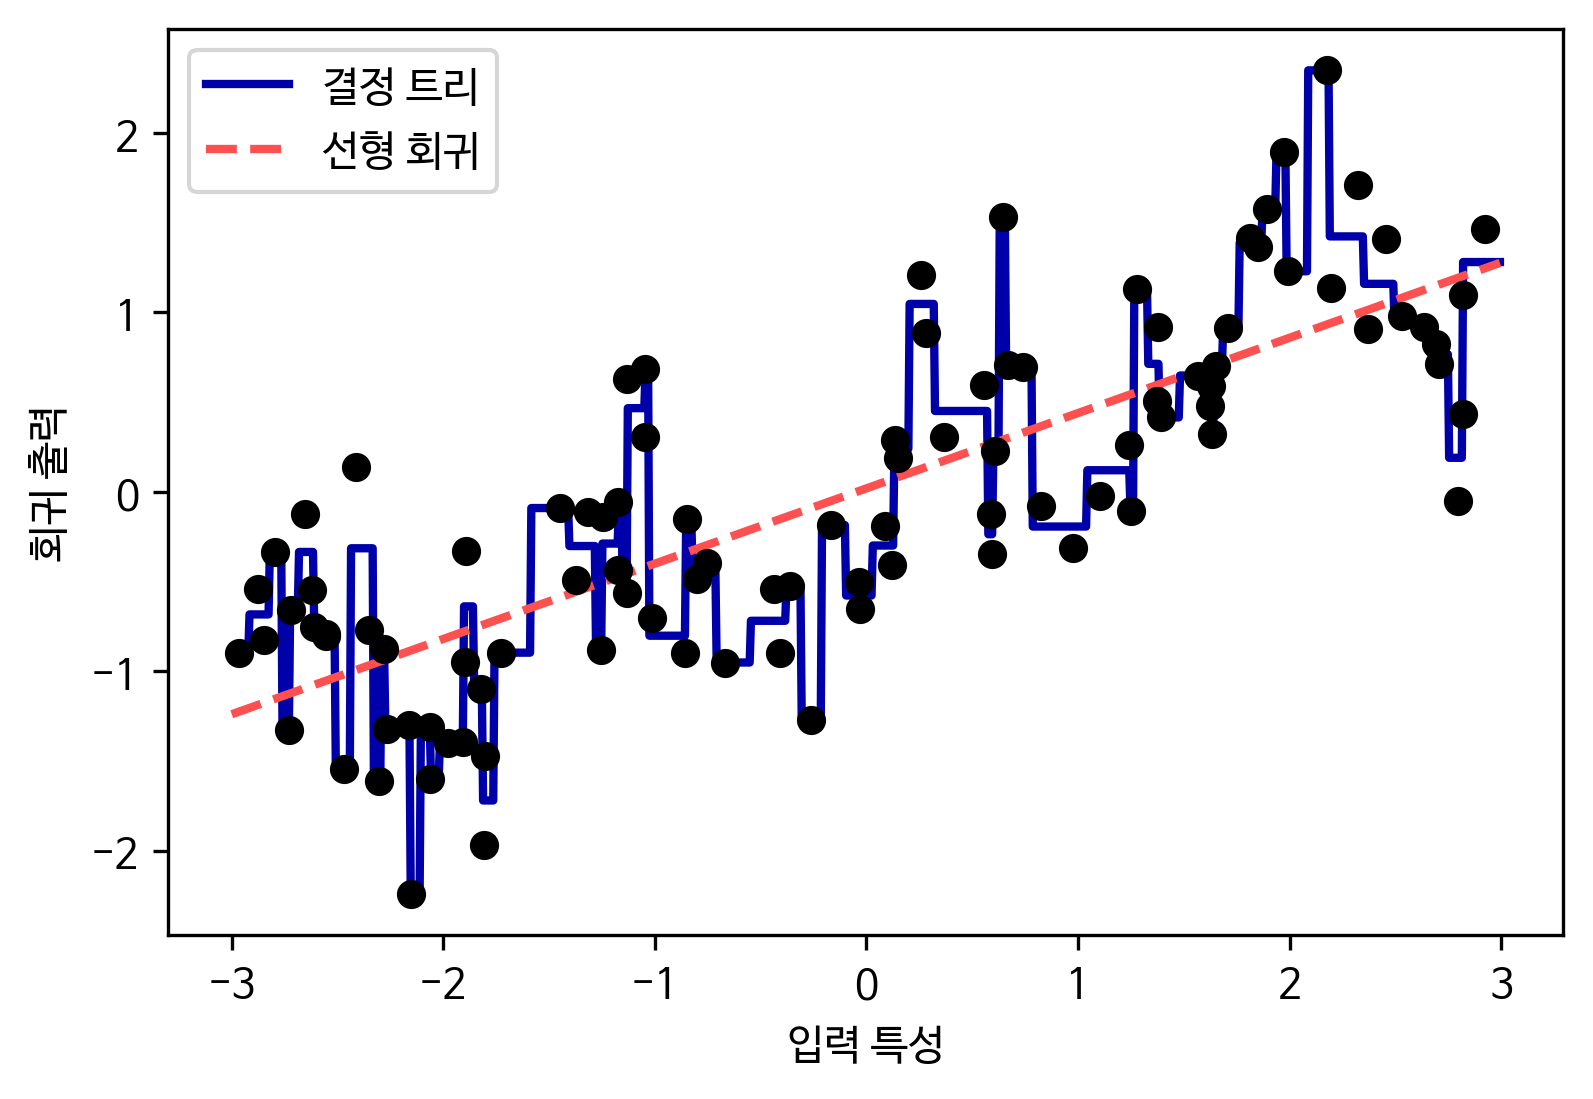

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

X, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

reg = DecisionTreeRegressor(min_samples_split=3).fit(X, y)
plt.plot(line, reg.predict(line), label="결정 트리")

reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), '--', label="선형 회귀")

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.legend(loc="best")

선형 회귀는 다양한 내용을 담지 못하고 직선으로만 표현된다.  
이에 좀더 강화시키기위해 구간 분할한다. 

In [11]:
bins = np.linspace(-3, 3, 11)
print("bins: {}".format(bins))

bins: [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


입력값 범위 -3~3을 11개의 범위로 나눈다

In [12]:
which_bin = np.digitize(X, bins=bins)
print("\n데이터 포인트:\n", X[:5])
print("\n데이터 포인트의 소속 구간:\n", which_bin[:5])


데이터 포인트:
 [[-0.753]
 [ 2.704]
 [ 1.392]
 [ 0.592]
 [-2.064]]

데이터 포인트의 소속 구간:
 [[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


In [13]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(categories='auto', sparse=False)
encoder.fit(which_bin)
X_binned = encoder.transform(which_bin)
print(X_binned[:5])

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


희소행렬 확인

In [14]:
print("X_binned.shape: {}".format(X_binned.shape))

X_binned.shape: (100, 10)


Text(0.5, 0, '입력 특성')

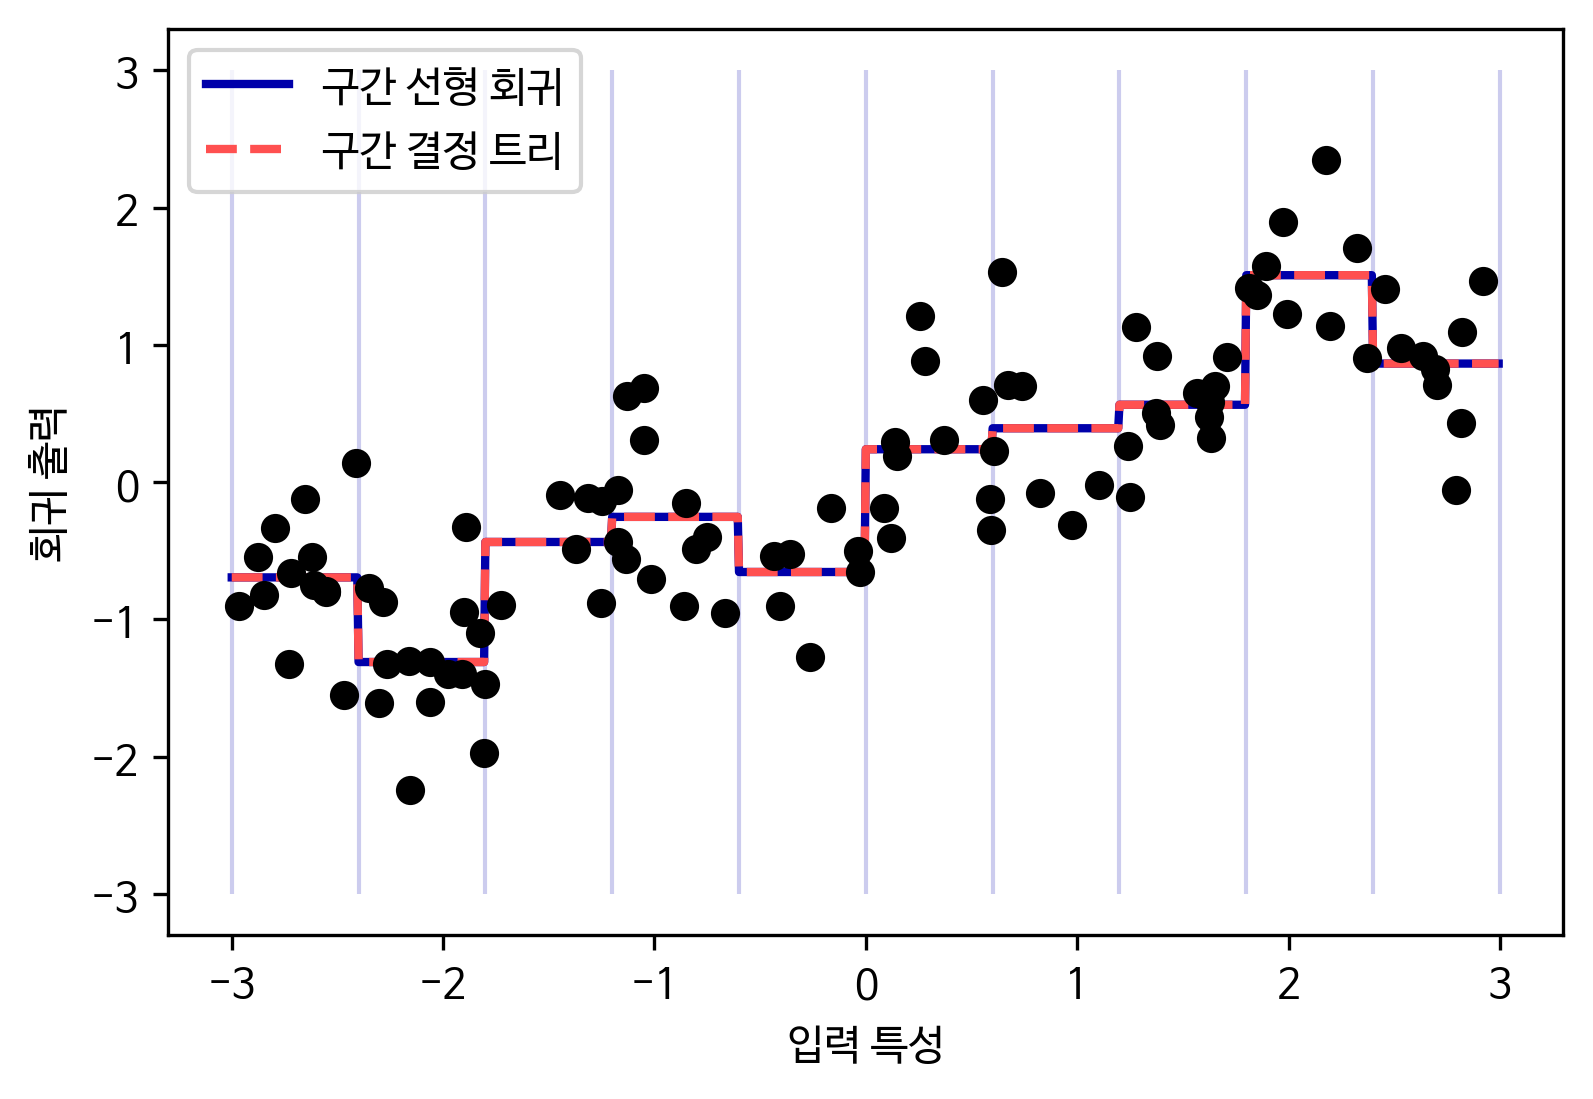

In [15]:
line_binned = encoder.transform(np.digitize(line, bins=bins))

reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='구간 선형 회귀')

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), '--', label='구간 결정 트리')
plt.plot(X[:, 0], y, 'o', c='k')
plt.vlines(bins, -3, 3, linewidth=1, alpha=.2)
plt.legend(loc="best")
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")

구간을 나눈 후 실행한 결과 선형 회귀의 결과가 훨씬 나아진것을 확인할 수 있음

In [16]:
X_combined = np.hstack([X, X_binned])
print(X_combined.shape)

(100, 11)


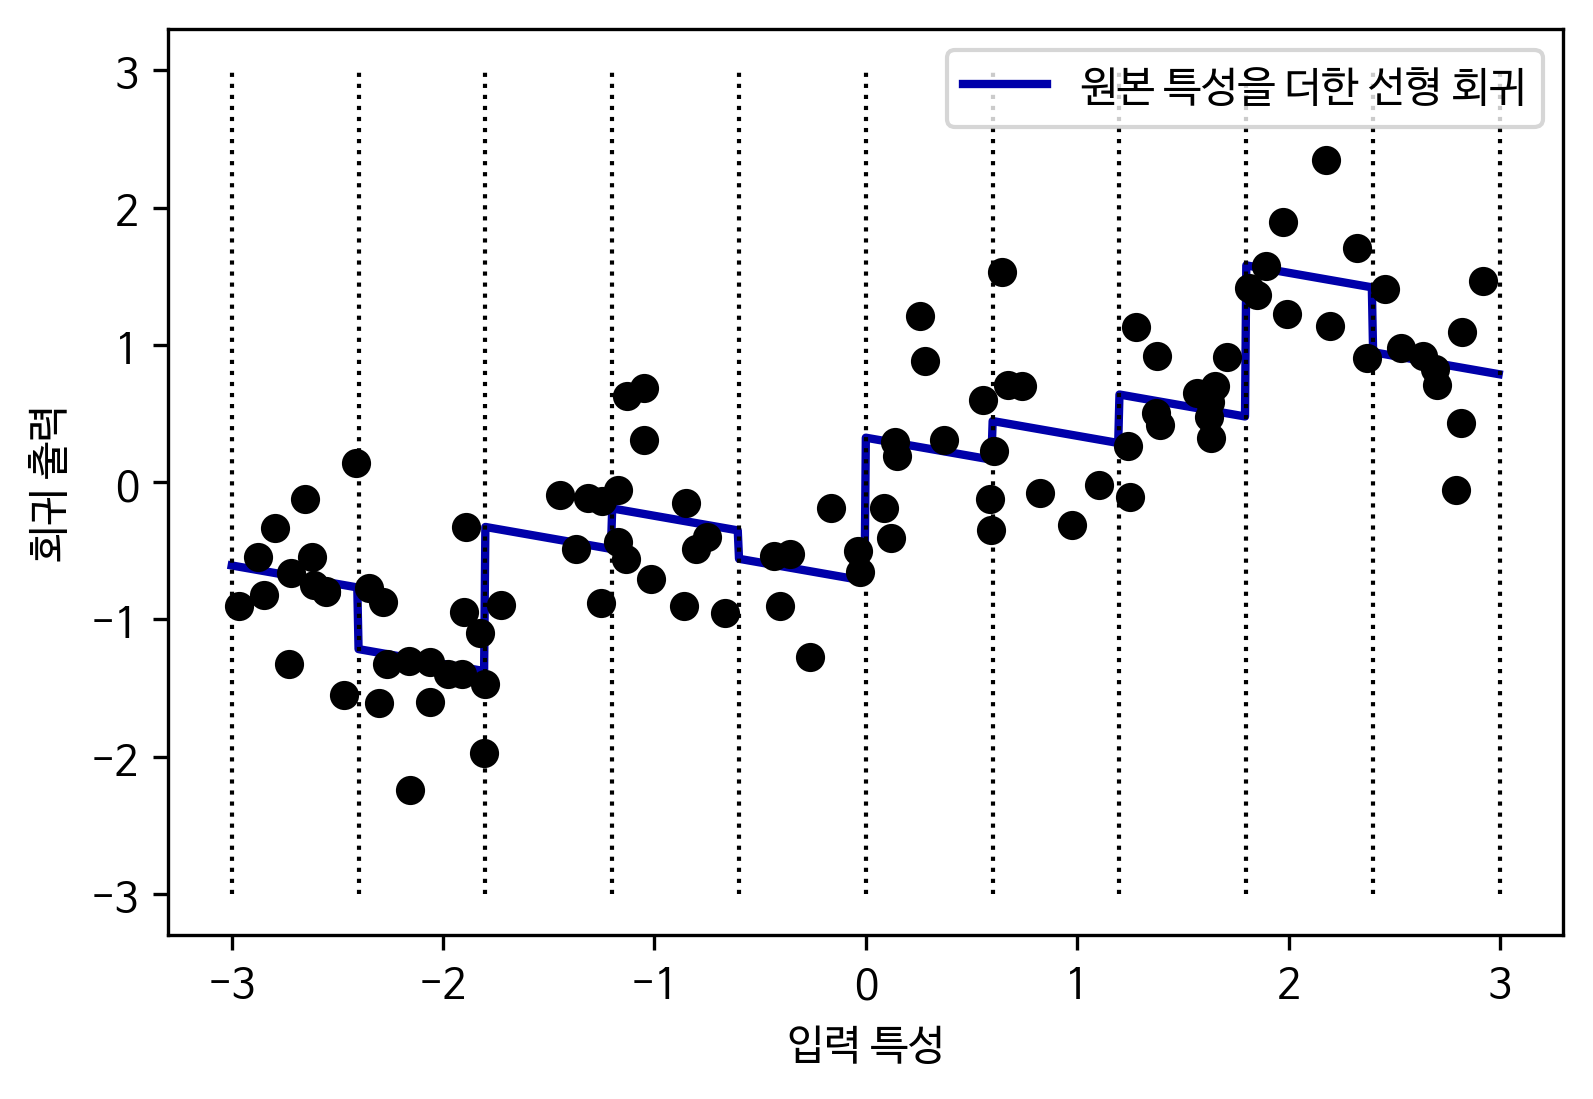

In [17]:
reg = LinearRegression().fit(X_combined, y)

line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label='원본 특성을 더한 선형 회귀')

for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k', linewidth=1)
plt.legend(loc="best")
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.plot(X[:, 0], y, 'o', c='k')

특성을 더욱 좋게 하는 방법은 원본 데이터에 상호작용과 다항식을 추가하는 것이다.  
이에 절편 뿐 아니라 기울기도 학습시키면 훨씬 좋은 결과를 얻을 수 있다

In [18]:
X_product = np.hstack([X_binned, X * X_binned])
print(X_product.shape)

(100, 20)


각 구간에 다른 기울기를 주기 위해서 데이터 포인트가 있는 구간과 x 축 사이의 상호작용 특성을 추가한다.   
이 특성이 구간 특성과 원본 특성의 곱이다.

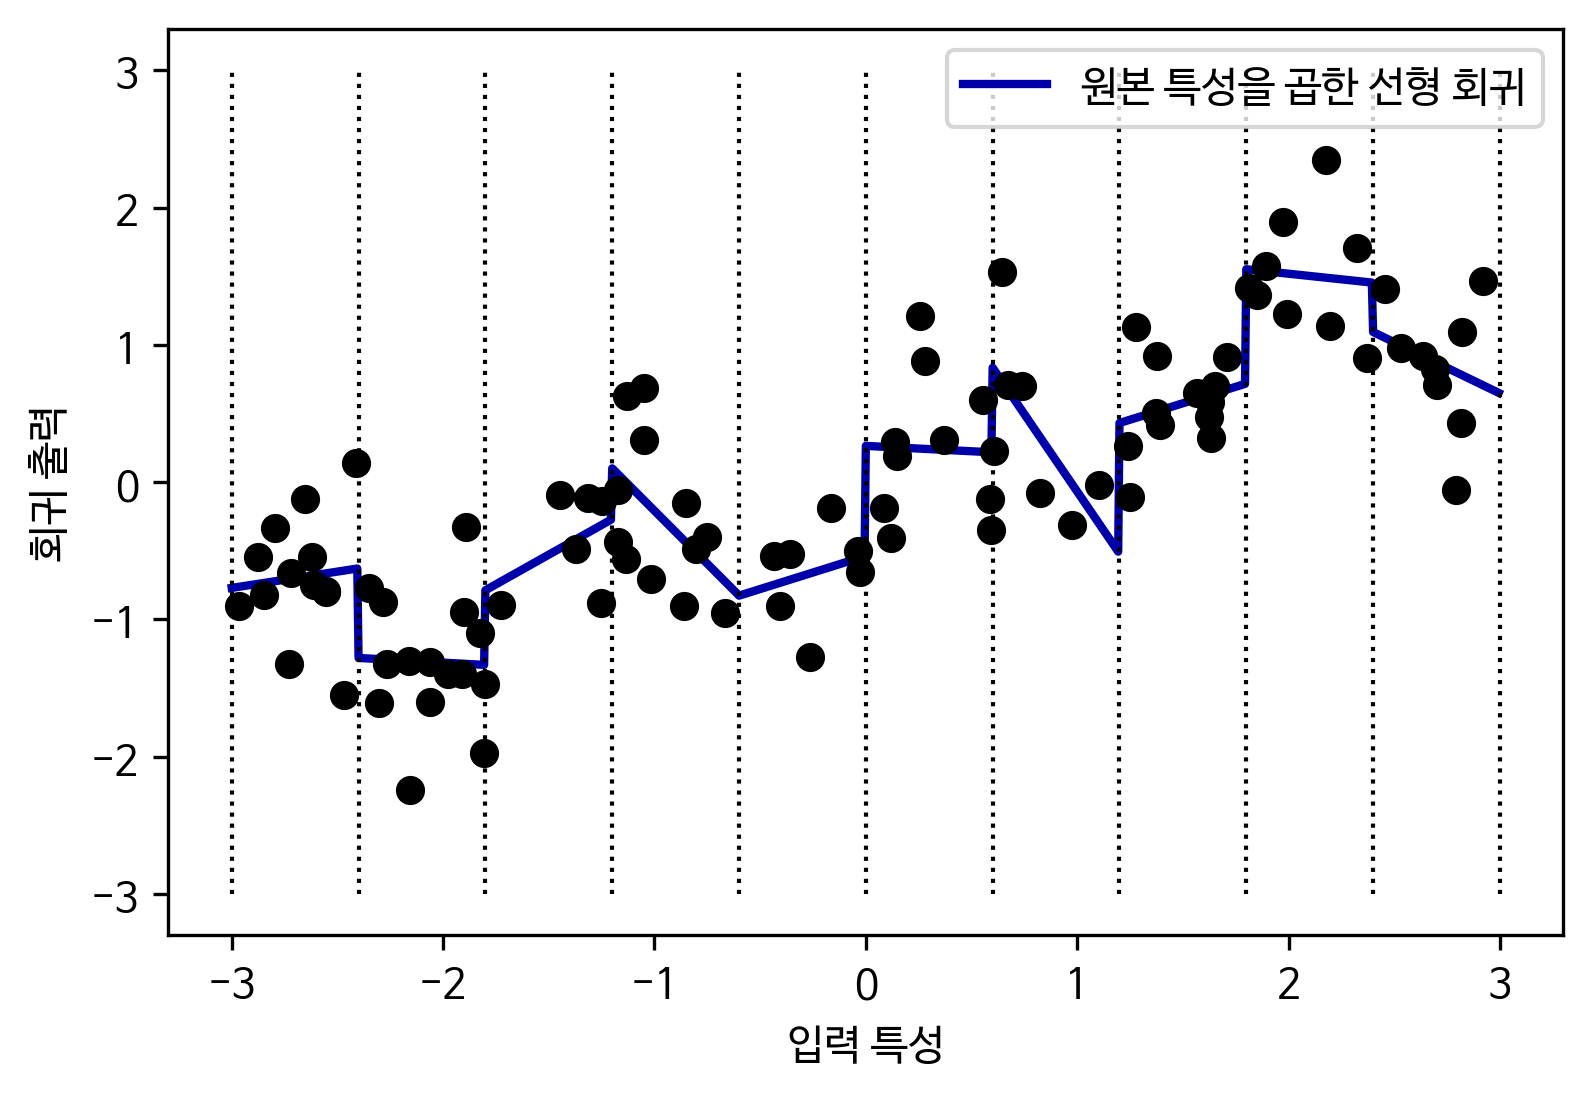

In [19]:
reg = LinearRegression().fit(X_product, y)

line_product = np.hstack([line_binned, line * line_binned])
plt.plot(line, reg.predict(line_product), label='원본 특성을 곱한 선형 회귀')

for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k', linewidth=1)

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.legend(loc="best")

이를 활용하여 구간별 기울기가 다른 선형회귀를 생성

In [20]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)

In [21]:
print("X_poly.shape: {}".format(X_poly.shape))

X_poly.shape: (100, 10)


10차원을 사용했기때문에 10개의 특성 생성된다.

In [22]:
print("X 원소:\n{}".format(X[:5]))
print("X_poly 원소:\n{}".format(X_poly[:5]))

X 원소:
[[-0.753]
 [ 2.704]
 [ 1.392]
 [ 0.592]
 [-2.064]]
X_poly 원소:
[[   -0.753     0.567    -0.427     0.321    -0.242     0.182    -0.137
      0.103    -0.078     0.058]
 [    2.704     7.313    19.777    53.482   144.632   391.125  1057.714
   2860.36   7735.232 20918.278]
 [    1.392     1.938     2.697     3.754     5.226     7.274    10.125
     14.094    19.618    27.307]
 [    0.592     0.35      0.207     0.123     0.073     0.043     0.025
      0.015     0.009     0.005]
 [   -2.064     4.26     -8.791    18.144   -37.448    77.289  -159.516
    329.222  -679.478  1402.367]]


In [23]:
print("항 이름:\n{}".format(poly.get_feature_names()))

항 이름:
['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']


get_feature_names 메서드 사용시 각 특성의 차수를 알려줌

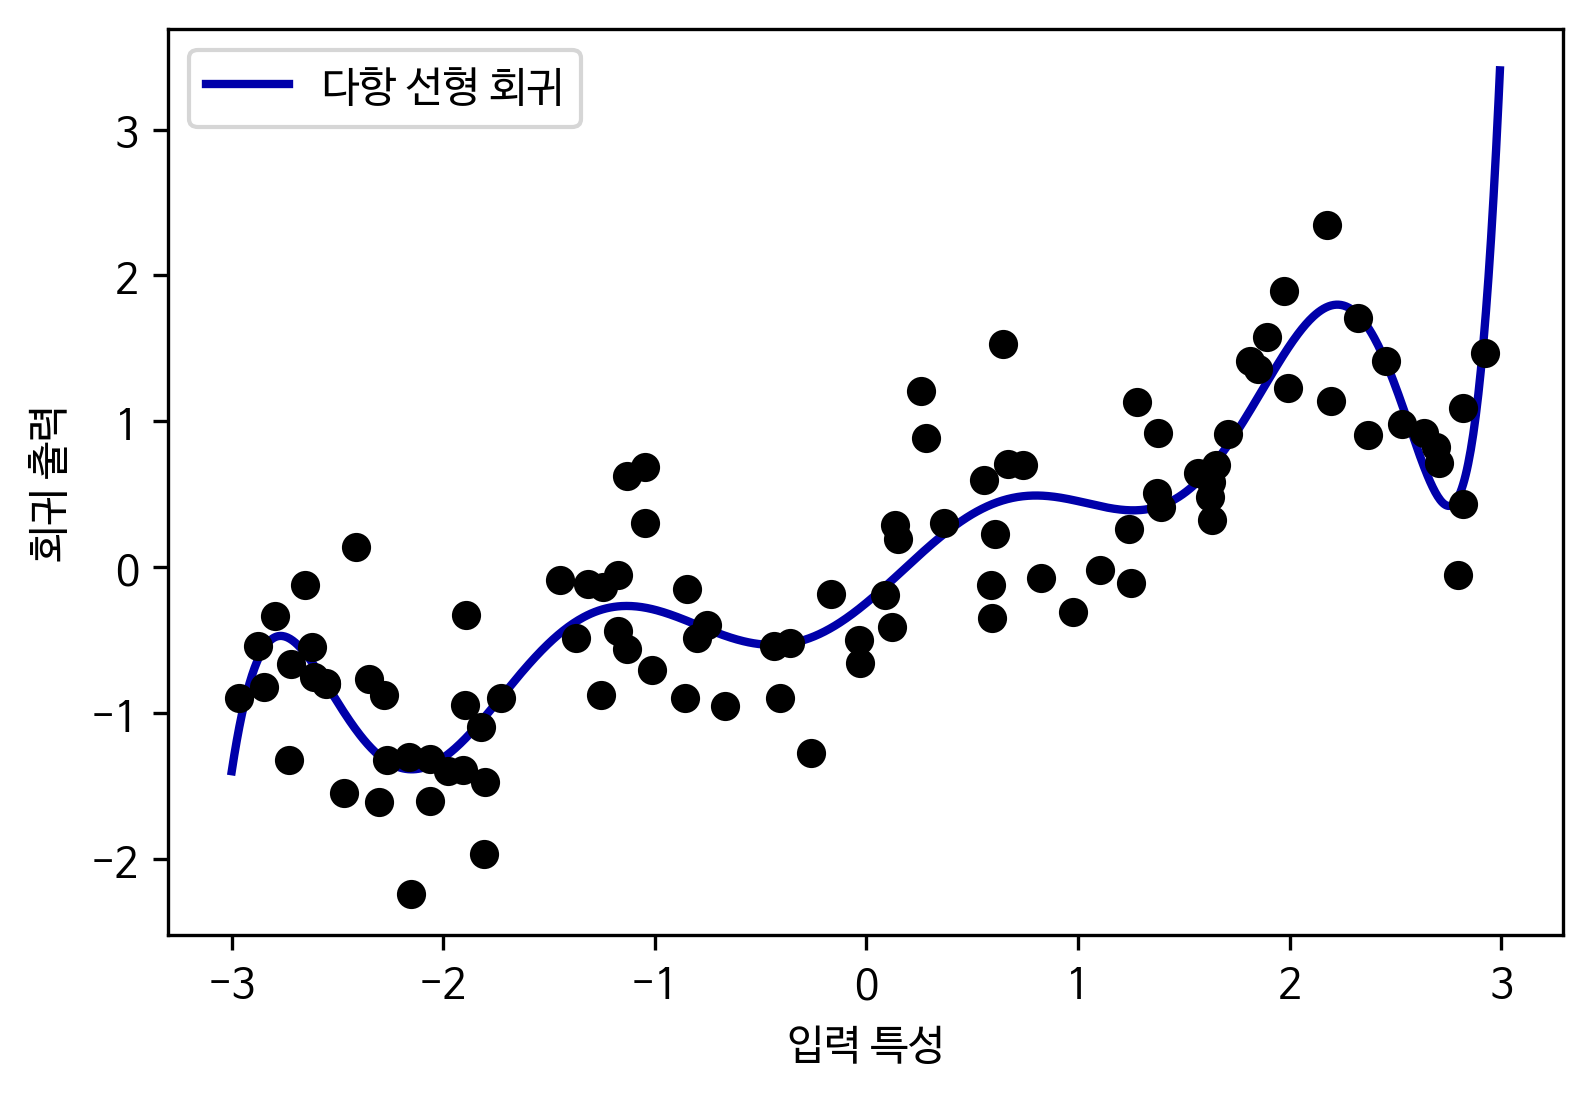

In [24]:
reg = LinearRegression().fit(X_poly, y)

line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly), label='다항 선형 회귀')
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.legend(loc="best")

10차 다항식을 이용한 선형 회귀

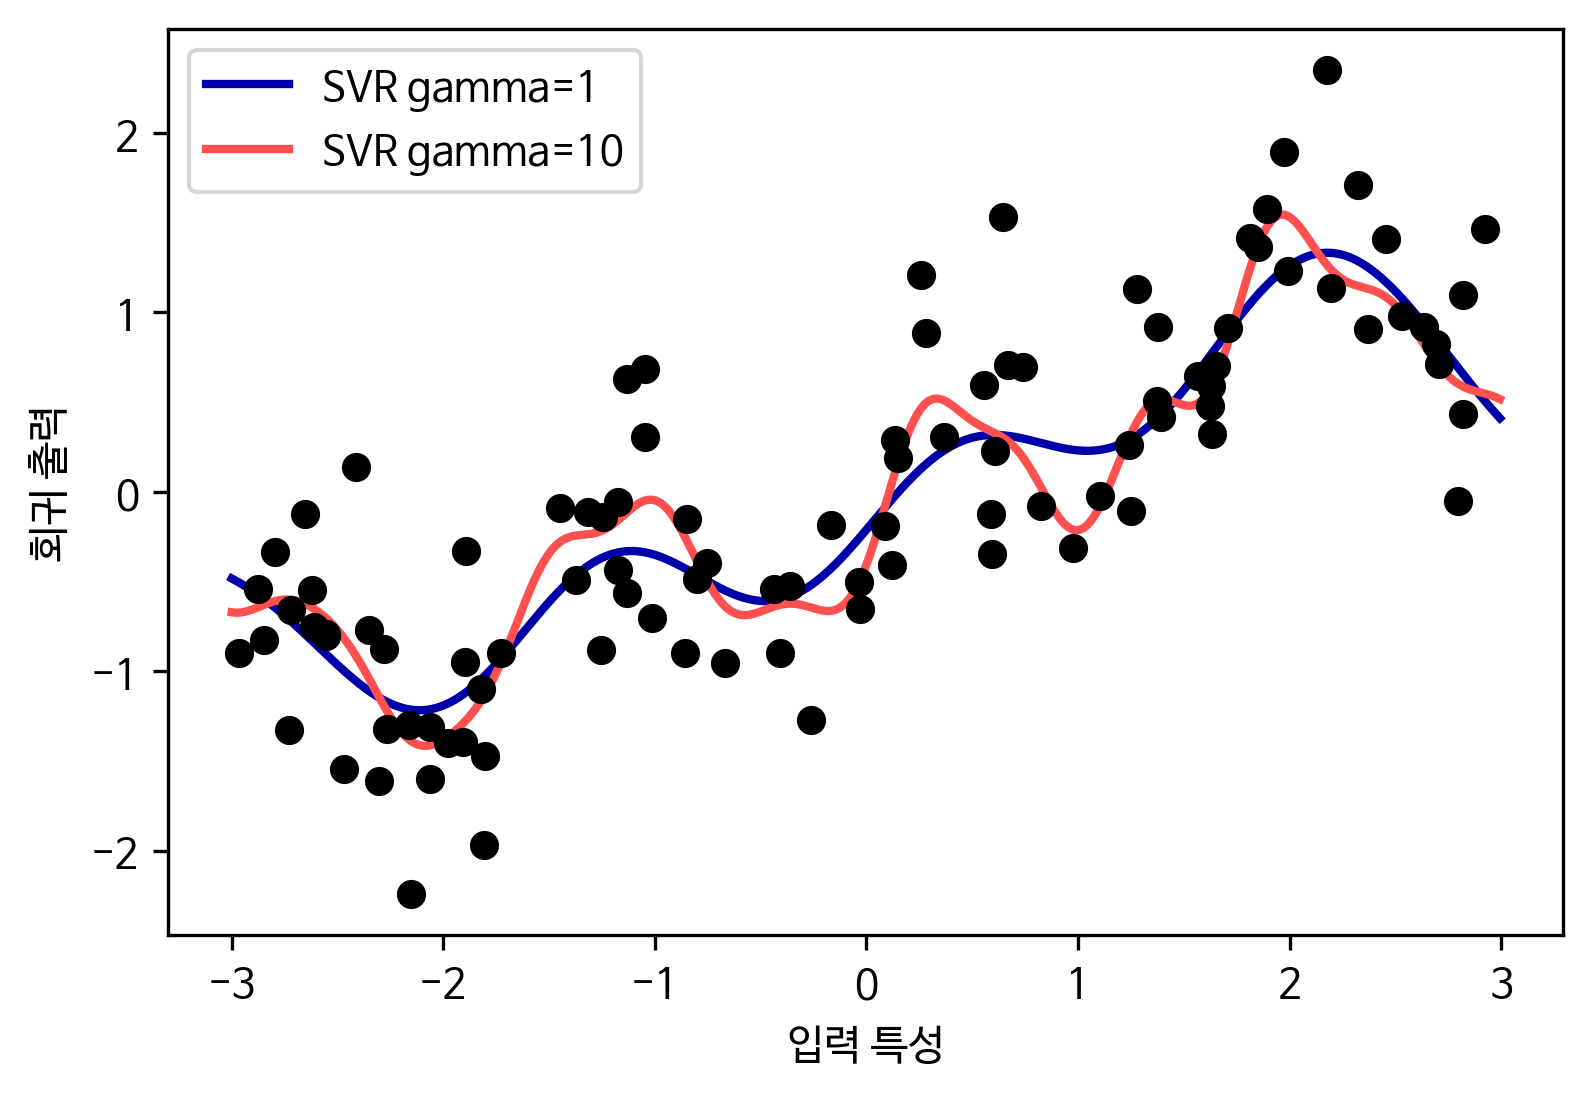

In [25]:
from sklearn.svm import SVR

for gamma in [1, 10]:
    svr = SVR(gamma=gamma).fit(X, y)
    plt.plot(line, svr.predict(line), label='SVR gamma={}'.format(gamma))

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.legend(loc="best")

RBF 커널 SVM의 감마 매개변수 변화에 따른 비교

In [26]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target,
                                                    random_state=0)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

스케일을 0에서 1 사이로 조정

In [27]:
poly = PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_poly.shape: {}".format(X_train_poly.shape))

X_train.shape: (379, 13)
X_train_poly.shape: (379, 105)


차수를 2로 하여 다항식 특성 뽑음  
특성 13개에서 105개의 교차 특성으로 확장

In [28]:
print("다항 특성 이름:\n{}".format(poly.get_feature_names()))

다항 특성 이름:
['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2']


degree=2를 통해서 원본 특성에서 두 개를 뽑아 만들 수 있는 모든 곱을 얻을 수 있음  
get_feature_names를 사용하여 어떤 원본 특성이 ㅗ곱해져 새 특성이 만들어졌는지 확인 가능

In [29]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train_scaled, y_train)
print("상호작용 특성이 없을 때 점수: {:.3f}".format(ridge.score(X_test_scaled, y_test)))
ridge = Ridge().fit(X_train_poly, y_train)
print("상호작용 특성이 있을 때 점수: {:.3f}".format(ridge.score(X_test_poly, y_test)))

상호작용 특성이 없을 때 점수: 0.621
상호작용 특성이 있을 때 점수: 0.753


상호작용 특성이 있는 데이터와 없는 데이터에 대해 릿지 사용해 성능 비교  
상호작용과 다항식 특성이 릿지 성능을 높였음을 확인가능

In [30]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=0).fit(X_train_scaled, y_train)
print("상호작용 특성이 없을 때 점수: {:.3f}".format(rf.score(X_test_scaled, y_test)))
rf = RandomForestRegressor(n_estimators=100, random_state=0).fit(X_train_poly, y_train)
print("상호작용 특성이 있을 때 점수: {:.3f}".format(rf.score(X_test_poly, y_test)))

상호작용 특성이 없을 때 점수: 0.795
상호작용 특성이 있을 때 점수: 0.775


상호작용 특성이 있는 데이터와 없는 데이터에 대해 랜덤포레스트 회귀 사용해 성능 비교  
상호작용과 다항식 특성이 있는것이 오히려 낮아짐을 확인 가능

In [31]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000, 3))
w = rnd.normal(size=3)

X = rnd.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)
print(X[:10, 0])

[ 56  81  25  20  27  18  12  21 109   7]


특성 10개 출력

In [32]:
print("특성 출현 횟수:\n{}".format(np.bincount(X[:, 0].astype('int'))))

특성 출현 횟수:
[28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


2번 특성이 68번으로 가장 많이 나타나며, 뒤에는 특성 출현이 빈번하지 않다는 것을 확인 가능

Text(0.5, 0, '값')

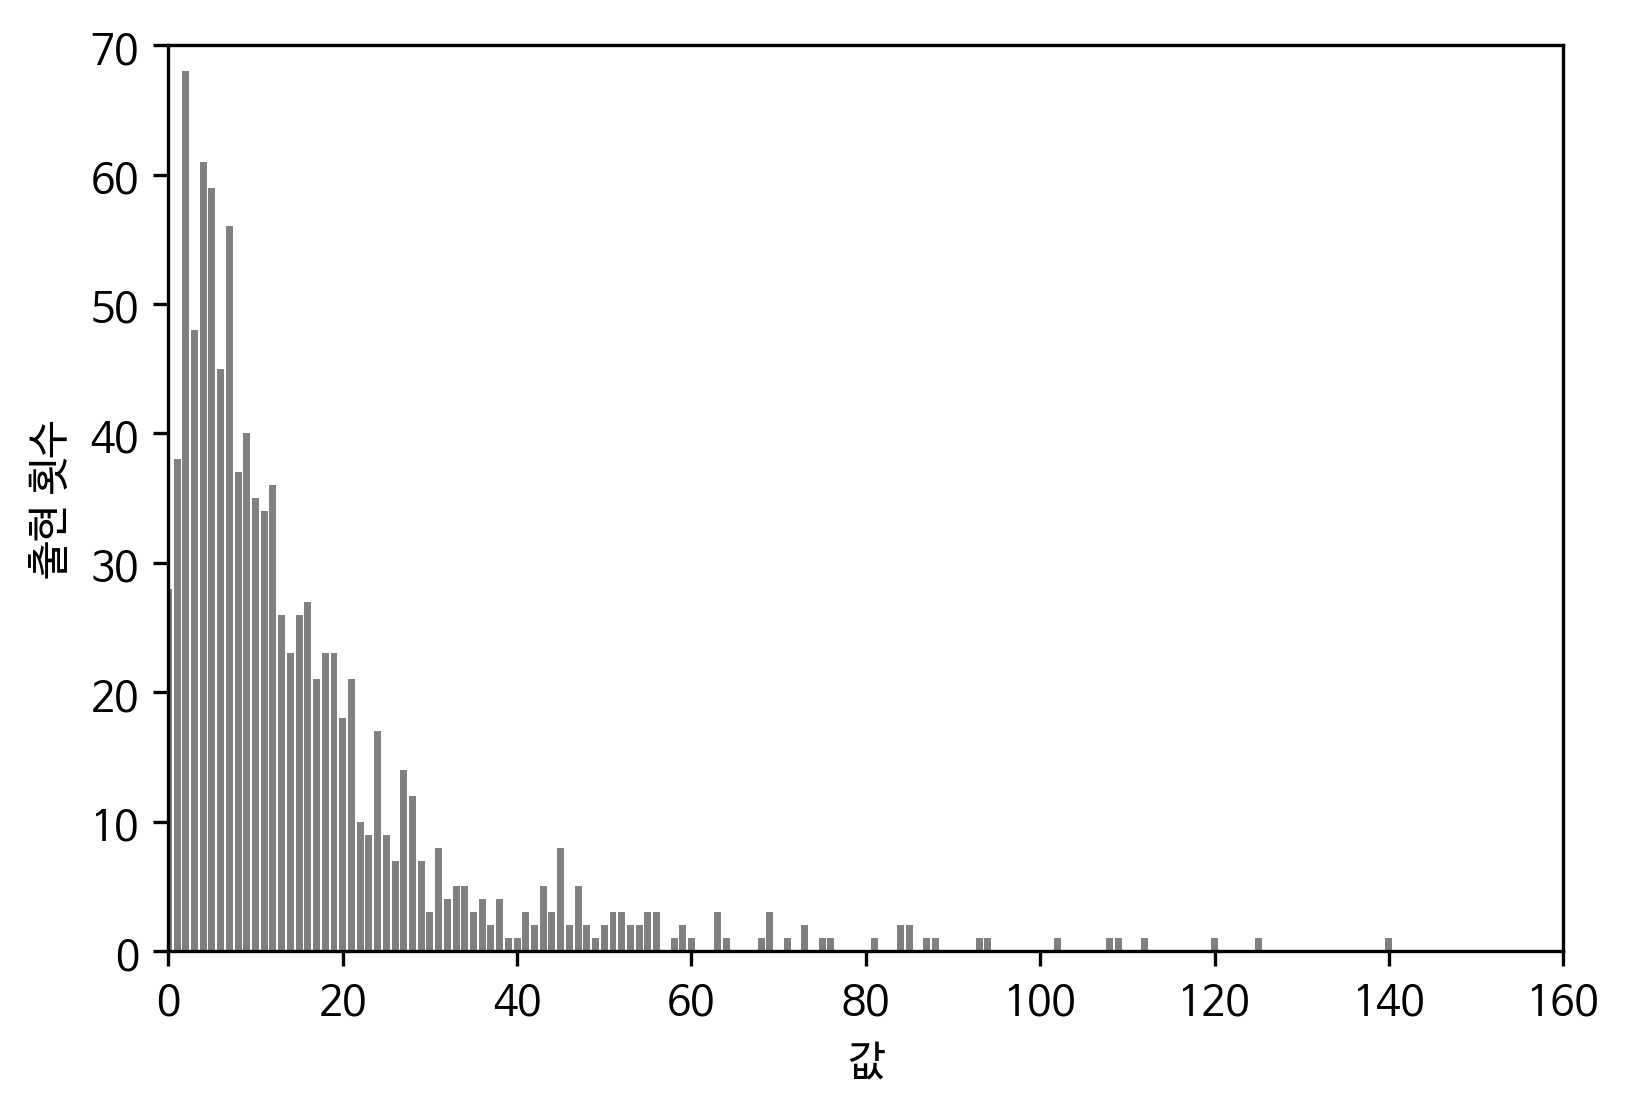

In [33]:
plt.xlim(0, 160)
plt.ylim(0, 70)
bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins, color='grey')
plt.ylabel("출현 횟수")
plt.xlabel("값")


X[0] 특성 값의 히스토그램  
작은 수치가 많고 큰 수치가 몇 안되는 분포는 선형모델로 처리하기가 어려움

In [34]:
from sklearn.linear_model import Ridge

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print("테스트 점수: {:.3f}".format(score))

테스트 점수: 0.622


릿지 사용한 결과 x,y의 관계를 모델링을 잘 하지 못했음을 확인 가능

In [35]:
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)

로그 스케일로 변환하면 더욱 나은 결과값을 얻을 수 있기 때문에, 로그로 변환  
0은 로그로 변환할 수 없기에 +1을 해준다

Text(0.5, 0, '값')

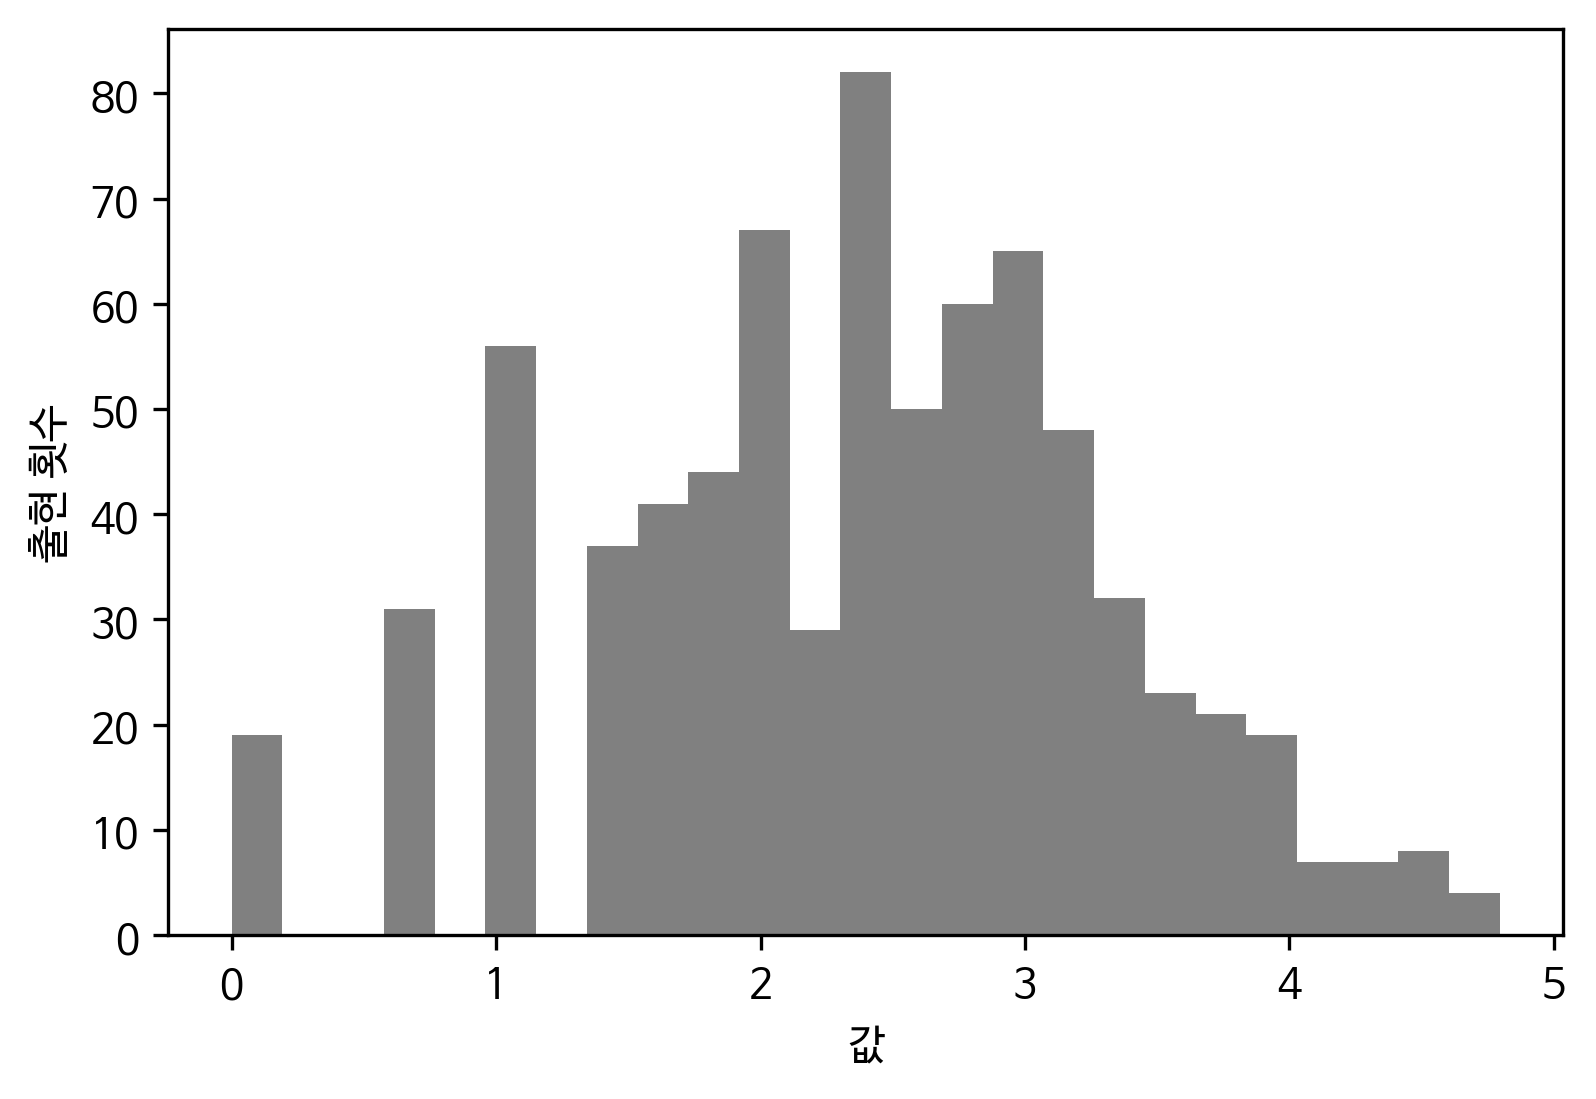

In [36]:
plt.hist(X_train_log[:, 0], bins=25, color='gray')
plt.ylabel("출현 횟수")
plt.xlabel("값")

분포 치우침이 좋아졌음을 확인 가능

In [37]:
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print("테스트 점수: {:.3f}".format(score))

테스트 점수: 0.875


릿지 모델 사용한 결과가 매우 좋은 결과가 나왔음을 확인 가능

In [38]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))
X_w_noise = np.hstack([cancer.data, noise])

X_train, X_test, y_train, y_test = train_test_split(
    X_w_noise, cancer.target, random_state=0, test_size=.5)
select = SelectPercentile(score_func=f_classif, percentile=50)
select.fit(X_train, y_train)
X_train_selected = select.transform(X_train)

print("X_train.shape: {}".format(X_train.shape))
print("X_train_selected.shape: {}".format(X_train_selected.shape))

X_train.shape: (284, 80)
X_train_selected.shape: (284, 40)


난수를 발생시킨 후 30개의 특성에 50개의 노이즈 특성 추가한 후 이의 50%선택

[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


([<matplotlib.axis.YTick at 0x268963f47b8>], [Text(0, 0, '')])

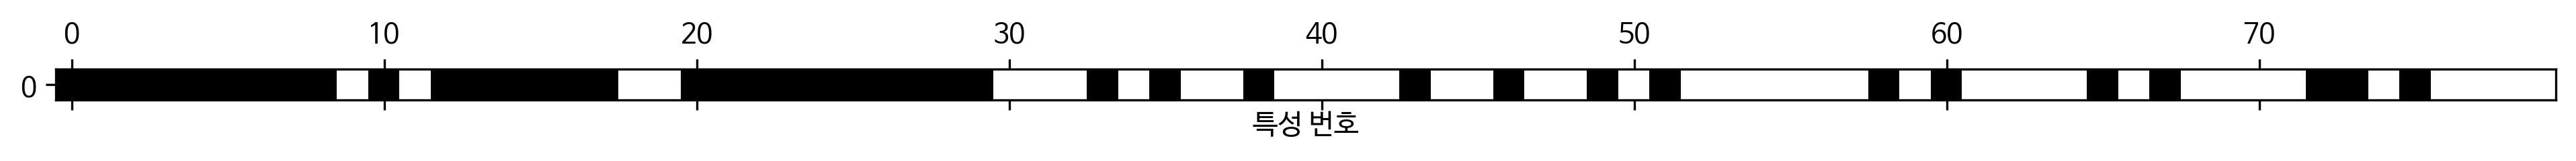

In [39]:
mask = select.get_support()
print(mask)
# True는 검은색, False는 흰색으로 마스킹합니다
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("특성 번호")
plt.yticks([0])

앞의 30개의 원본 특성을 모두 선택하는것이 아닌 뒤의 노이즈 특성에서도 선택하였음을 확인 가능

In [40]:
from sklearn.linear_model import LogisticRegression

# 테스트 데이터 변환
X_test_selected = select.transform(X_test)

lr = LogisticRegression(solver='liblinear')
lr.fit(X_train, y_train)
print("전체 특성을 사용한 점수: {:.3f}".format(lr.score(X_test, y_test)))
lr.fit(X_train_selected, y_train)
print("선택된 일부 특성을 사용한 점수: {:.3f}".format(
        lr.score(X_test_selected, y_test)))

전체 특성을 사용한 점수: 0.930
선택된 일부 특성을 사용한 점수: 0.940


노이즈를 일부 선택하였음에도 결과가 나아진 것을 확인할 수 있는데, 이는 특성중의 일부가 오히려 결과에 악영향을 미친다는것을 알 수 있음

In [41]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

select = SelectFromModel(
    RandomForestClassifier(n_estimators=100, random_state=42),
    threshold="median")

SelectFromModel은 중요도가 지정한 임계치보다 큰 모든 특성 선택  
일변량 분석으로 선택한 특성과 결과를 비교하기위해 절반 가량의 특성 선택되도록 중간갑 선택

In [42]:
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_l1.shape: {}".format(X_train_l1.shape))

X_train.shape: (284, 80)
X_train_l1.shape: (284, 40)


특성 값 반으로 줄었음을 확인 가능

([<matplotlib.axis.YTick at 0x268964767b8>], [Text(0, 0, '')])

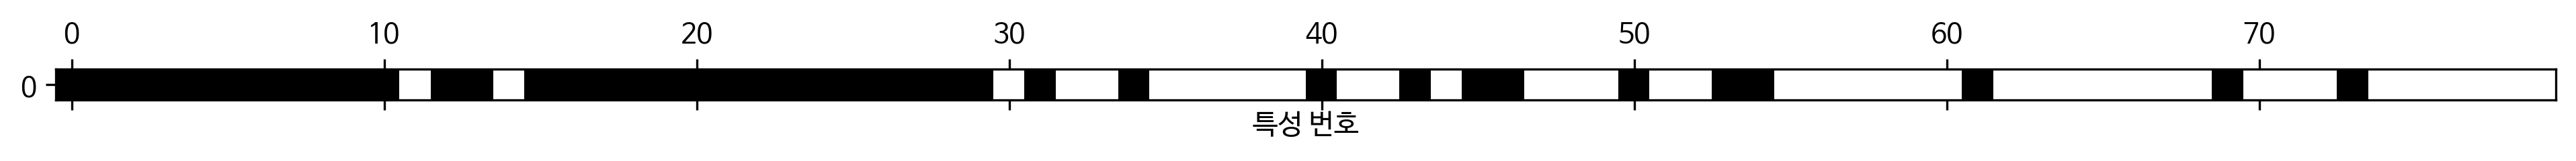

In [43]:
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("특성 번호")
plt.yticks([0])

In [44]:
X_test_l1 = select.transform(X_test)
score = LogisticRegression(solver='liblinear').fit(X_train_l1, y_train).score(X_test_l1, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.951


특성 선택 잘되어 성능 향상되었음을 확인 가능

([<matplotlib.axis.YTick at 0x268969286d8>], [Text(0, 0, '')])

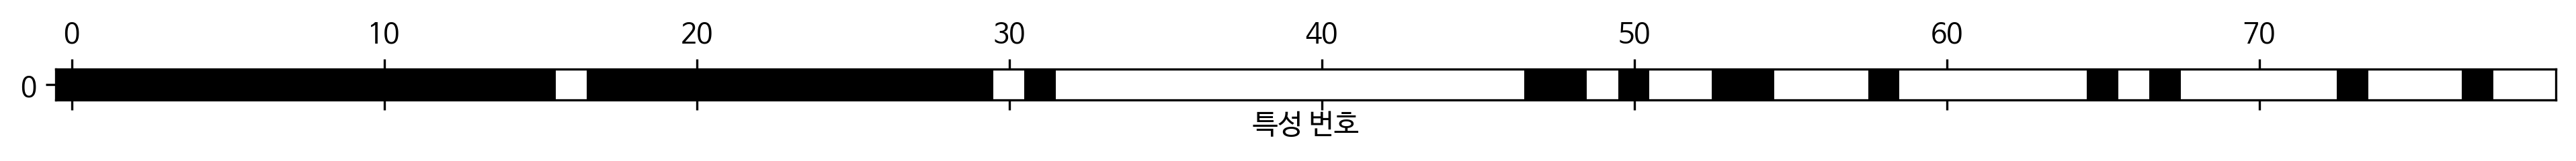

In [45]:
from sklearn.feature_selection import RFE

select = RFE(RandomForestClassifier(n_estimators=100, random_state=42),
             n_features_to_select=40)

select.fit(X_train, y_train)
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("특성 번호")
plt.yticks([0])

랜덤 포레스트 분류 모델을 사용 RFE가 선택한 특성

In [46]:
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)

score = LogisticRegression(solver='liblinear').fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
print("테스트 점수: {:.3f}".format(score))

테스트 점수: 0.951


RFE사용해 특성 선택한 내용을 로지스틱 회귀에 넣은 결과

In [47]:
print("테스트 점수: {:.3f}".format(select.score(X_test, y_test)))

테스트 점수: 0.951


RFE에 사용된 모델을 이용해서 예측 진행, 선택된 특성만 사용

In [48]:
citibike = mglearn.datasets.load_citibike()

citibike 자료 가져옴

In [49]:
print("시티 바이크 데이터:\n{}".format(citibike.head()))

시티 바이크 데이터:
starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
Freq: 3H, Name: one, dtype: int64


Text(0, 0.5, '대여횟수')

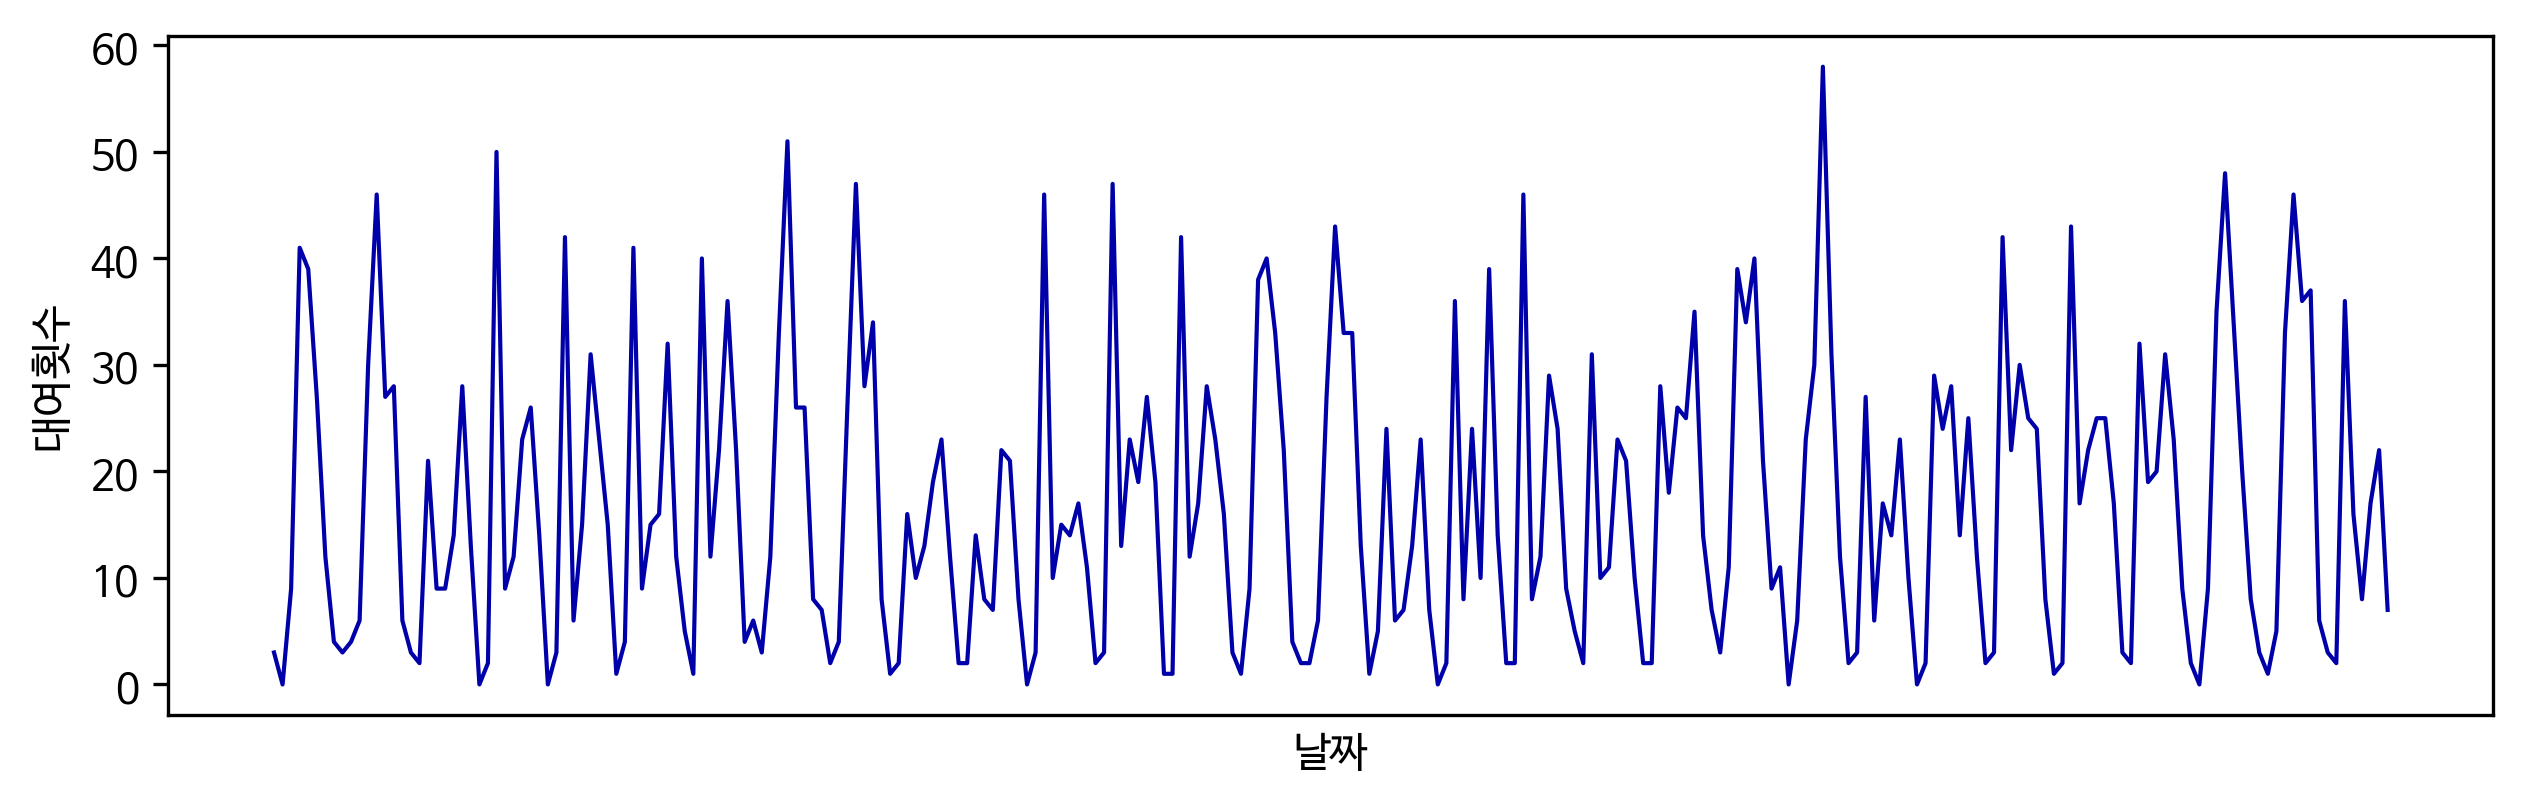

In [50]:
plt.figure(figsize=(10, 3))
xticks = pd.date_range(start=citibike.index.min(), end=citibike.index.max(),
                       freq='D')
week = ["일", "월", "화","수", "목", "금", "토"]
xticks_name = [week[int(w)]+d for w, d in zip(xticks.strftime("%w"), 
                                              xticks.strftime(" %m-%d"))]
plt.xticks(xticks.astype(int), xticks_name, rotation=90, ha="left")
plt.plot(citibike, linewidth=1)
plt.xlabel("날짜")
plt.ylabel("대여횟수")

대여한 정보 그래프로 확인

In [51]:
y = citibike.values
X = citibike.index.astype("int64").values.reshape(-1, 1) // 10**9

In [52]:
n_train = 184

def eval_on_features(features, target, regressor):
    X_train, X_test = features[:n_train], features[n_train:]
    y_train, y_test = target[:n_train], target[n_train:]
    regressor.fit(X_train, y_train)
    print("테스트 세트 R^2: {:.2f}".format(regressor.score(X_test, y_test)))
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    plt.figure(figsize=(10, 3))

    plt.xticks(range(0, len(X), 8), xticks_name, rotation=90, ha="left")

    plt.plot(range(n_train), y_train, label="훈련")
    plt.plot(range(n_train, len(y_test) + n_train), y_test, '-', label="테스트")
    plt.plot(range(n_train), y_pred_train, '--', label="훈련 예측")

    plt.plot(range(n_train, len(y_test) + n_train), y_pred, '--',
             label="테스트 예측")
    plt.legend(loc=(1.01, 0))
    plt.xlabel("날짜")
    plt.ylabel("대여횟수")

첫 184개 데이터 포인트를 훈련 세트로 사용하고 나머지는 테스트 세트로 사용

테스트 세트 R^2: -0.04


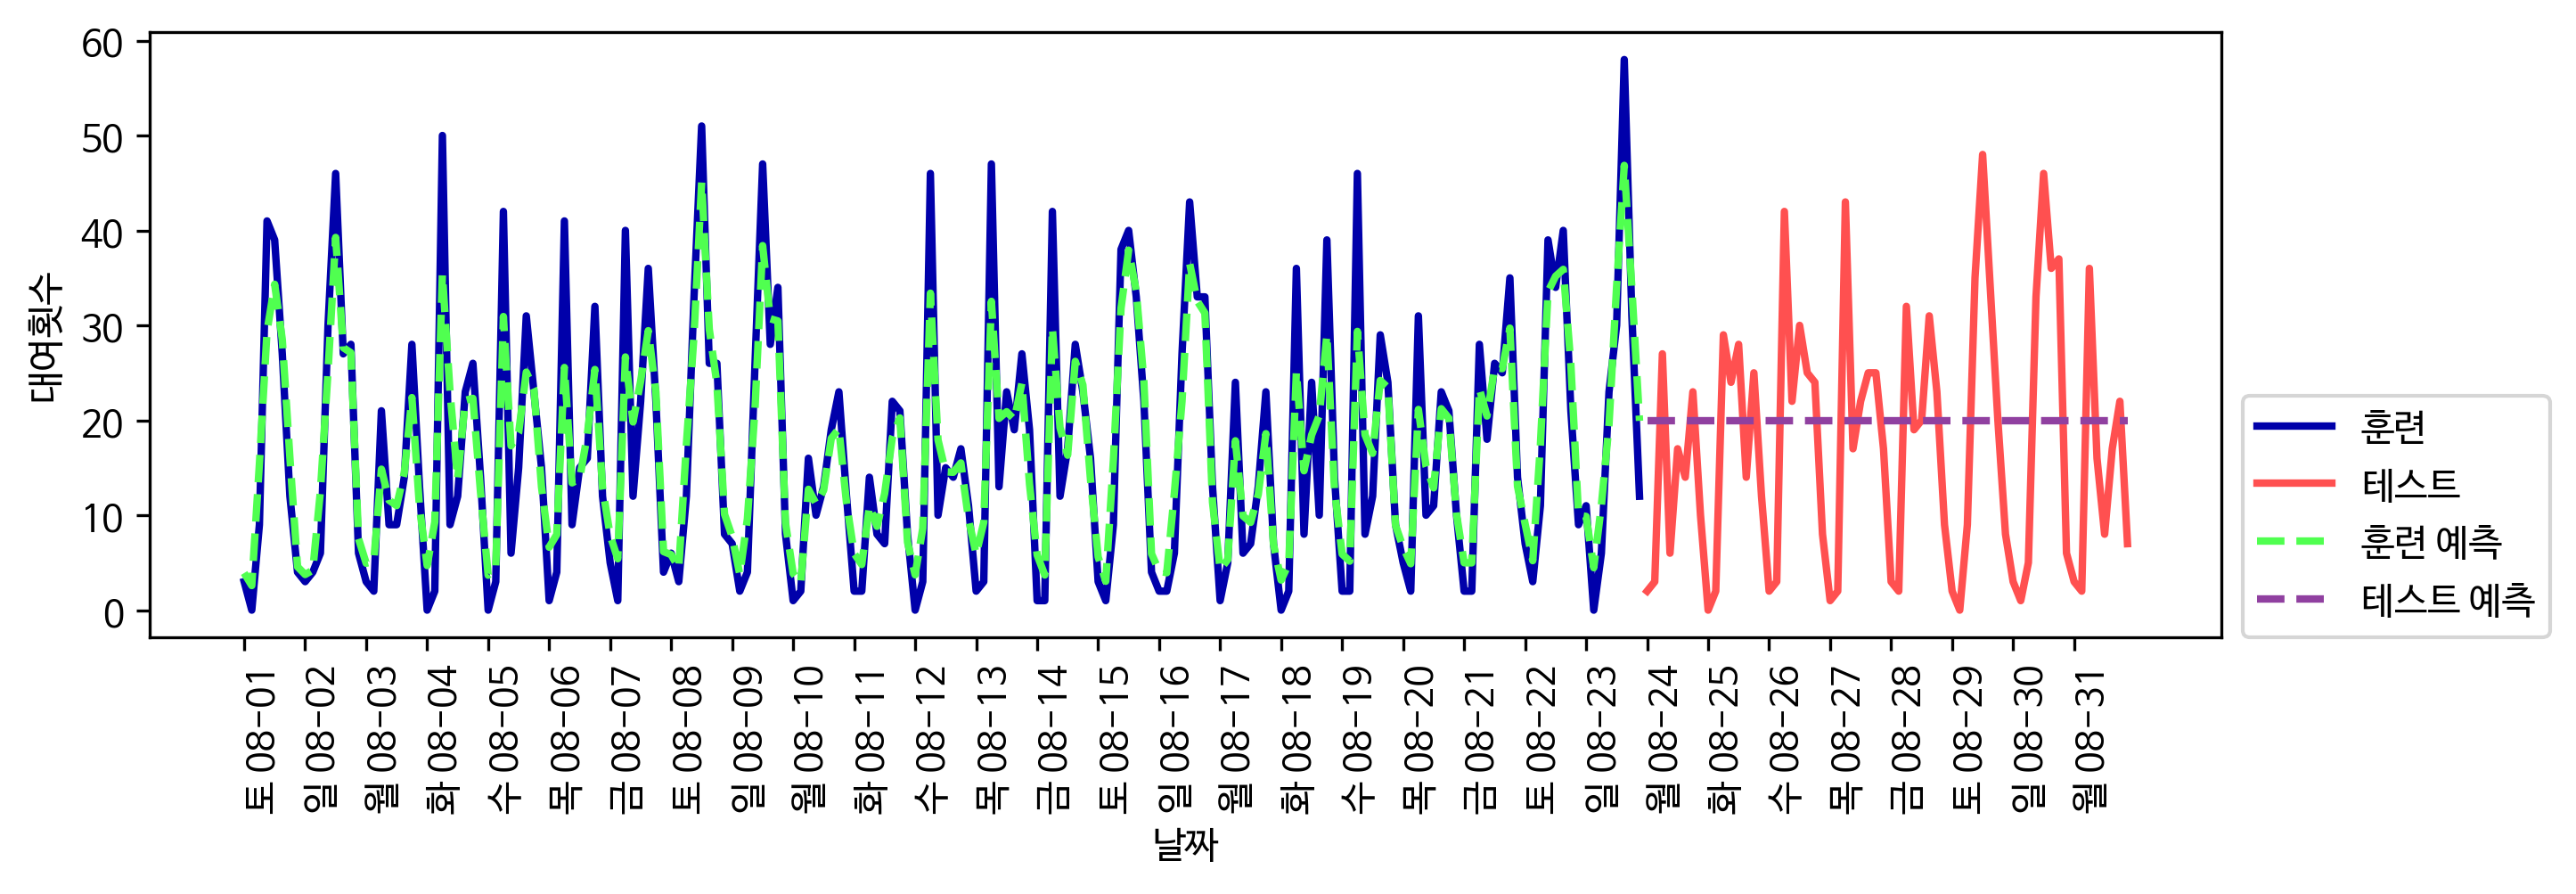

In [53]:
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
eval_on_features(X, y, regressor)

훈련 세트의 예측은 잘 하나 테스트 세트는 한가지 값으로 에측하고, R^2또한 음수로 나왔음을 확인 가능  
이는 랜덤포레스트가 외삽하는 능력이 없기 때문 > 이에 전문가 지식 사용

테스트 세트 R^2: 0.60


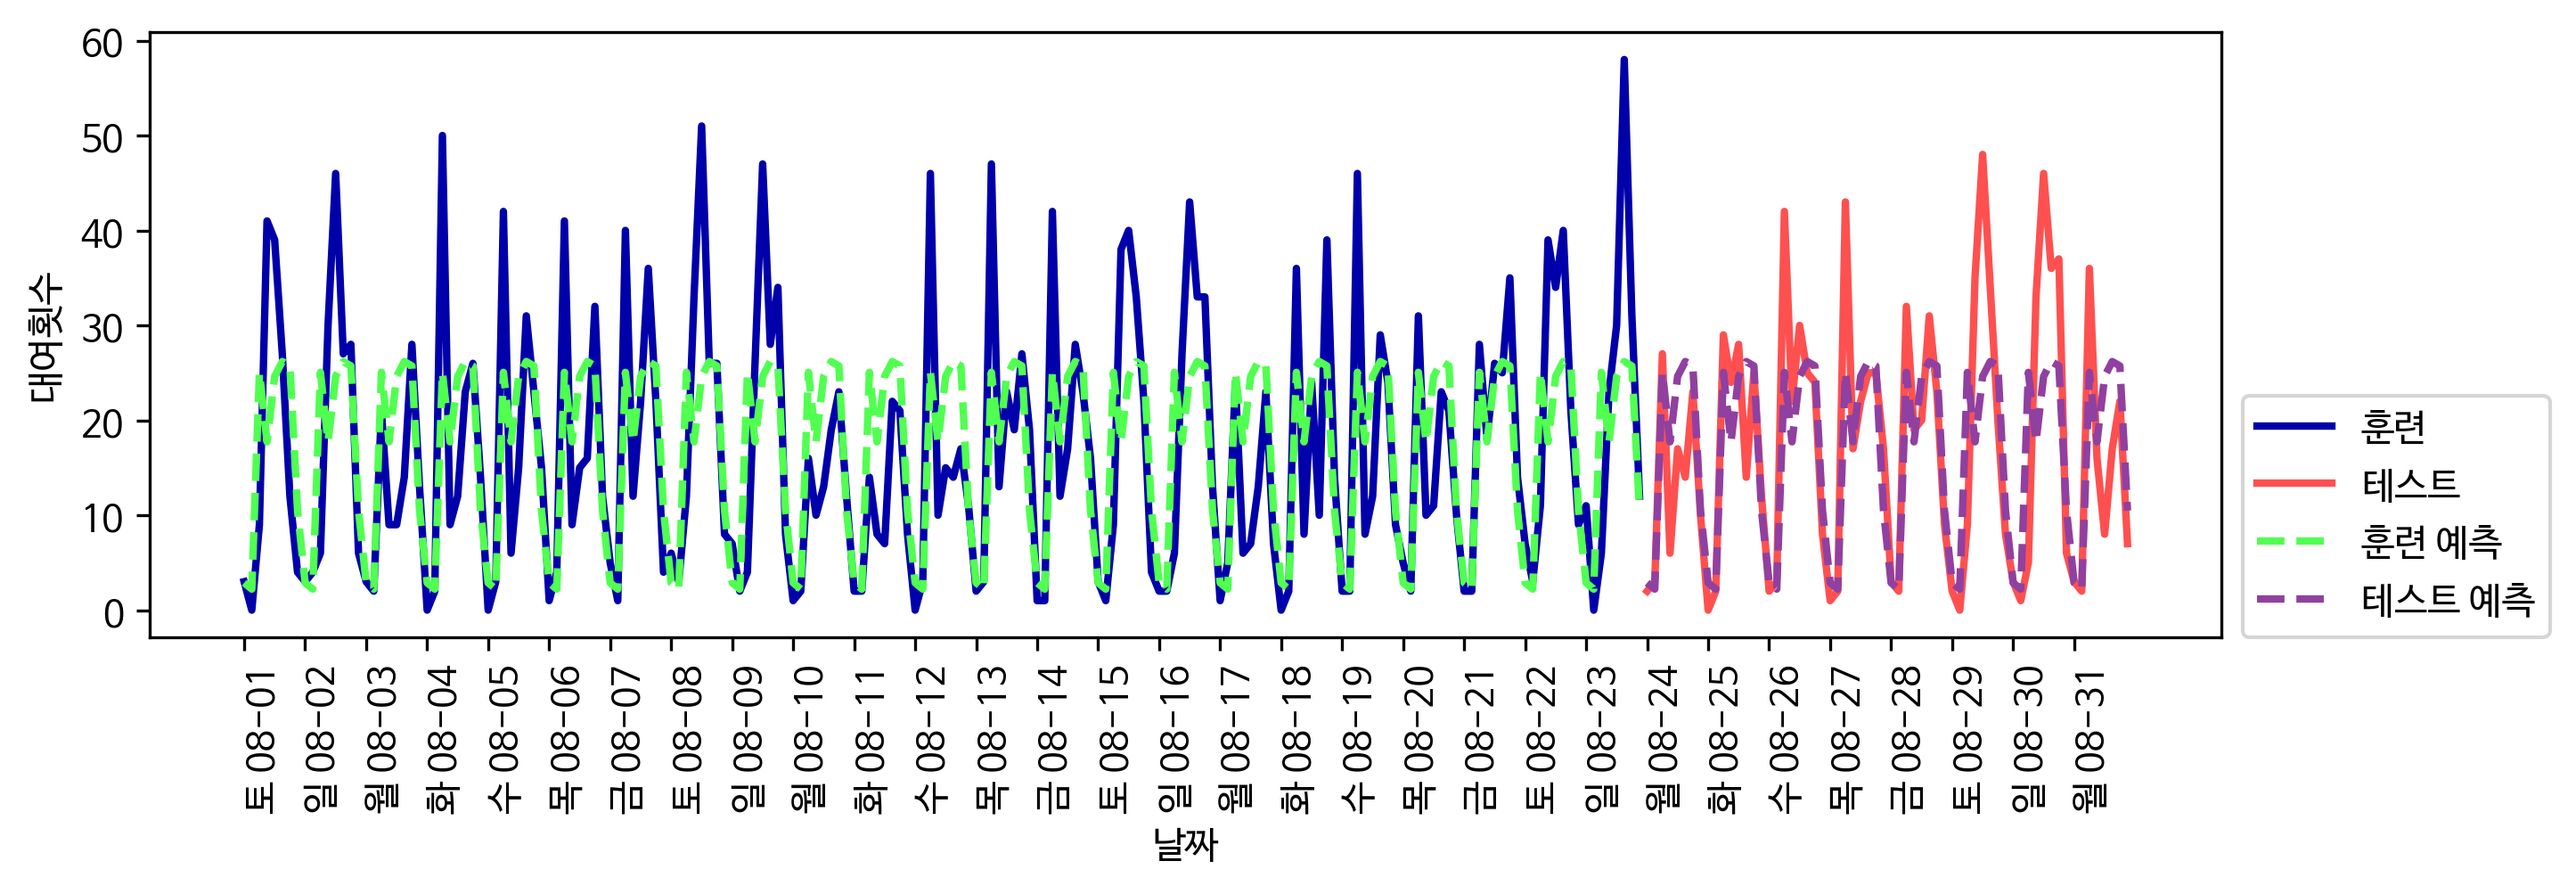

In [54]:
X_hour = citibike.index.hour.values.reshape(-1, 1)
eval_on_features(X_hour, y, regressor)

시간만 활용하여 만든 랜덤 포레스트 예측

테스트 세트 R^2: 0.84


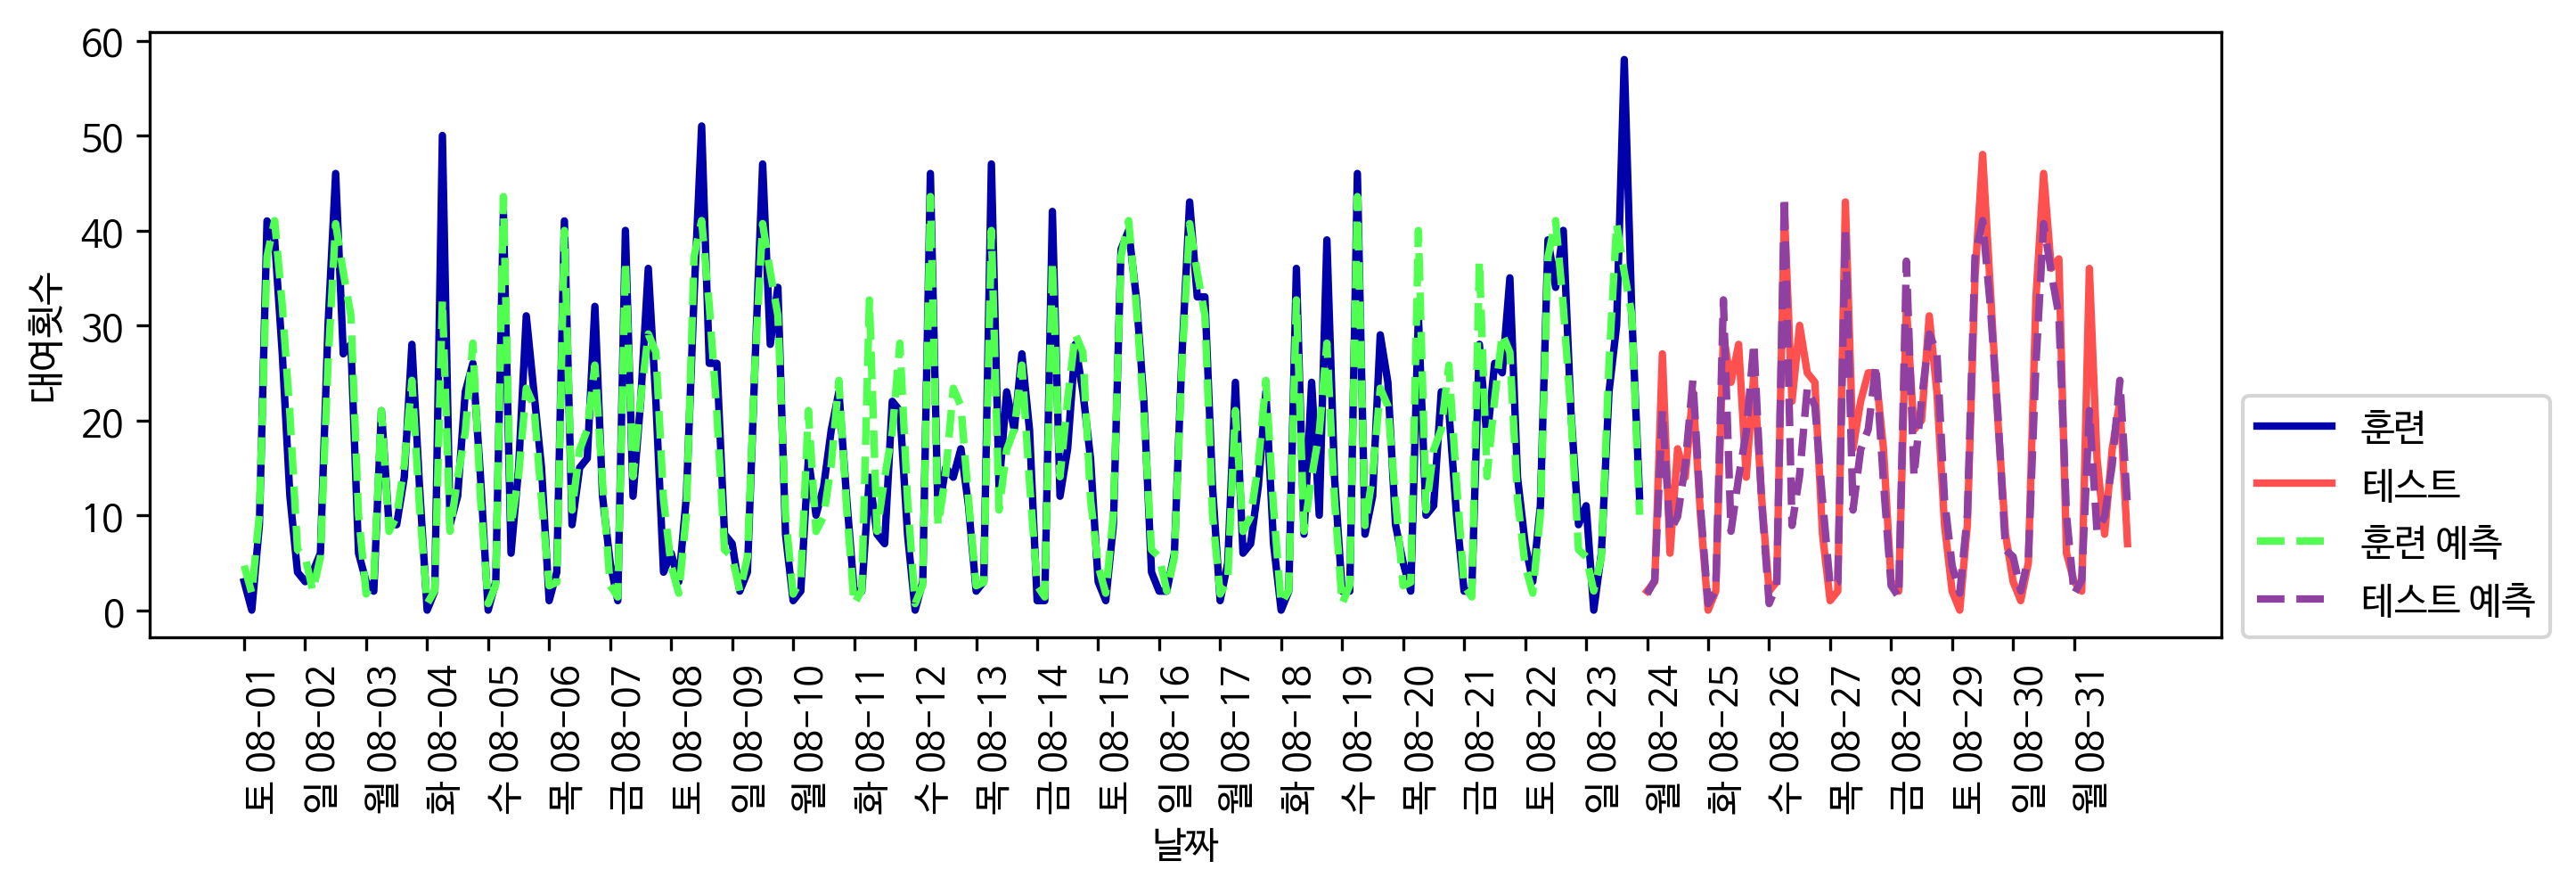

In [55]:
X_hour_week = np.hstack([citibike.index.dayofweek.values.reshape(-1, 1),
                         citibike.index.hour.values.reshape(-1, 1)])
eval_on_features(X_hour_week, y, regressor)

시간과 요일 특성 이용하여 만든 예측, 확실히 이전값들에 비해 좋은 결과를 얻었음을 확인 가능

테스트 세트 R^2: 0.13


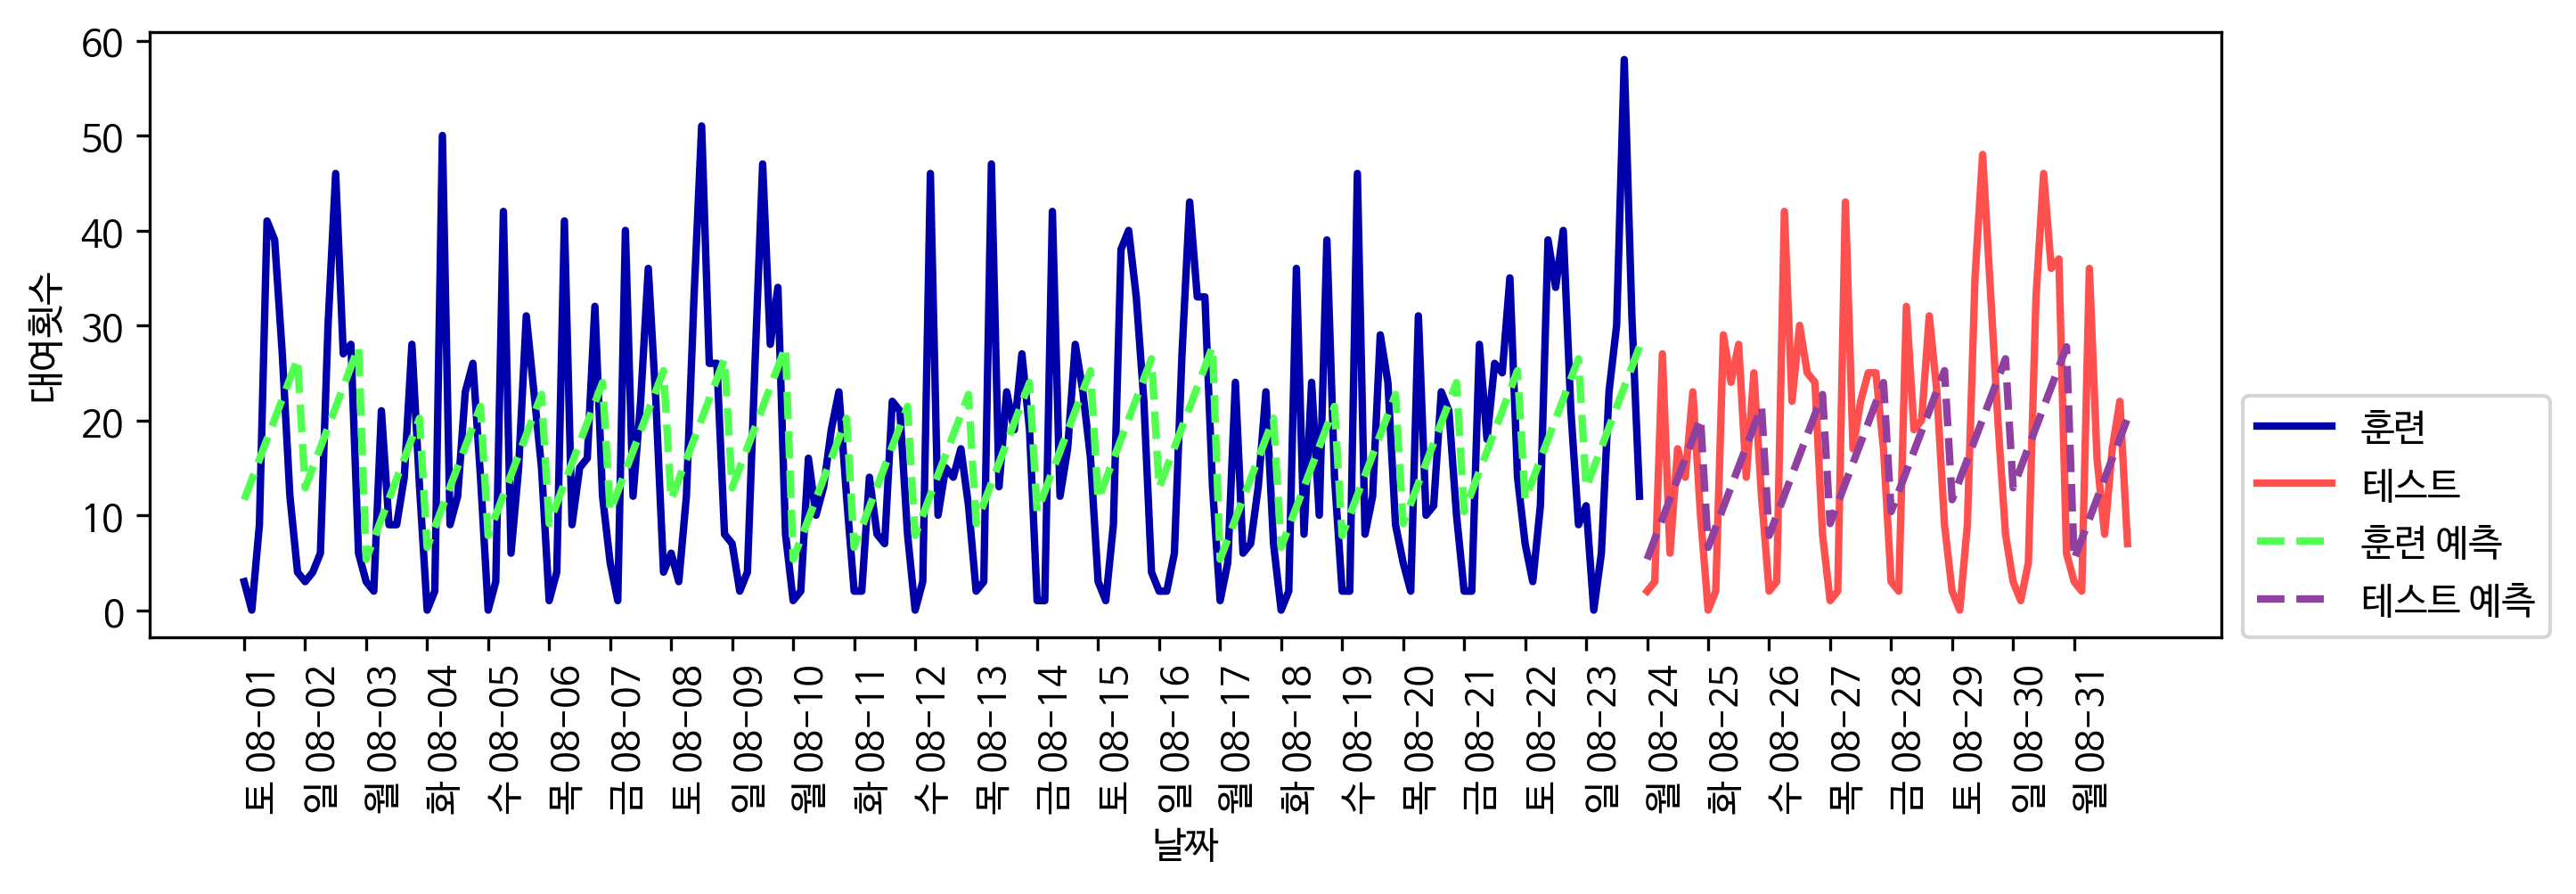

In [56]:
from sklearn.linear_model import LinearRegression
eval_on_features(X_hour_week, y, LinearRegression())

시간과 요일 특성을 사용하여 만든 선형회귀예측

In [57]:
enc = OneHotEncoder(categories='auto')
X_hour_week_onehot = enc.fit_transform(X_hour_week).toarray()

시간과 요일의 원-핫 인코딩을 사용

테스트 세트 R^2: 0.62


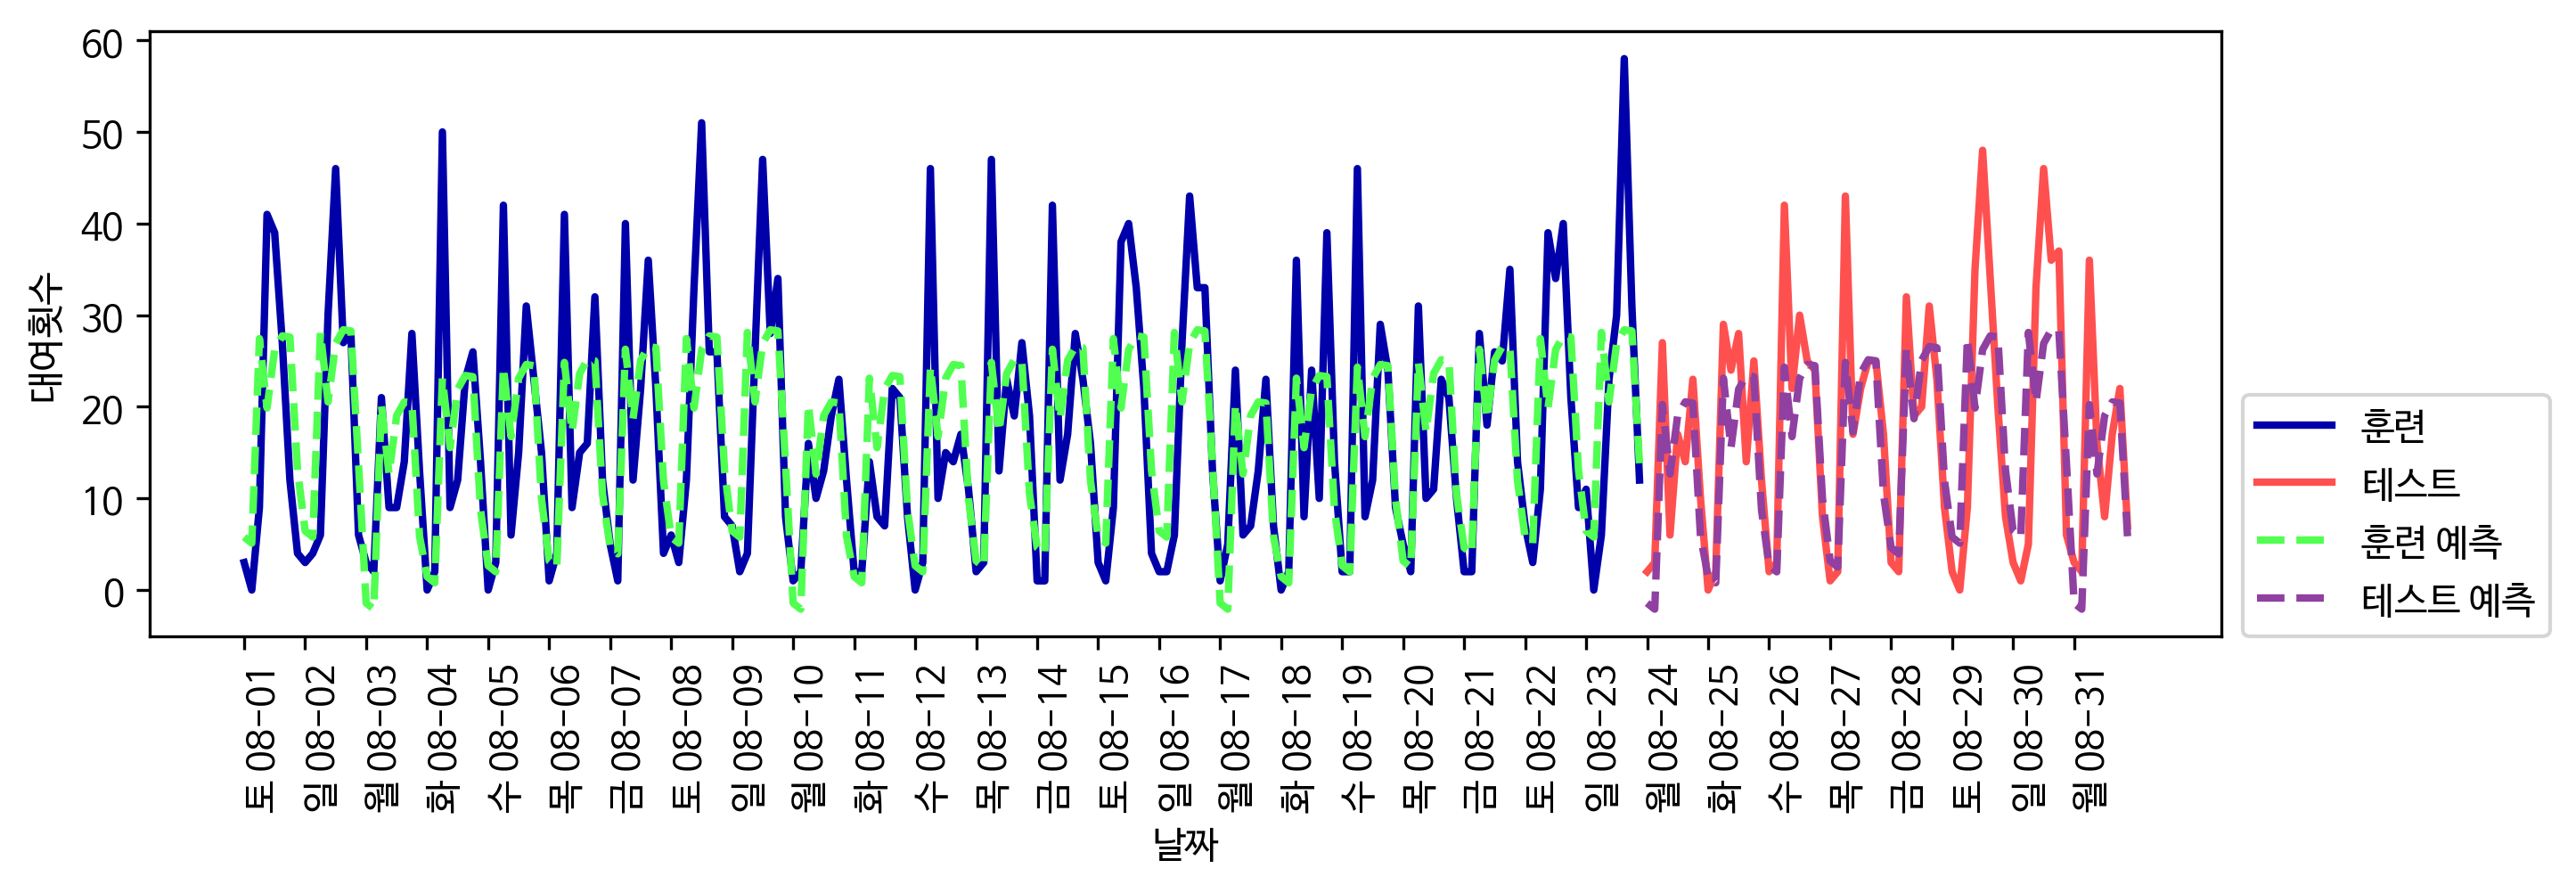

In [58]:
eval_on_features(X_hour_week_onehot, y, Ridge())

시간과 요일의 원-핫 인코딩을 사용해 만든 선형회귀의 예측

테스트 세트 R^2: 0.85


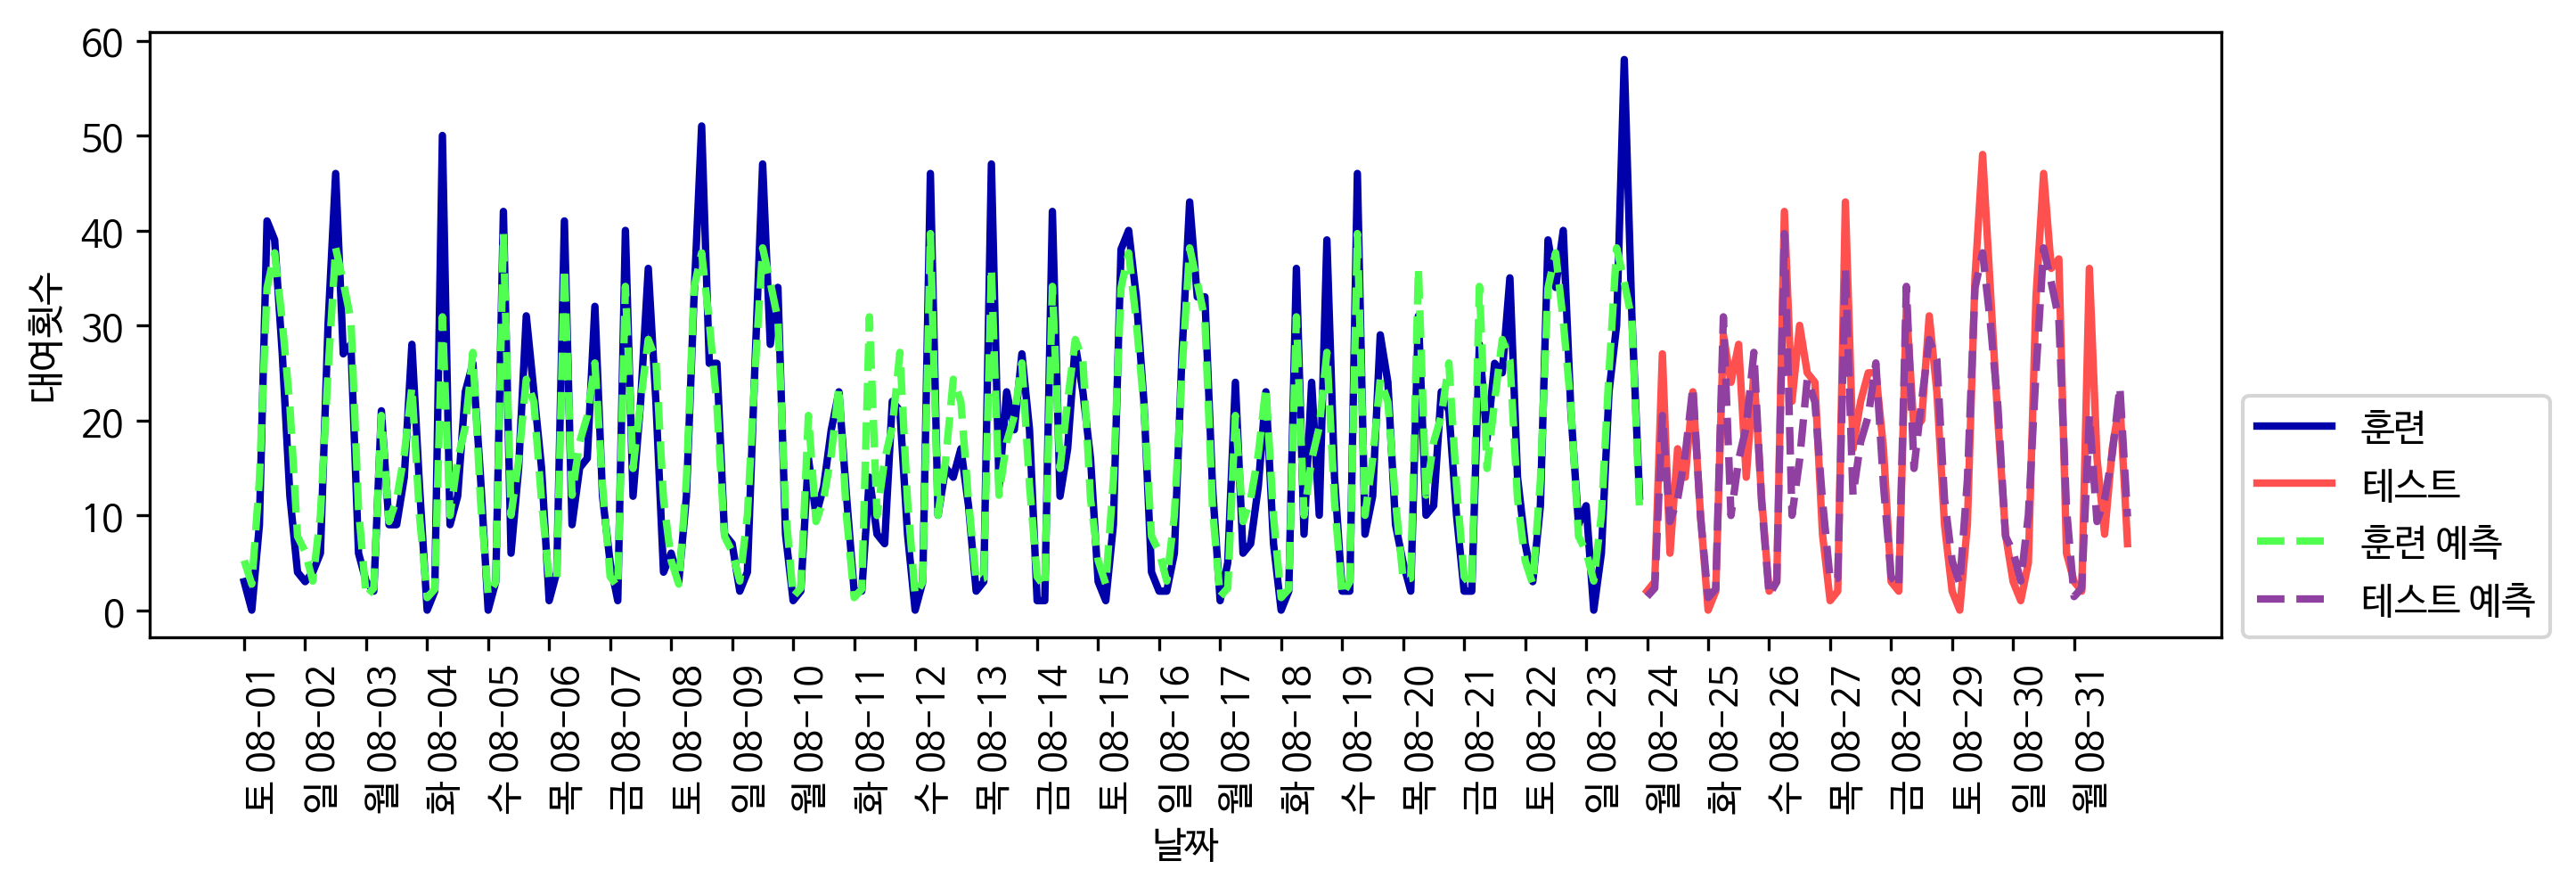

In [59]:
poly_transformer = PolynomialFeatures(degree=2, interaction_only=True,
                                      include_bias=False)
X_hour_week_onehot_poly = poly_transformer.fit_transform(X_hour_week_onehot)
lr = Ridge()
eval_on_features(X_hour_week_onehot_poly, y, lr)

시간과 요일의 곱을 특성으로 사용해 만든 선형 회귀의 예측

In [60]:
hour = ["%02d:00" % i for i in range(0, 24, 3)]
day = ["월", "화", "수", "목", "금", "토", "일"]
features =  day + hour

시간과 요일 특성의 이름 지음

In [61]:
features_poly = poly_transformer.get_feature_names(features)
features_nonzero = np.array(features_poly)[lr.coef_ != 0]
coef_nonzero = lr.coef_[lr.coef_ != 0]

Text(0, 0.5, '계수 크기')

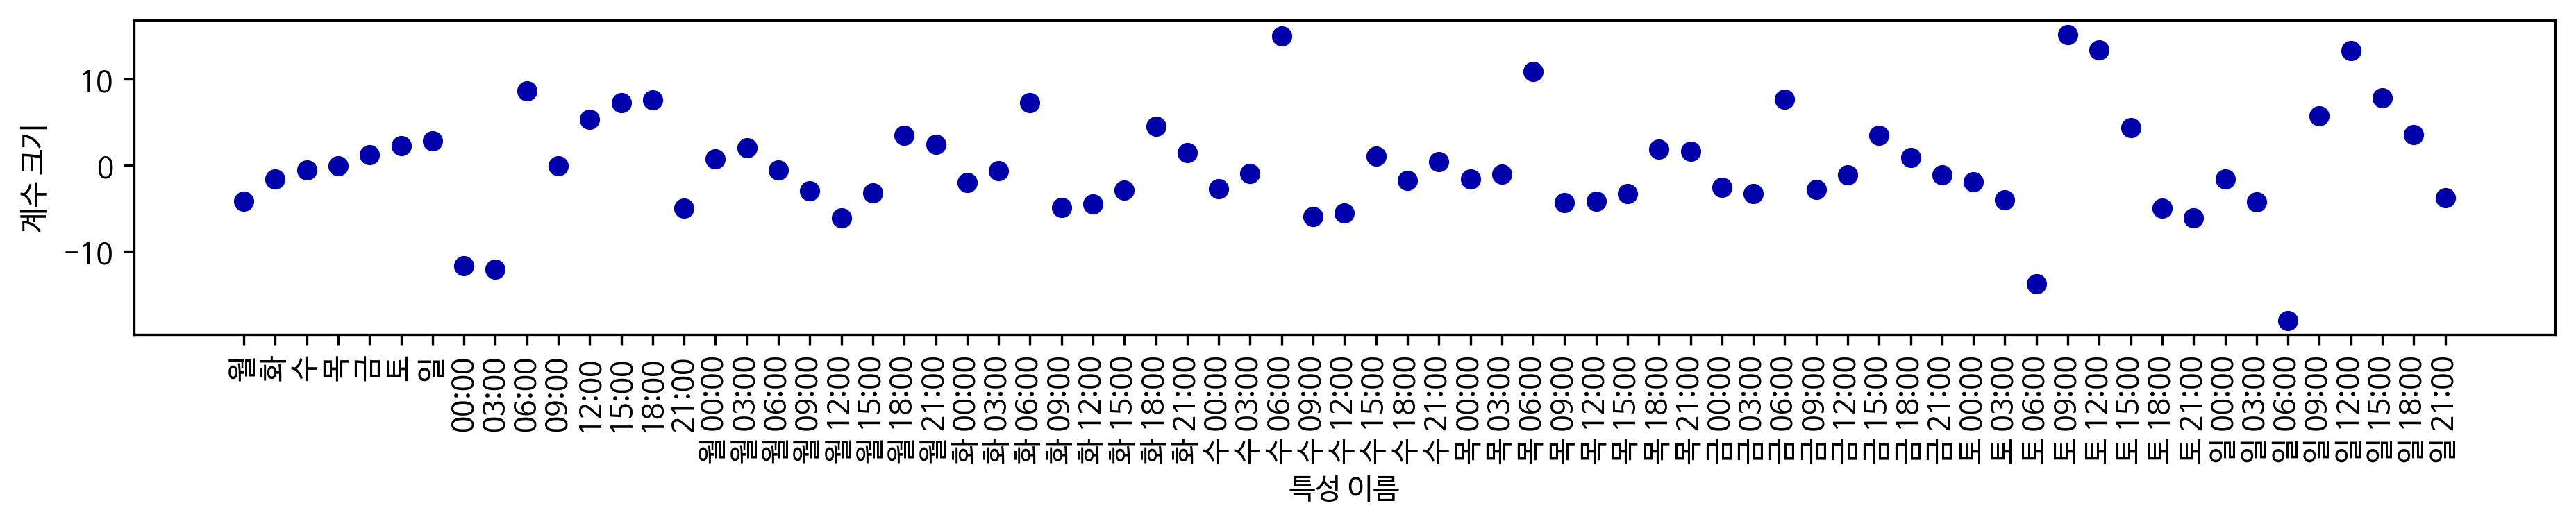

In [62]:
plt.figure(figsize=(15, 2))
plt.plot(coef_nonzero, 'o')
plt.xticks(np.arange(len(coef_nonzero)), features_nonzero, rotation=90)
plt.xlabel("특성 이름")
plt.ylabel("계수 크기")

시간과 요일의 곱을 사용한 선형 모델의 계수

# 모델 평가와 성능 향상

In [63]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X, y = make_blobs(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression(solver='liblinear', multi_class='ovr').fit(X_train, y_train)
print("테스트 세트 점수: {:.2f}".format(logreg.score(X_test, y_test)))

테스트 세트 점수: 0.88


인위적인 데이터 셋 만든 후 데이터 셋을 활용한 모델 생성, 평가

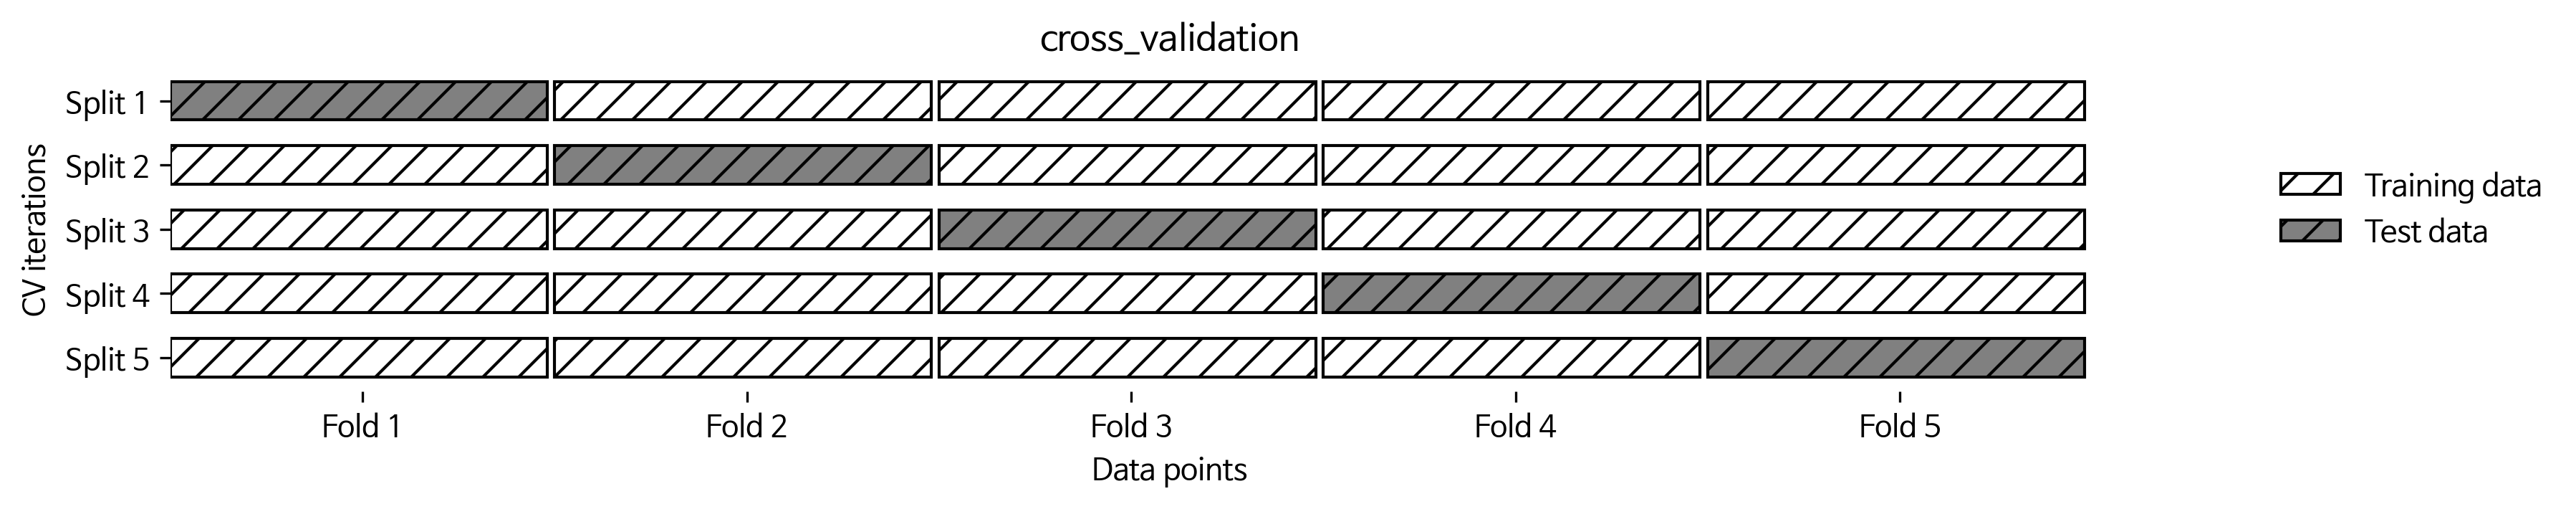

In [64]:
mglearn.plots.plot_cross_validation()

5겹 교차 검증에서의 데이터 분할

In [65]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression(solver='liblinear', multi_class='ovr')

scores = cross_val_score(logreg, iris.data, iris.target, cv=3)
print("교차 검증 점수: {}".format(scores))

교차 검증 점수: [0.96 0.96 0.94]


iris 데이터 셋에 적용한 로지스틱회귀 평가

In [66]:
scores = cross_val_score(logreg, iris.data, iris.target, cv=5)
print("교차 검증 점수: {}".format(scores))

교차 검증 점수: [1.    0.967 0.933 0.9   1.   ]


5겹 교차 검증 사용 확인 가능

In [67]:
print("교차 검증 평균 점수: {:.2f}".format(scores.mean()))

교차 검증 평균 점수: 0.96


평균 사용하여 교차 검증의 정확도 나타냄

In [68]:
from sklearn.datasets import load_iris
iris = load_iris()
print("Iris 레이블:\n{}".format(iris.target))

Iris 레이블:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


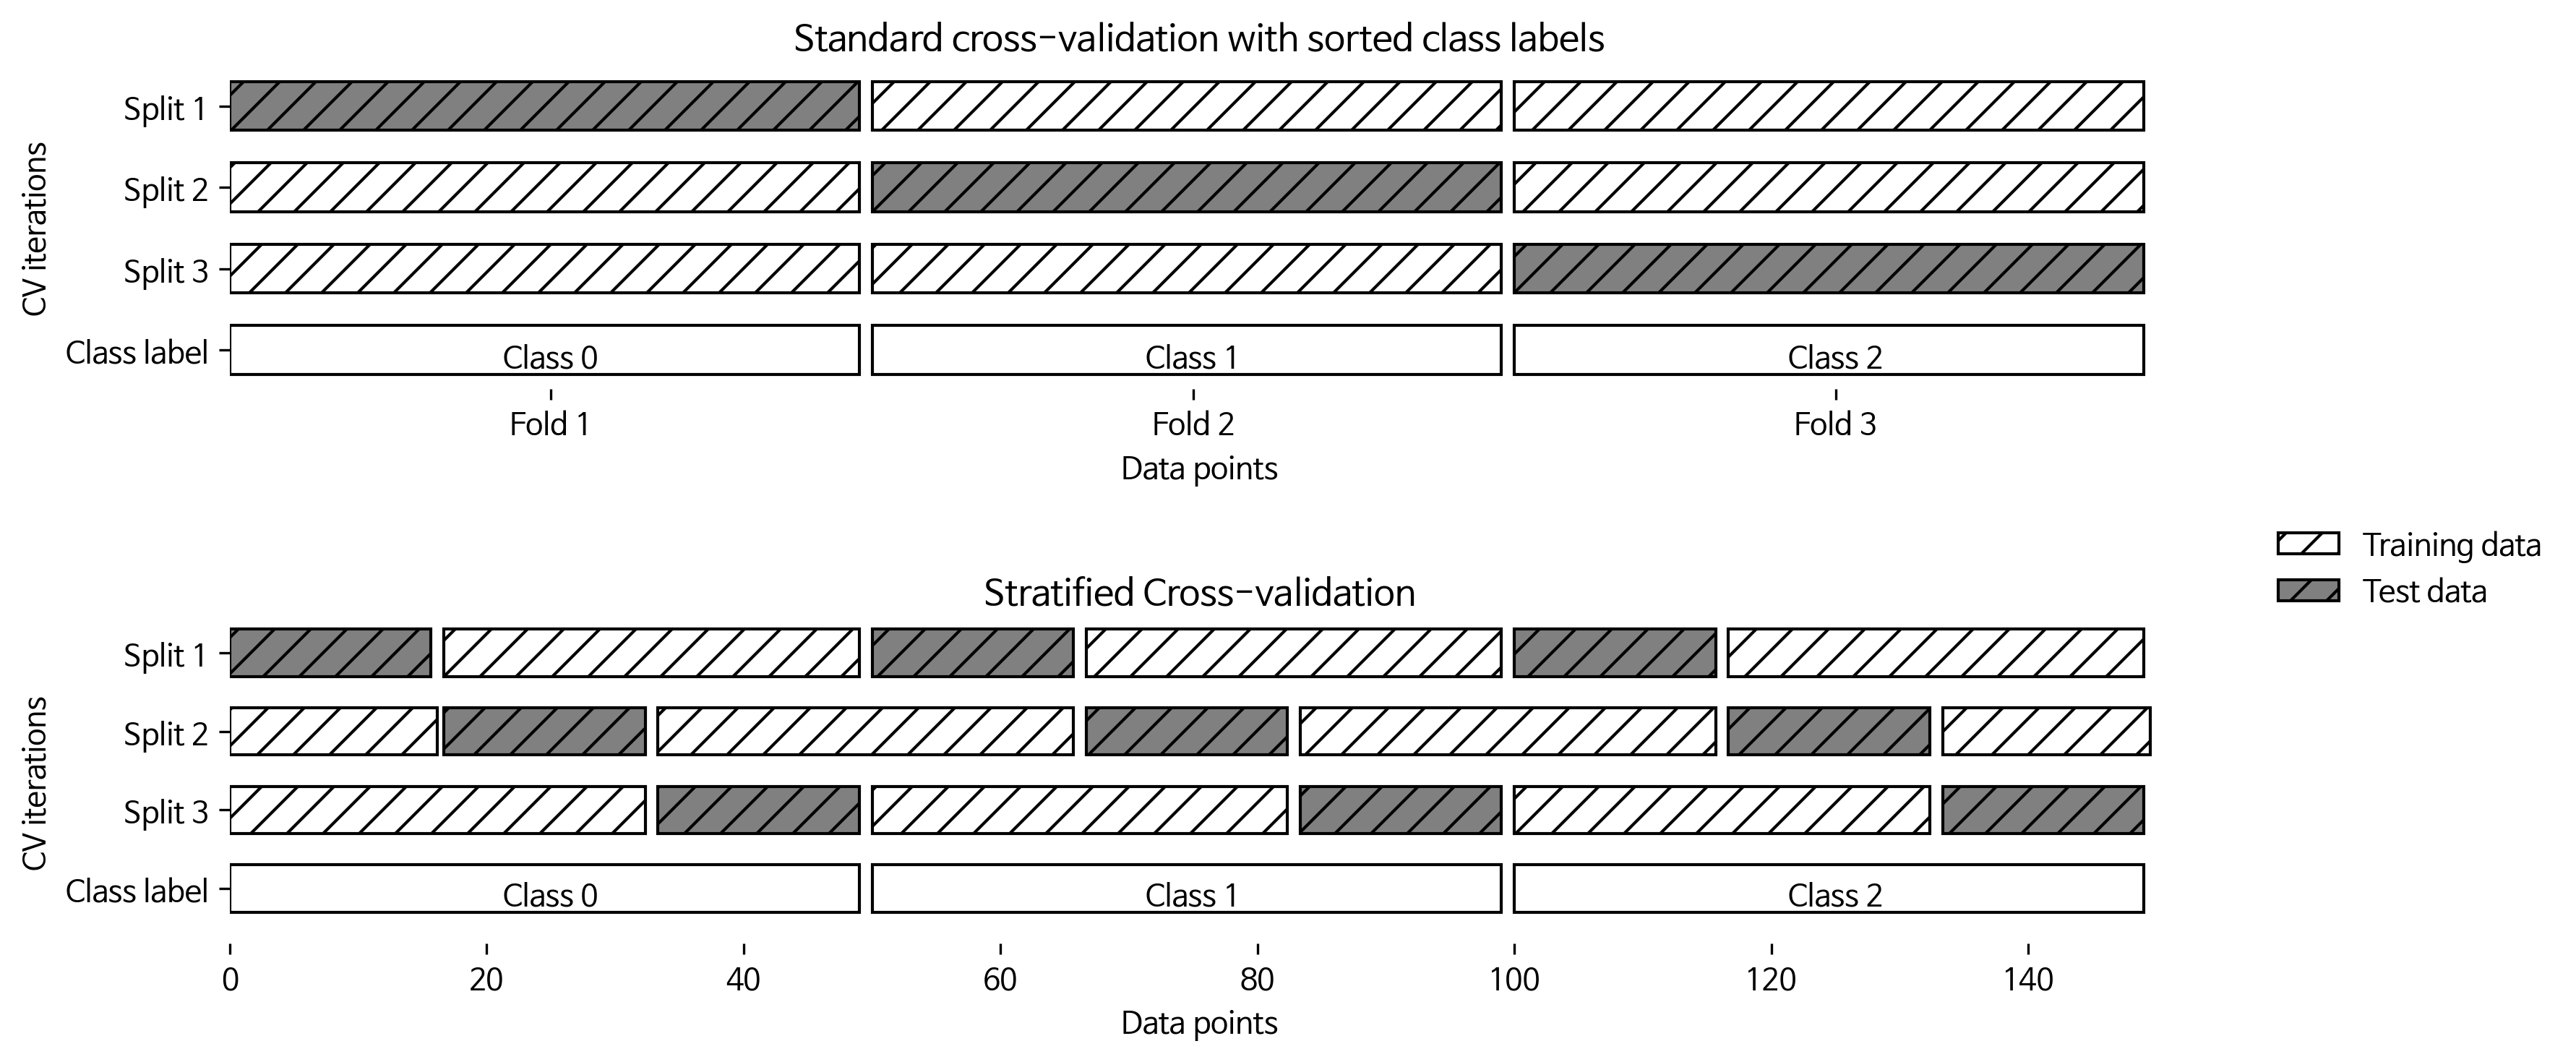

In [69]:
mglearn.plots.plot_stratified_cross_validation()

클래스 레이블 순서대로 정렬된 데이터에서 기본 교차 검증과 계층별 교차 검증 비교

In [70]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5)

model_selection 모듈에서 KFold 분할기 불러와 폴드 수를 넣어 객체 생성

In [71]:
print("교차 검증 점수:\n{}".format(
      cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

교차 검증 점수:
[1.    0.933 0.433 0.967 0.433]


kfold 객체를 cv의 매개변수로 전달

In [72]:
kfold = KFold(n_splits=3)
print("교차 검증 점수:\n{}".format(
      cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

교차 검증 점수:
[0. 0. 0.]


데이터 섞여있지않아 점수가 낮음

In [73]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
print("교차 검증 점수:\n{}".format(
    cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

교차 검증 점수:
[0.9  0.96 0.96]


데이터 섞어주어 좋은 결과를 얻었음을 확인할 수 있음

In [74]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)
print("교차 검증 분할 횟수: ", len(scores))
print("평균 정확도: {:.2f}".format(scores.mean()))

교차 검증 분할 횟수:  150
평균 정확도: 0.95


LOOCV 사용 : 폴드 하나에 샘플 하나만 들어있는 k-겹 교차 검증

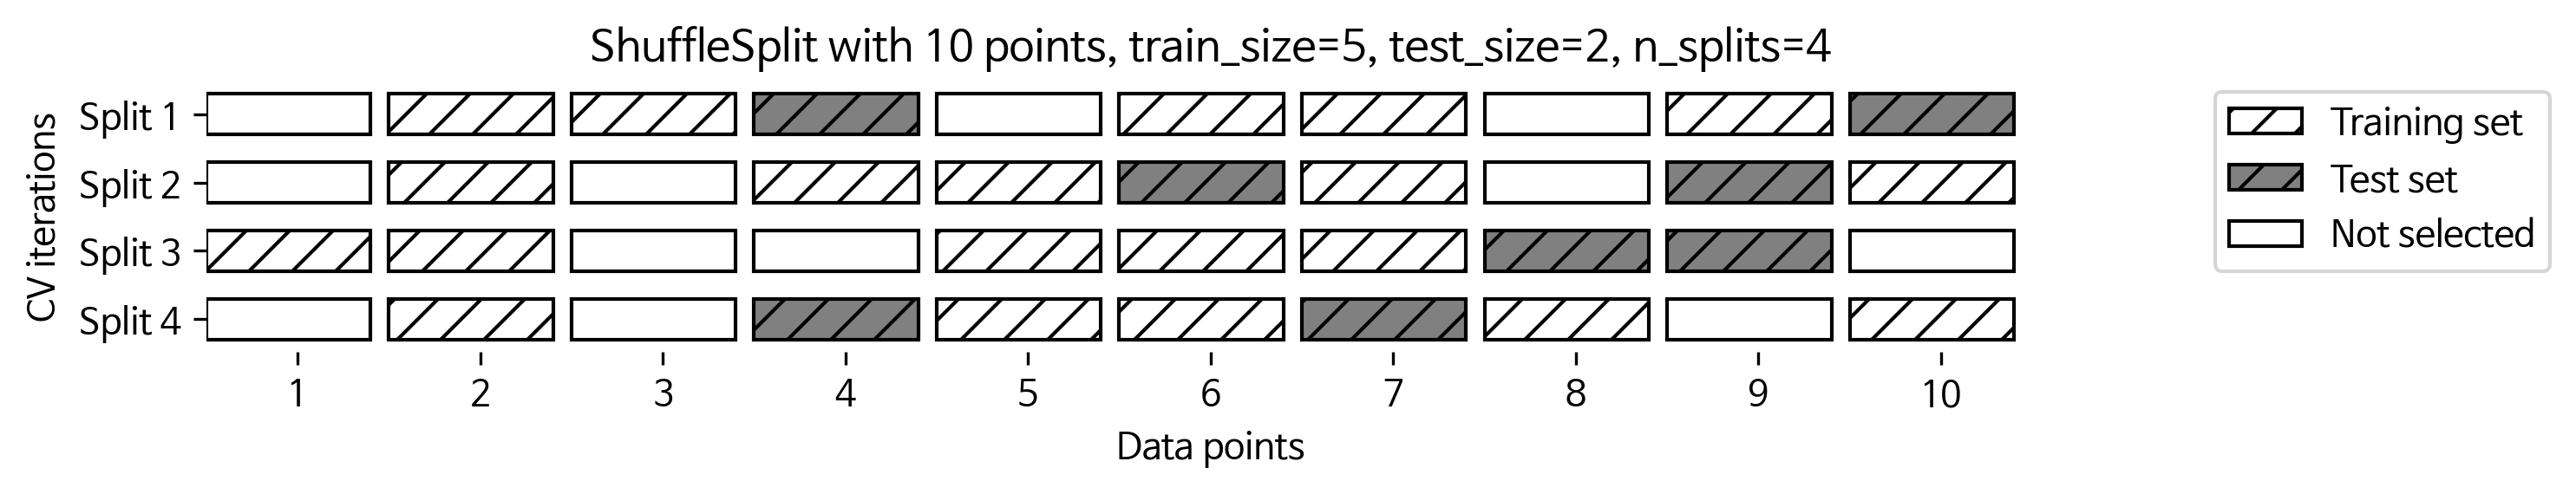

In [75]:
mglearn.plots.plot_shuffle_split()

10개의 데이터 포인트에 train_size=5, test_size=2, n_split=4 사용한 ShuffleSplit

In [76]:
from sklearn.model_selection import ShuffleSplit

shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
print("교차 검증 점수:\n{}".format(scores))

교차 검증 점수:
[0.933 0.973 0.907 0.96  0.947 0.92  0.787 0.933 0.853 0.987]


데이터셋의 50%를 훈련세트로, 나머지를 테스트 세트로 10번 반복

In [77]:
from sklearn.model_selection import GroupKFold

X, y = make_blobs(n_samples=12, random_state=0)
groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]
scores = cross_val_score(logreg, X, y, groups, cv=GroupKFold(n_splits=3))
print("교차 검증 점수:\n{}".format(scores))

교차 검증 점수:
[0.75  0.8   0.667]


D:\anaconda\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass groups=[0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


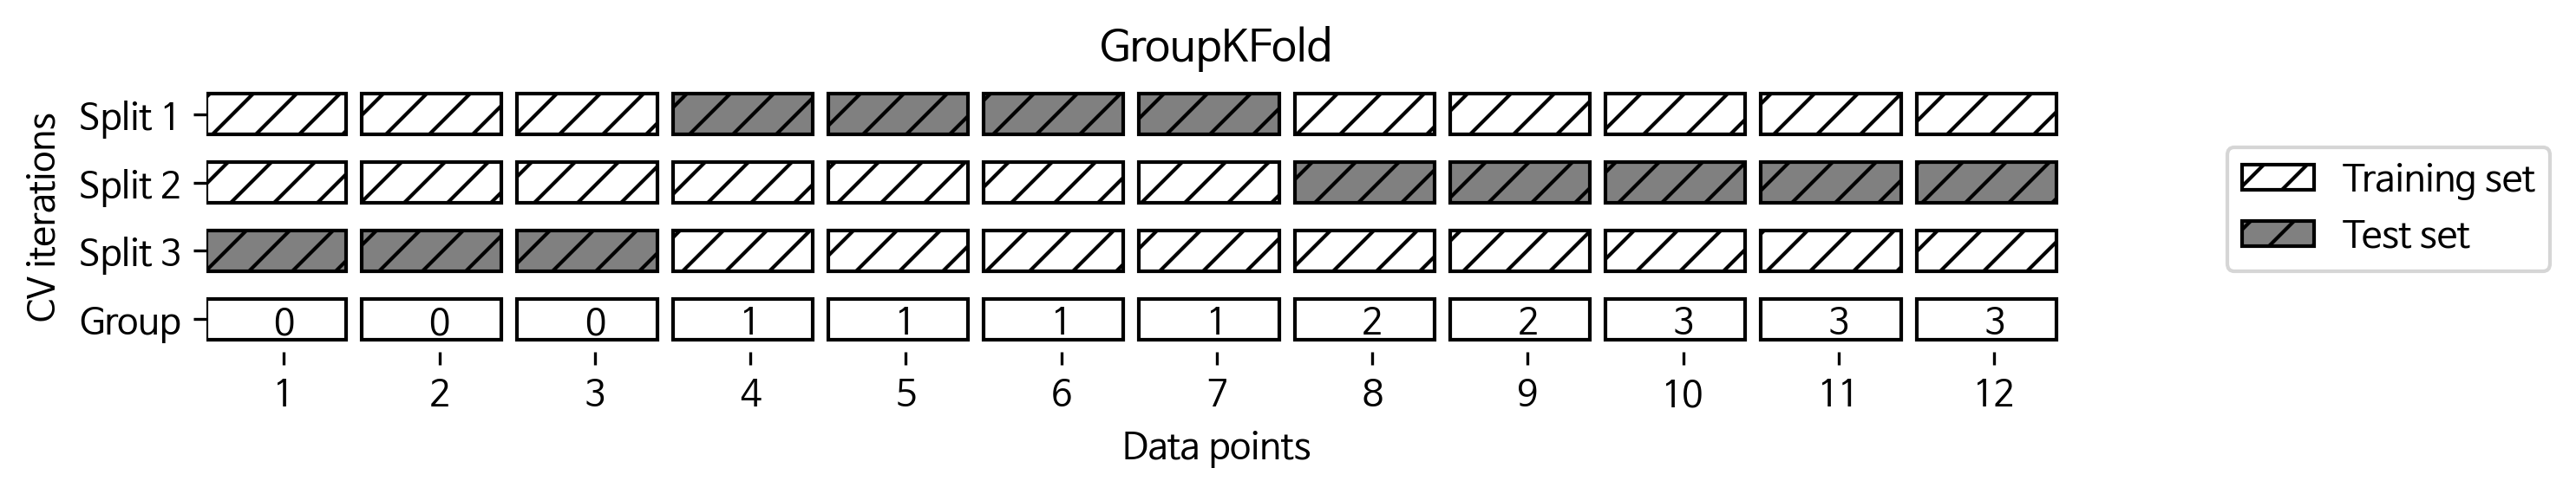

In [78]:
mglearn.plots.plot_group_kfold()

레이블에 기반한 GroupKFold분할

In [79]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,
                                                    random_state=0)
print("훈련 세트의 크기: {}   테스트 세트의 크기: {}".format(
      X_train.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # 매개변수의 각 조합에 대해 SVC를 훈련시킵니다
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # 테스트 세트로 SVC를 평가합니다
        score = svm.score(X_test, y_test)
        # 점수가 더 높으면 매개변수와 함께 기록합니다
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
            
print("최고 점수: {:.2f}".format(best_score))
print("최적 파라미터: {}".format(best_parameters))

훈련 세트의 크기: 112   테스트 세트의 크기: 38
최고 점수: 0.97
최적 파라미터: {'C': 100, 'gamma': 0.001}


데이터셋에 groups 배열ㄹ로 그룹 지정, 데이터셋은 12개의 포인트로 이뤄져 있고 groups는 각 데이터 포인트에 대해 각 포인트가 어떤 그룹에 속하는지 나타냄  

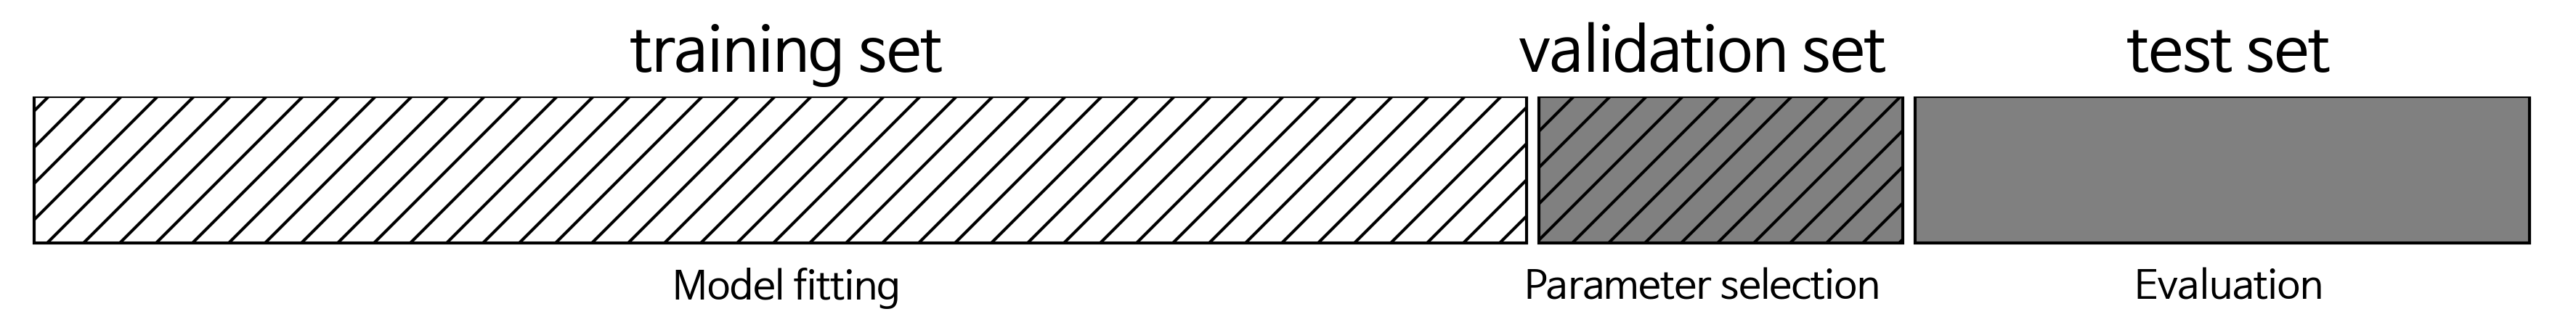

In [80]:
mglearn.plots.plot_threefold_split()

In [81]:
from sklearn.svm import SVC

X_trainval, X_test, y_trainval, y_test = train_test_split(
    iris.data, iris.target, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_trainval, y_trainval, random_state=1)
print("훈련 세트의 크기: {}   검증 세트의 크기: {}   테스트 세트의 크기:"
      " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        score = svm.score(X_valid, y_valid)
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print("검증 세트에서 최고 점수: {:.2f}".format(best_score))
print("최적 파라미터: ", best_parameters)
print("최적 파라미터에서 테스트 세트 점수: {:.2f}".format(test_score))

훈련 세트의 크기: 84   검증 세트의 크기: 28   테스트 세트의 크기: 38

검증 세트에서 최고 점수: 0.96
최적 파라미터:  {'C': 10, 'gamma': 0.001}
최적 파라미터에서 테스트 세트 점수: 0.92


두 매개변수 조합에 대해 분류기 학습, 평가하는 그리드 서치를 for문 사용해 생성

In [82]:
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        score = np.mean(scores)
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)

SVC(C=10, gamma=0.1)

일반화 성능 더 잘 평가하기 위해 훈련 세트와 검증세트를 한번만 나누는 것이 아닌 교차 검증을 사용하여 각 매개변수 조합의 성능 평가

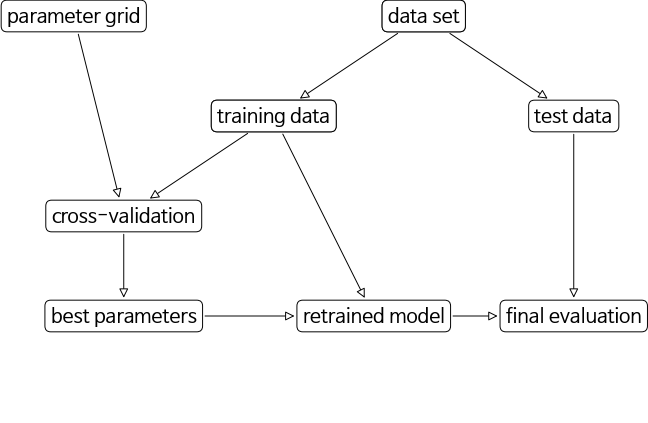

In [83]:
mglearn.plots.plot_grid_search_overview()

교차 검증과 그리드 서치를 사용한 매개변수 선ㄴ택과 모델 평가의 작업 흐름

In [84]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("매개변수 그리드:\n{}".format(param_grid))

매개변수 그리드:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [85]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)

모델, param_grid, 원하는 교차 검증으로 GridSearchCV 객체 생성

In [86]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,random_state=0)

In [87]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

param_grid에 설정된 매개변수 조합에 대한 교차 검증 수행

In [88]:
print("테스트 세트 점수: {:.2f}".format(grid_search.score(X_test, y_test)))

테스트 세트 점수: 0.97


GridSearchCV는 전체 데이터로 학습한 모델에 접근할 수 있도록 predict와 score 메서드를 제공.  

In [89]:
print("최적 매개변수: {}".format(grid_search.best_params_))
print("최고 교차 검증 점수: {:.2f}".format(grid_search.best_score_))

최적 매개변수: {'C': 10, 'gamma': 0.1}
최고 교차 검증 점수: 0.97


In [90]:
print("최고 성능 모델:\n{}".format(grid_search.best_estimator_))

최고 성능 모델:
SVC(C=10, gamma=0.1)


In [91]:
import pandas as pd

pd.set_option('display.max_columns', None)
results = pd.DataFrame(grid_search.cv_results_)
display(np.transpose(results.head()))

0                            1  \
mean_fit_time                             0.0019                       0.0021   
std_fit_time                              0.0009                      0.00015   
mean_score_time                           0.0009                      0.00092   
std_score_time                            0.0005                      0.00015   
param_C                                    0.001                        0.001   
param_gamma                                0.001                         0.01   
params              {'C': 0.001, 'gamma': 0.001}  {'C': 0.001, 'gamma': 0.01}   
split0_test_score                           0.35                         0.35   
split1_test_score                           0.35                         0.35   
split2_test_score                           0.36                         0.36   
split3_test_score                           0.36                         0.36   
split4_test_score                           0.41                         0.41   
mean_test_score                             0.37                         0.37   
std_test_score                             0.022                        0.022   
rank_test_score                               22                           22   
split0_train_score                          0.37                         0.37   
split1_train_score                          0.37                         0.37   
split2_train_score                          0.37                         0.37   
split3_train_score                          0.37                         0.37   
split4_train_score                          0.36                         0.36   
mean_train_score                            0.37                         0.37   
std_train_score                           0.0056                       0.0056   

                                             2                         3  \
mean_fit_time                           0.0024                    0.0024   
std_fit_time                            0.0005                   0.00049   
mean_score_time                         0.0012                     0.001   
std_score_time                          0.0004                   0.00063   
param_C                                  0.001                     0.001   
param_gamma                                0.1                         1   
params              {'C': 0.001, 'gamma': 0.1}  {'C': 0.001, 'gamma': 1}   
split0_test_score                         0.35                      0.35   
split1_test_score                         0.35                      0.35   
split2_test_score                         0.36                      0.36   
split3_test_score                         0.36                      0.36   
split4_test_score                         0.41                      0.41   
mean_test_score                           0.37                      0.37   
std_test_score                           0.022                     0.022   
rank_test_score                             22                        22   
split0_train_score                        0.37                      0.37   
split1_train_score                        0.37                      0.37   
split2_train_score                        0.37                      0.37   
split3_train_score                        0.37                      0.37   
split4_train_score                        0.36                      0.36   
mean_train_score                          0.37                      0.37   
std_train_score                         0.0056                    0.0056   

                                            4  
mean_fit_time                          0.0015  
std_fit_time                          0.00068  
mean_score_time                       0.00089  
std_score_time                        0.00047  
param_C                                 0.001  
param_gamma                                10  
params              {'C': 0.001, 'gamma': 10}  
split0_test_score                        0.35  
sp

데이터프레임으로 변환한 후 처음 다섯개 행 출력

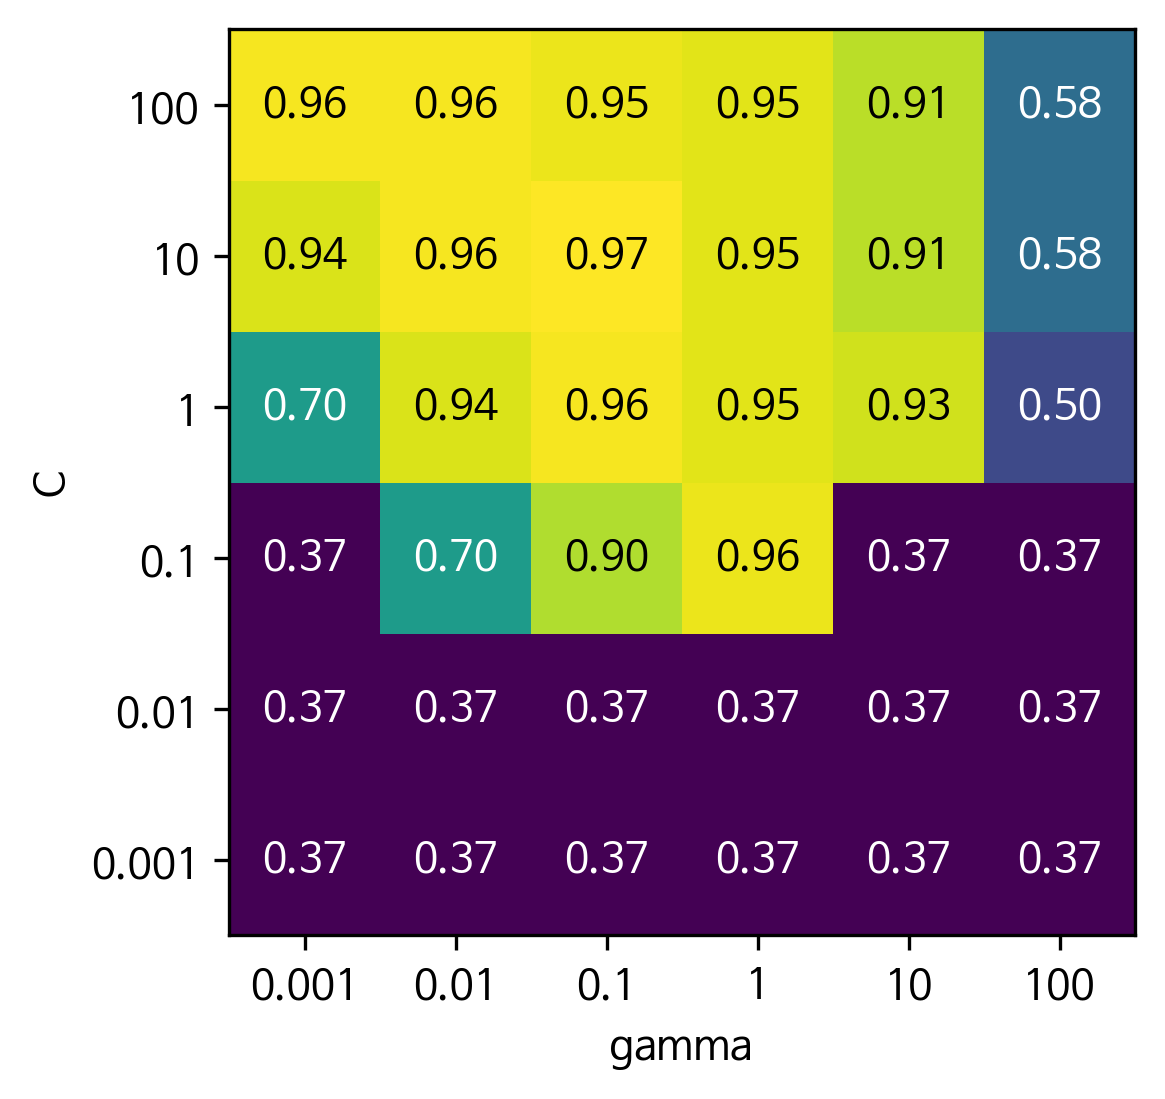

In [92]:
scores = np.array(results.mean_test_score).reshape(6, 6)

mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'],
                      ylabel='C', yticklabels=param_grid['C'], cmap="viridis")

C와 감마값에 따른 교차 검증 평균 점수의 히트맵

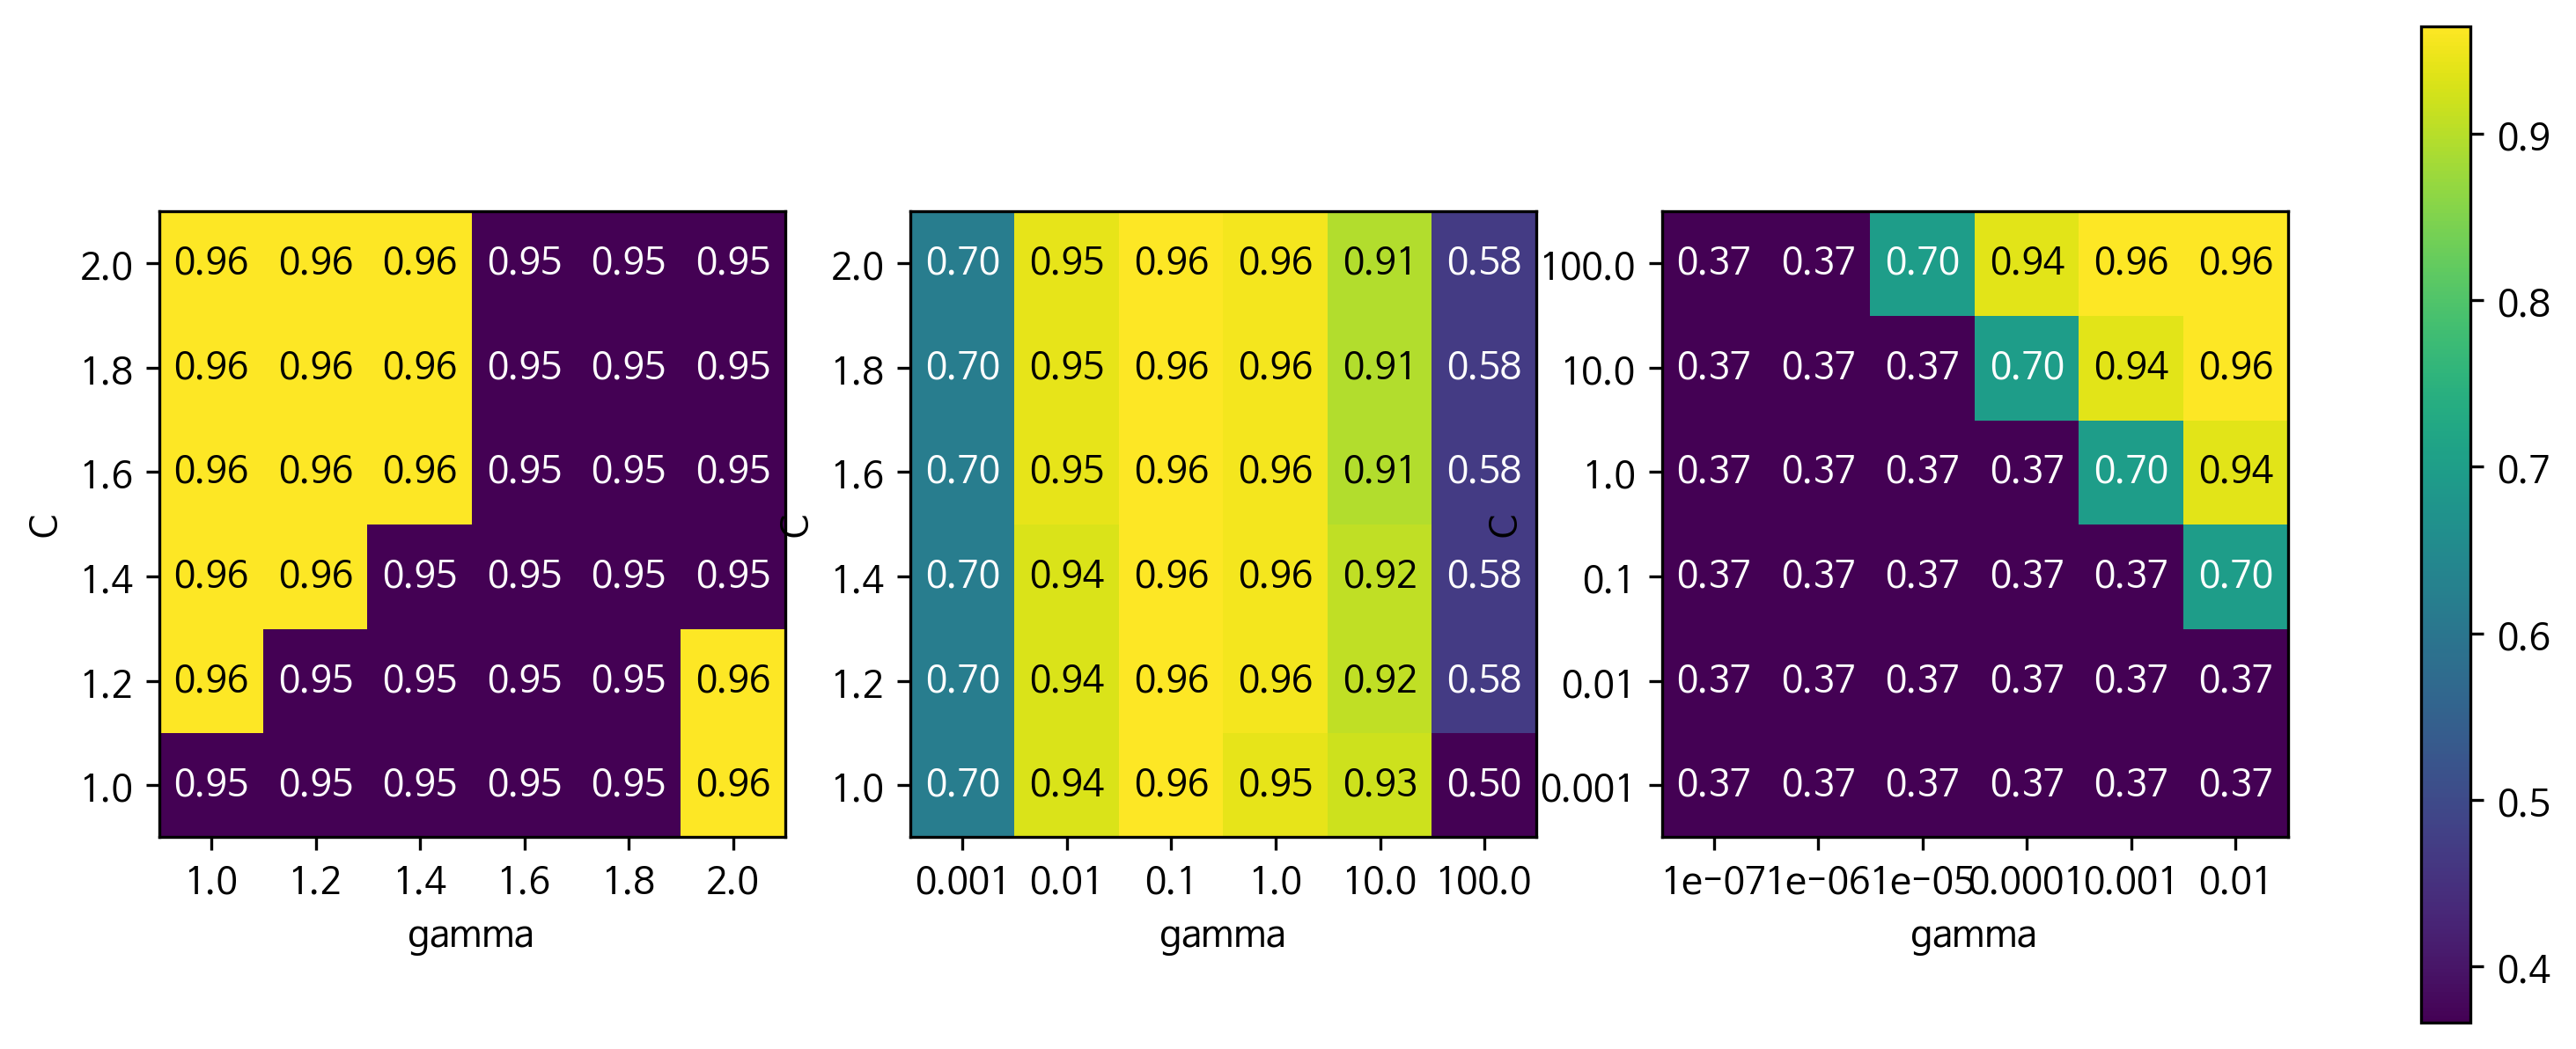

In [93]:
fig, axes = plt.subplots(1, 3, figsize=(13, 5))

param_grid_linear = {'C': np.linspace(1, 2, 6),
                     'gamma':  np.linspace(1, 2, 6)}

param_grid_one_log = {'C': np.linspace(1, 2, 6),
                     'gamma':  np.logspace(-3, 2, 6)}

param_grid_range = {'C': np.logspace(-3, 2, 6),
                     'gamma':  np.logspace(-7, -2, 6)}

for param_grid, ax in zip([param_grid_linear, param_grid_one_log,
                           param_grid_range], axes):
    grid_search = GridSearchCV(SVC(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    scores = grid_search.cv_results_['mean_test_score'].reshape(6, 6)

    scores_image = mglearn.tools.heatmap(
        scores, xlabel='gamma', ylabel='C', xticklabels=param_grid['gamma'],
        yticklabels=param_grid['C'], cmap="viridis", ax=ax)
    
plt.colorbar(scores_image, ax=axes.tolist())

전부 적절하지 않고 데이터가 쏠려있다

In [94]:
param_grid = [{'kernel': ['rbf'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100],
               'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
              {'kernel': ['linear'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
print("그리드 목록:\n{}".format(param_grid))

그리드 목록:
[{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]


첫 번째 그리드에서 커널 매개변수는 rbf로 고정되고 C와 감마 두 매개변수는 바뀜.  
두 번째 그리드에서 커널 매개변수는 항살 linear로 고정되고 C만 변경됨

In [95]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("최적 파라미터: {}".format(grid_search.best_params_))
print("최고 교차 검증 점수: {:.2f}".format(grid_search.best_score_))

최적 파라미터: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
최고 교차 검증 점수: 0.97


In [96]:
results = pd.DataFrame(grid_search.cv_results_)
display(results.T)

0   \
mean_fit_time                                               0.002   
std_fit_time                                              0.00067   
mean_score_time                                           0.00099   
std_score_time                                            0.00061   
param_C                                                     0.001   
param_gamma                                                 0.001   
param_kernel                                                  rbf   
params              {'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}   
split0_test_score                                            0.35   
split1_test_score                                            0.35   
split2_test_score                                            0.36   
split3_test_score                                            0.36   
split4_test_score                                            0.41   
mean_test_score                                              0.37   
std_test_score                                              0.022   
rank_test_score                                                27   
split0_train_score                                           0.37   
split1_train_score                                           0.37   
split2_train_score                                           0.37   
split3_train_score                                           0.37   
split4_train_score                                           0.36   
mean_train_score                                             0.37   
std_train_score                                            0.0056   

                                                              1   \
mean_fit_time                                             0.0024   
std_fit_time                                             0.00044   
mean_score_time                                          0.00075   
std_score_time                                           0.00038   
param_C                                                    0.001   
param_gamma                                                 0.01   
param_kernel                                                 rbf   
params              {'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}   
split0_test_score                                           0.35   
split1_test_score                                           0.35   
split2_test_score                                           0.36   
split3_test_score                                           0.36   
split4_test_score                                           0.41   
mean_test_score                                             0.37   
std_test_score                                             0.022   
rank_test_score                                               27   
split0_train_score                                          0.37   
split1_train_score                                          0.37   
split2_train_score                                          0.37   
split3_train_score                                          0.37   
split4_train_score                                          0.36   
mean_train_score                                            0.37   
std_train_score                                           0.0056   

                                                             2   \
mean_fit_time                                            0.0018   
std_fit_time                                             0.0004   
mean_score_time                                          0.0006   
std_score_time                                          0.00049   
param_C                                                   0.001   
param_gamma                                                 0.1   
param_kernel                                                rbf   
params              {'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}   
split0_test_score                                          0.35   
split1_test_score                                          0.35   
split2_test_score                   

In [97]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv=5),
                         iris.data, iris.target, cv=5)
print("교차 검증 점수: ", scores)
print("교차 검증 평균 점수: ", scores.mean())
print(param_grid)

교차 검증 점수:  [0.967 1.    0.967 0.967 1.   ]
교차 검증 평균 점수:  0.9800000000000001
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


SVC는 평균교차검증 정확도가 꽤 높이 나옴을 확인 가능

In [98]:
def nested_cv(X, y, inner_cv, outer_cv, Classifier, parameter_grid):
    outer_scores = []
   
    for training_samples, test_samples in outer_cv.split(X, y):
        best_parms = {}
        best_score = -np.inf
        for parameters in parameter_grid:
            cv_scores = []
            for inner_train, inner_test in inner_cv.split(
                    X[training_samples], y[training_samples]):
                clf = Classifier(**parameters)
                clf.fit(X[inner_train], y[inner_train])
                score = clf.score(X[inner_test], y[inner_test])
                cv_scores.append(score)
            mean_score = np.mean(cv_scores)
            if mean_score > best_score:
                best_score = mean_score
                best_params = parameters
        clf = Classifier(**best_params)
        clf.fit(X[training_samples], y[training_samples])
        outer_scores.append(clf.score(X[test_samples], y[test_samples]))
    return np.array(outer_scores)

5-겹 교차 검증 함수 표현

In [99]:
from sklearn.model_selection import ParameterGrid, StratifiedKFold
scores = nested_cv(iris.data, iris.target, StratifiedKFold(5),
                   StratifiedKFold(5), SVC, ParameterGrid(param_grid))
print("교차 검증 점수: {}".format(scores))

교차 검증 점수: [0.967 1.    0.967 0.967 1.   ]


In [100]:
from sklearn.datasets import load_digits

digits = load_digits()
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(
    digits.data, y, random_state=0)

In [101]:
from sklearn.dummy import DummyClassifier

dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)
print("예측된 레이블의 고유값: {}".format(np.unique(pred_most_frequent)))
print("테스트 점수: {:.2f}".format(dummy_majority.score(X_test, y_test)))

예측된 레이블의 고유값: [False]
테스트 점수: 0.90


항상 다수인 클래스를 예측값으로 주는 DummyClassifier 사용해 정확도 계산

In [102]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print("테스트 점수: {:.2f}".format(tree.score(X_test, y_test)))

테스트 점수: 0.92


실제 분류기 사용하여 계산

In [103]:
from sklearn.linear_model import LogisticRegression

dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print("dummy 점수: {:.2f}".format(dummy.score(X_test, y_test)))

logreg = LogisticRegression(solver='liblinear', C=0.1).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print("logreg 점수: {:.2f}".format(logreg.score(X_test, y_test)))

dummy 점수: 0.90
logreg 점수: 0.98


더미 점수와 로지스틱 회귀 결과 점수 분석

In [104]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_logreg)
print("오차 행렬:\n{}".format(confusion))

오차 행렬:
[[401   2]
 [  8  39]]


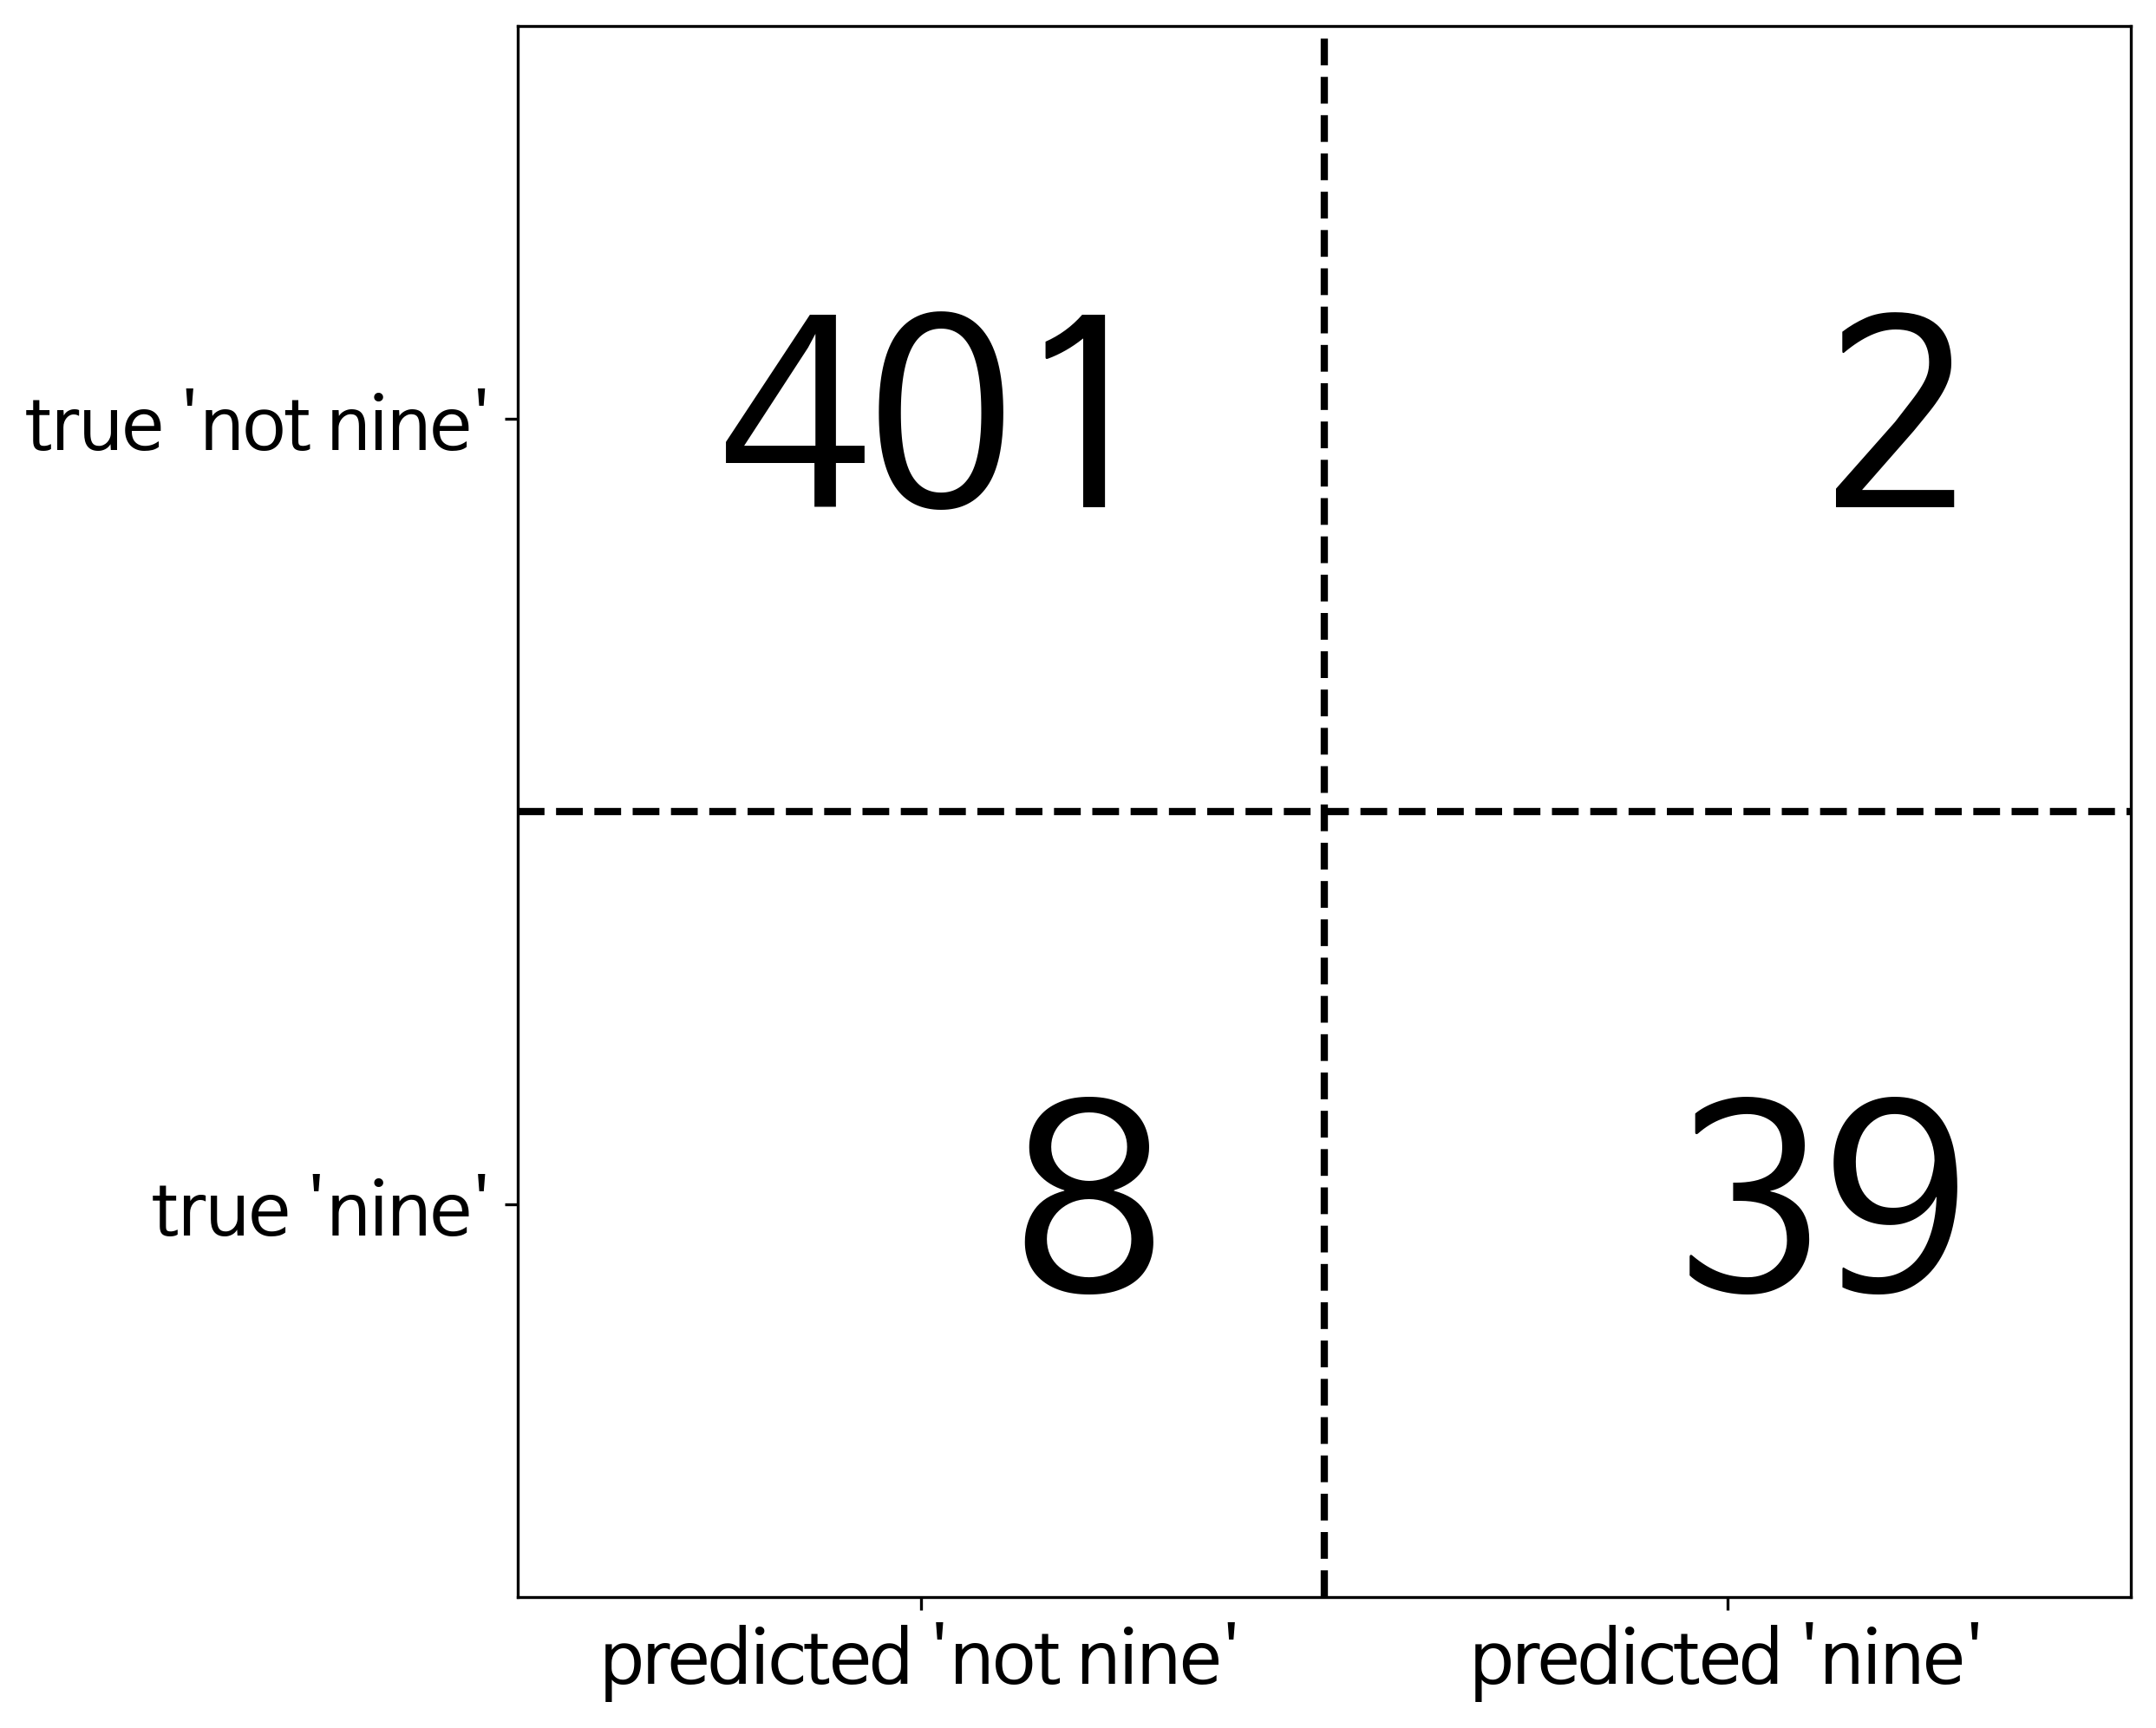

In [105]:
mglearn.plots.plot_confusion_matrix_illustration()

9와 9 아님 분류 문제의 오차 행렬 표현

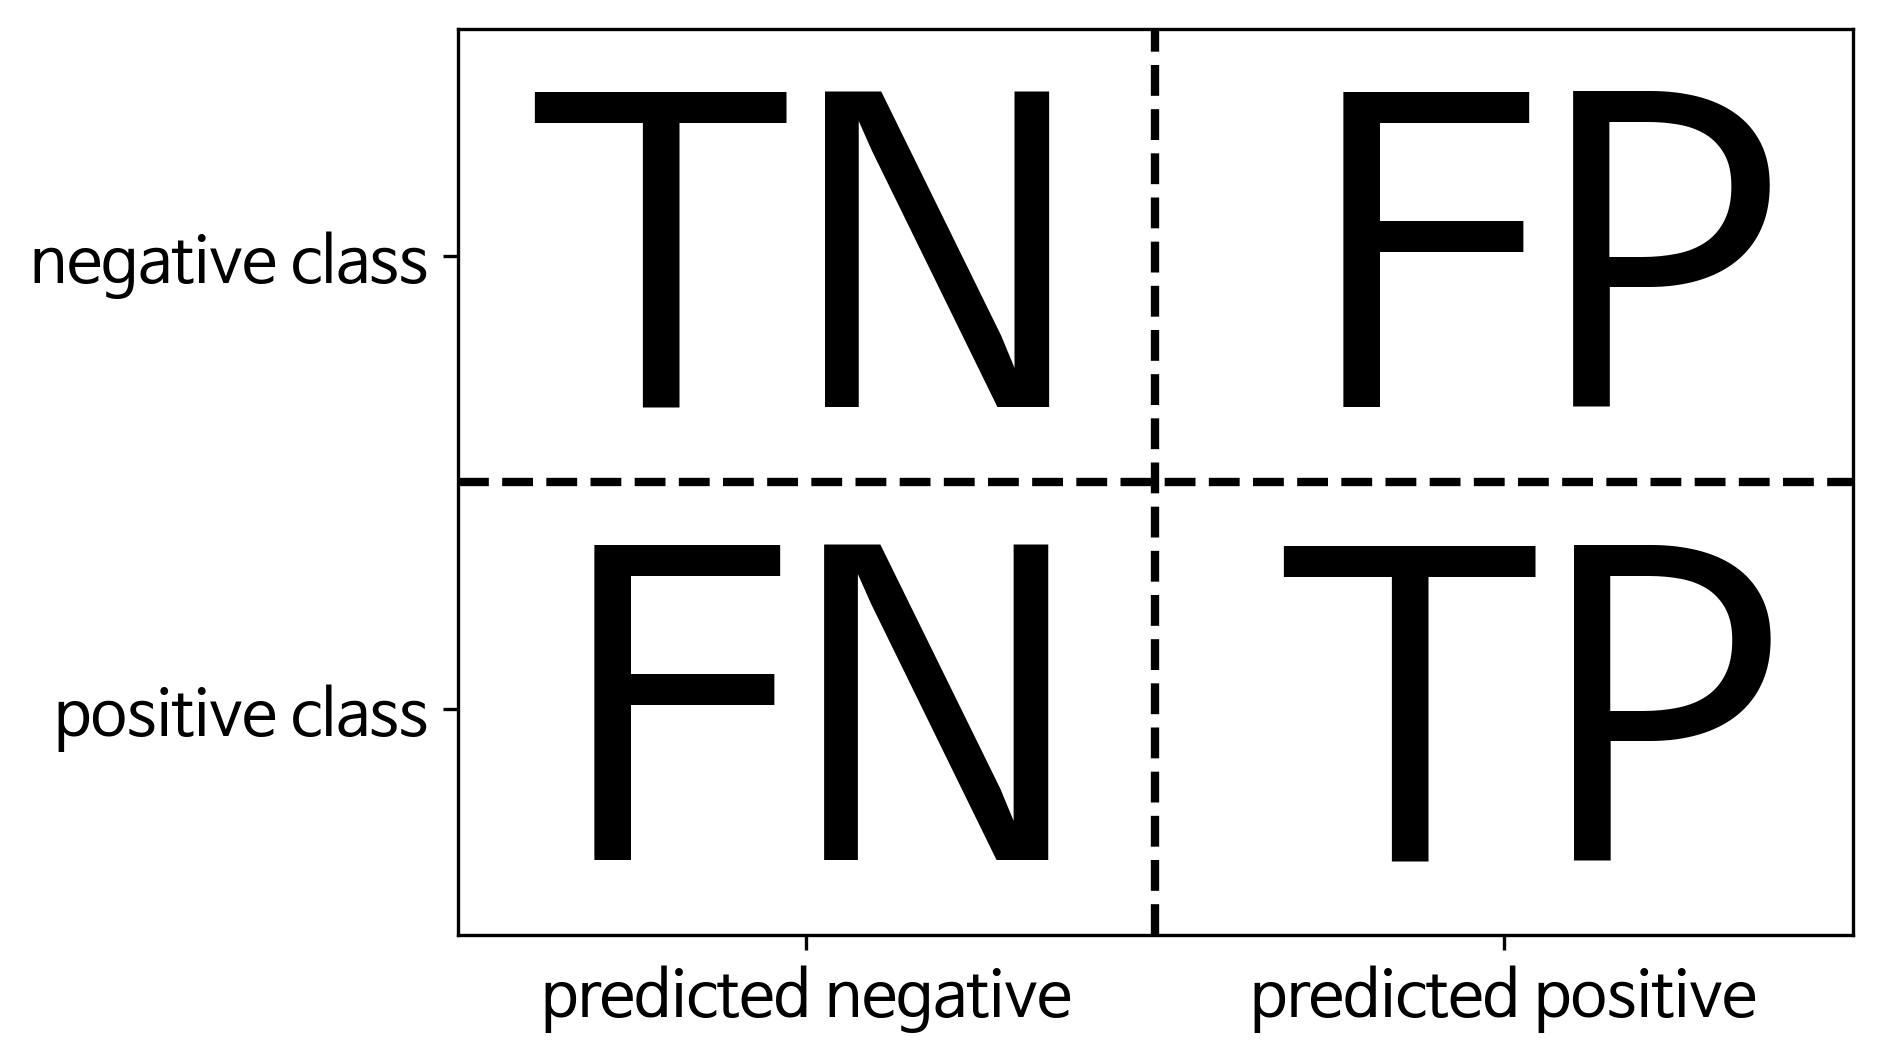

In [106]:
mglearn.plots.plot_binary_confusion_matrix()

오차 행렬 표현

In [107]:
print("빈도 기반 더미 모델:")
print(confusion_matrix(y_test, pred_most_frequent))
print("\n무작위 더미 모델:")
print(confusion_matrix(y_test, pred_dummy))
print("\n결정 트리:")
print(confusion_matrix(y_test, pred_tree))
print("\n로지스틱 회귀")
print(confusion_matrix(y_test, pred_logreg))

빈도 기반 더미 모델:
[[403   0]
 [ 47   0]]

무작위 더미 모델:
[[403   0]
 [ 47   0]]

결정 트리:
[[390  13]
 [ 24  23]]

로지스틱 회귀
[[401   2]
 [  8  39]]


In [108]:
from sklearn.metrics import f1_score

print("빈도 기반 더미 모델의 f1 score: {:.2f}".format(
    f1_score(y_test, pred_most_frequent)))
print("무작위 더미 모델의 f1 score: {:.2f}".format(f1_score(y_test, pred_dummy)))
print("트리 모델의 f1 score: {:.2f}".format(f1_score(y_test, pred_tree)))
print("로지스틱 회귀 모델의 f1 score: {:.2f}".format(
    f1_score(y_test, pred_logreg)))

빈도 기반 더미 모델의 f1 score: 0.00
무작위 더미 모델의 f1 score: 0.00
트리 모델의 f1 score: 0.55
로지스틱 회귀 모델의 f1 score: 0.89


더미 모델들의 점수가 0으로 확인, 트리 모델은 0.55로 약간 낮으나 로지스틱 회귀 모델의 점수가 꽤 높음을 확인 가능

In [109]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_most_frequent,
                            target_names=["9 아님", "9"]))

              precision    recall  f1-score   support

        9 아님       0.90      1.00      0.94       403
           9       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


classification_report를 사용해 정밀도, 재현율, f1-점수 계산

In [110]:
print(classification_report(y_test, pred_dummy,
                            target_names=["9 아님", "9"]))

              precision    recall  f1-score   support

        9 아님       0.90      1.00      0.94       403
           9       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [111]:
print(classification_report(y_test, pred_logreg,
                            target_names=["9 아님", "9"]))

              precision    recall  f1-score   support

        9 아님       0.98      1.00      0.99       403
           9       0.95      0.83      0.89        47

    accuracy                           0.98       450
   macro avg       0.97      0.91      0.94       450
weighted avg       0.98      0.98      0.98       450



In [112]:
from mglearn.datasets import make_blobs 

X, y = make_blobs(n_samples=(400, 50), centers=2, cluster_std=[7.0, 2],        
                  random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)    

D:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


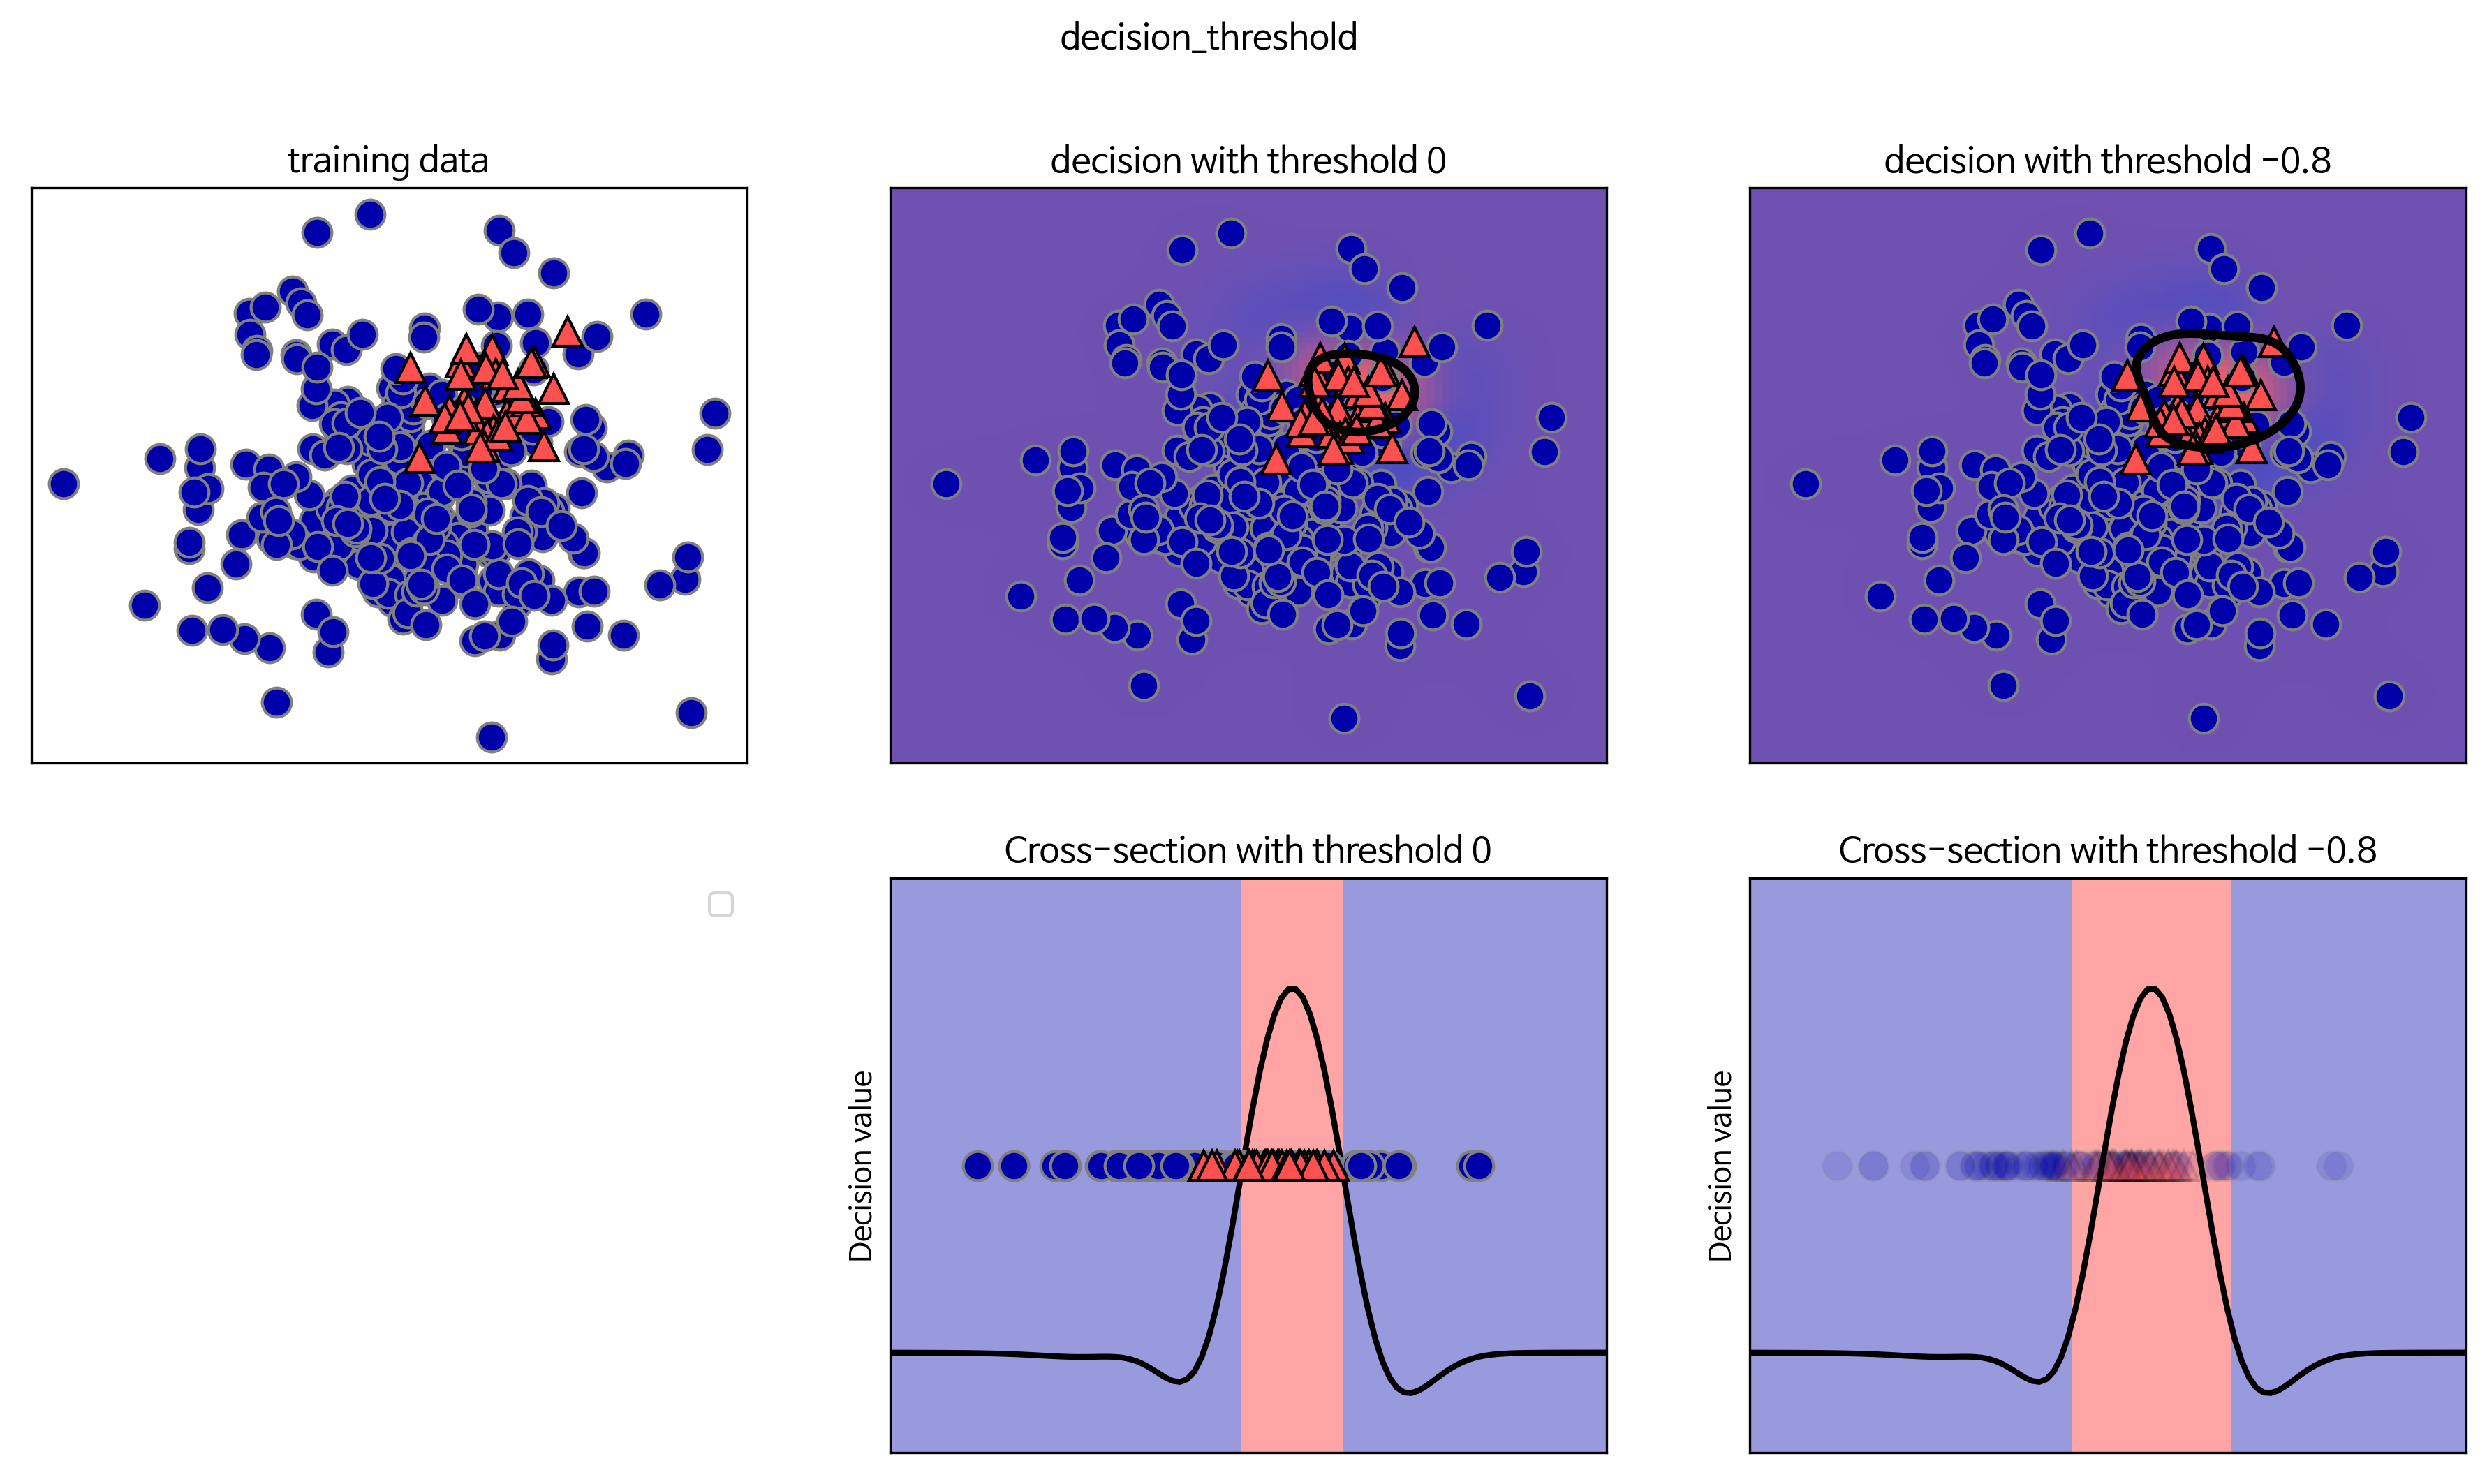

In [113]:
mglearn.plots.plot_decision_threshold()

결정 함수의 히트맵과 임계값 변화에 다른 영향 표현

In [114]:
print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       104
           1       0.35      0.67      0.46         9

    accuracy                           0.88       113
   macro avg       0.66      0.78      0.70       113
weighted avg       0.92      0.88      0.89       113



In [115]:
y_pred_lower_threshold = svc.decision_function(X_test) > -.8

더 많은 포인트가 클래스 1로 분류되려면 임계값 낮춰야함

In [116]:
print(classification_report(y_test, y_pred_lower_threshold))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90       104
           1       0.32      1.00      0.49         9

    accuracy                           0.83       113
   macro avg       0.66      0.91      0.69       113
weighted avg       0.95      0.83      0.87       113



재현율 높아지고 정밀도 낮아짐을 확인 가능

In [117]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(
    y_test, svc.decision_function(X_test))

D:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


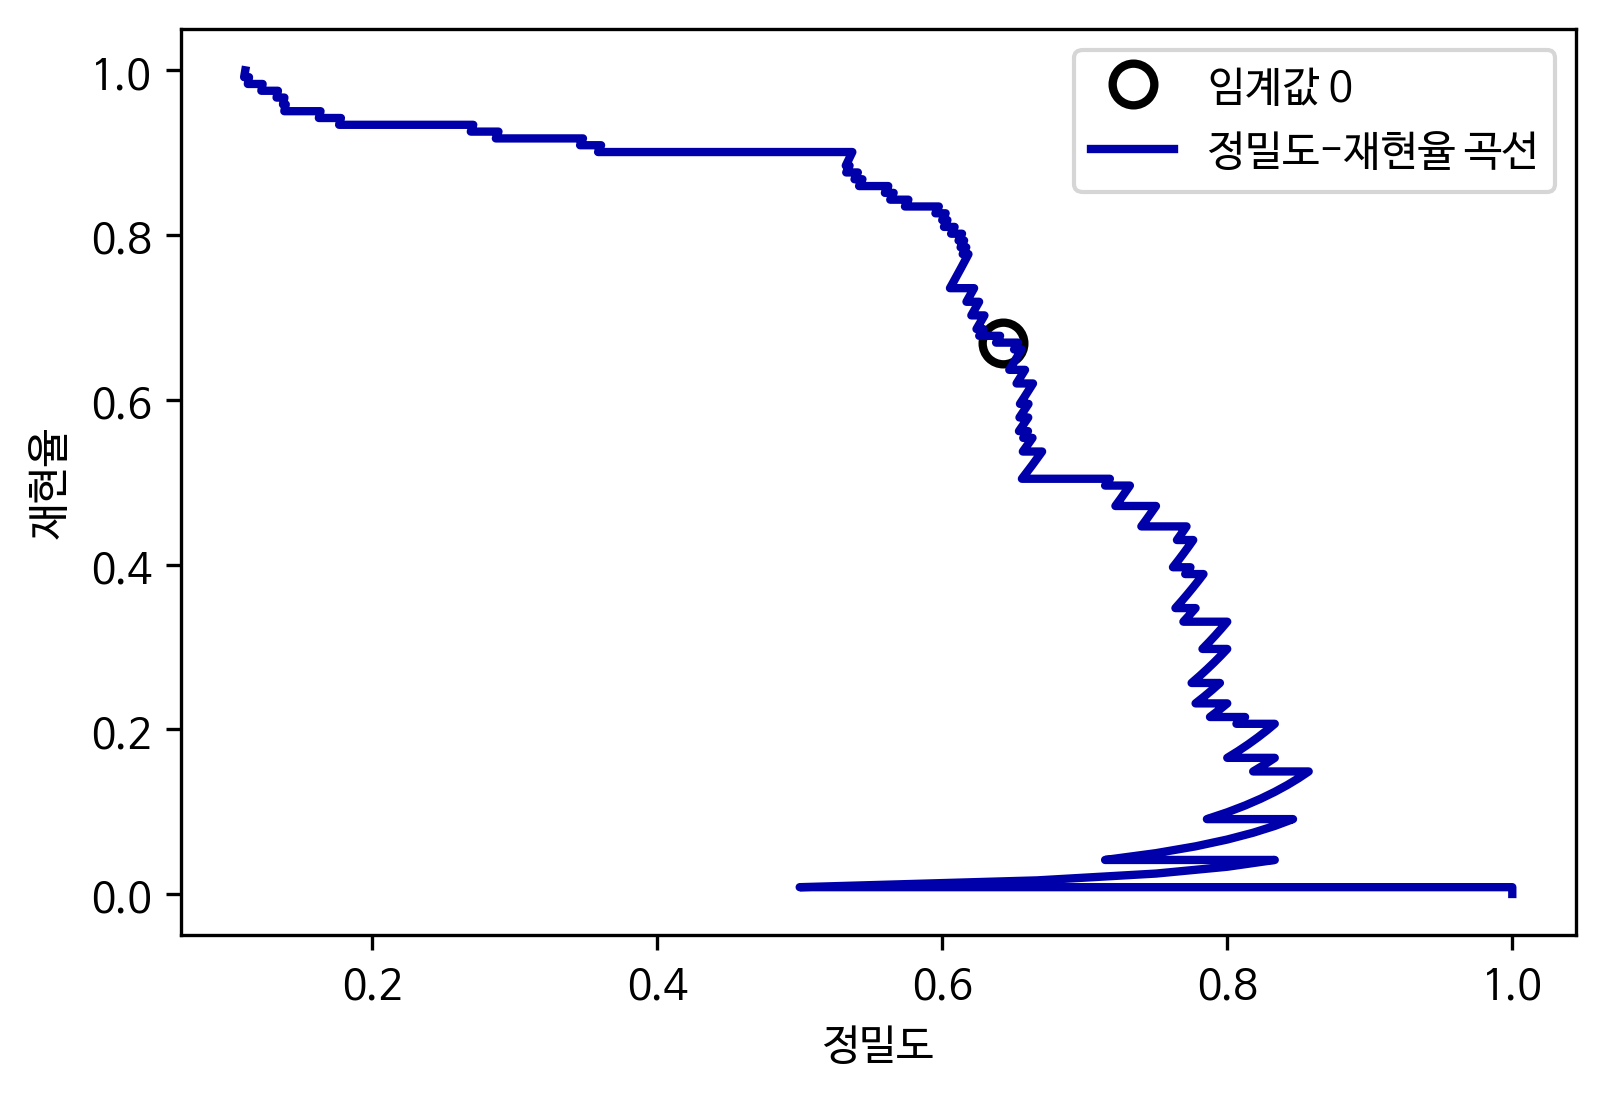

In [118]:
X, y = make_blobs(n_samples=(4000, 500), centers=2, cluster_std=[7.0, 2],
                  random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

svc = SVC(gamma=.05).fit(X_train, y_train)

precision, recall, thresholds = precision_recall_curve(
    y_test, svc.decision_function(X_test))
# 0에 가까운 임계값을 찾습니다
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="임계값 0", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="정밀도-재현율 곡선")
plt.xlabel("정밀도")
plt.ylabel("재현율")
plt.legend(loc="best")

precision_recall_curve 함수 사용해 가능한 모든 임계값에 대해 정밀도와 재현율의 값을 정렬된 리스트로 반환

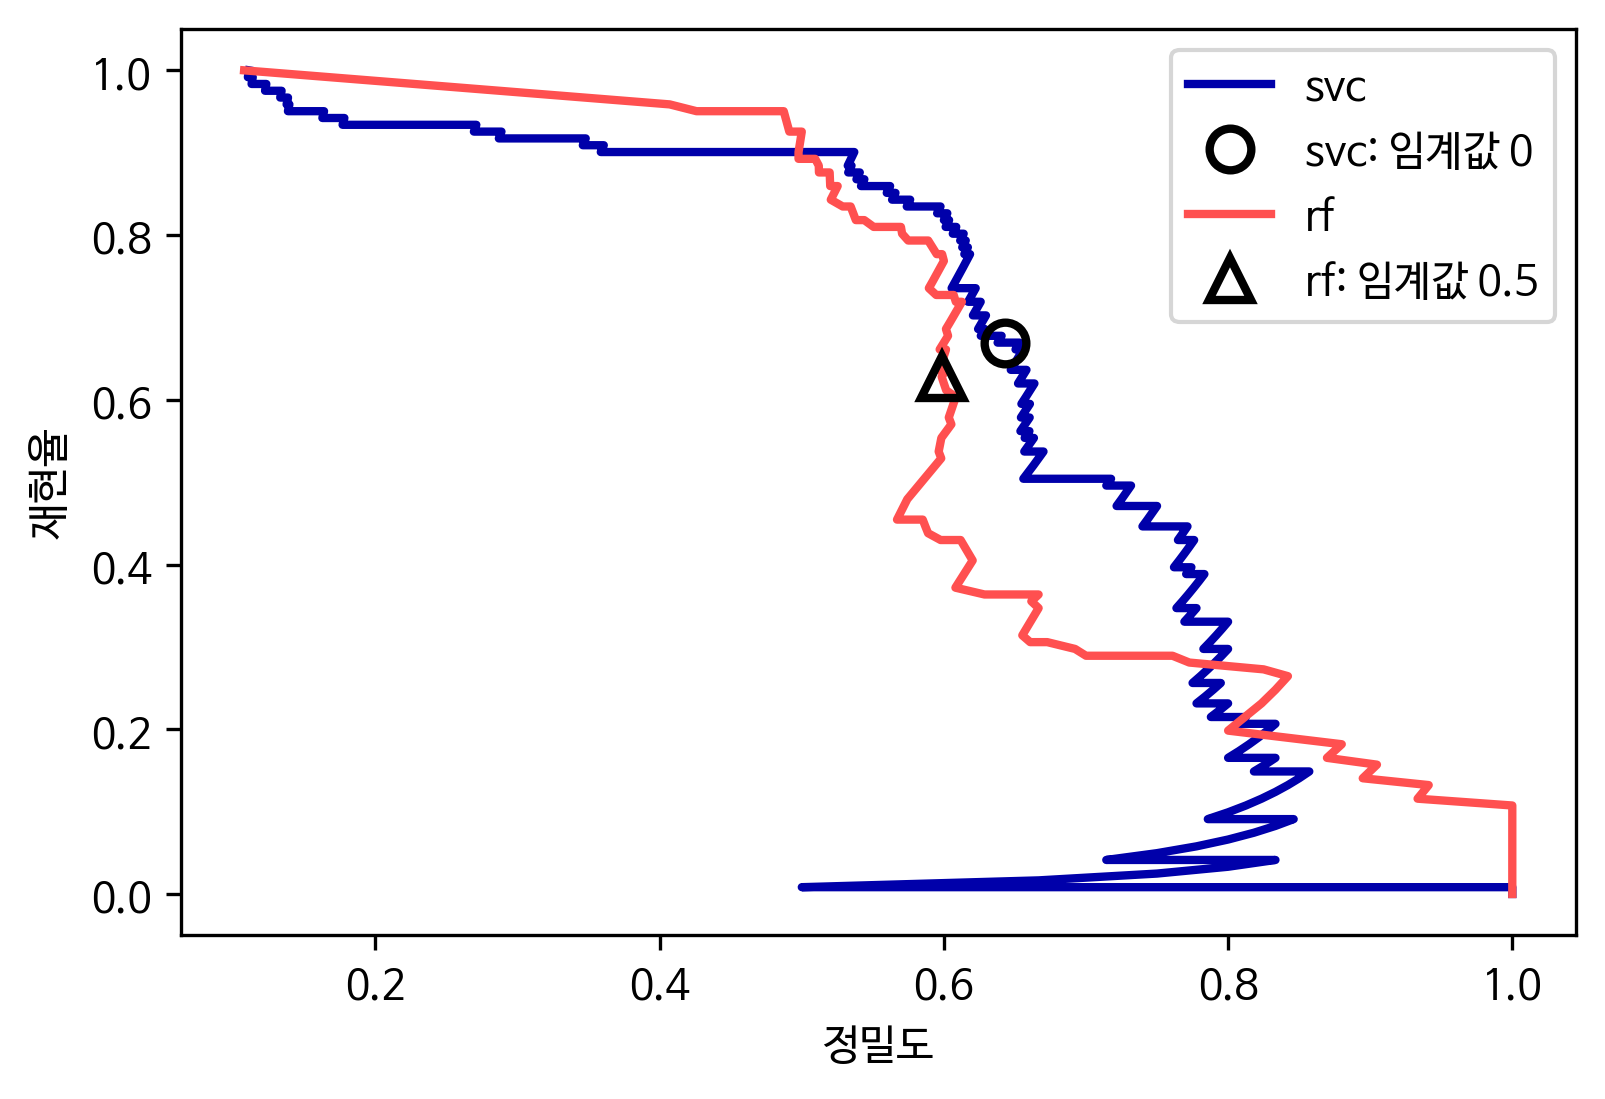

In [119]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)

# RandomForestClassifier는 decision_function 대신 predict_proba를 제공합니다.
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(
    y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(precision, recall, label="svc")

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="svc: 임계값 0", fillstyle="none", c='k', mew=2)

plt.plot(precision_rf, recall_rf, label="rf")

close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], '^', c='k',
         markersize=10, label="rf: 임계값 0.5", fillstyle="none", mew=2)
plt.xlabel("정밀도")
plt.ylabel("재현율")
plt.legend(loc="best")

SVM과 랜덤 포레스트의 정밀도-재현율 곡선 비교  
극단적인 부분은 랜덤 포레스트가 더욱 낫고, 정밀도 0.7부근에서는 SVM이 더욱 낫다

In [120]:
print("랜덤 포레스트의 f1_score: {:.3f}".format(
    f1_score(y_test, rf.predict(X_test))))
print("svc의 f1_score: {:.3f}".format(f1_score(y_test, svc.predict(X_test))))

랜덤 포레스트의 f1_score: 0.610
svc의 f1_score: 0.656


In [121]:
from sklearn.metrics import average_precision_score

ap_rf = average_precision_score(y_test, rf.predict_proba(X_test)[:, 1])
ap_svc = average_precision_score(y_test, svc.decision_function(X_test))
print("랜덤 포레스트의 평균 정밀도: {:.3f}".format(ap_rf))
print("svc의 평균 정밀도: {:.3f}".format(ap_svc))

랜덤 포레스트의 평균 정밀도: 0.660
svc의 평균 정밀도: 0.666


정밀도-재현율 곡선의 아랫부분 면적을 계산하는 평균 정밀도 계산

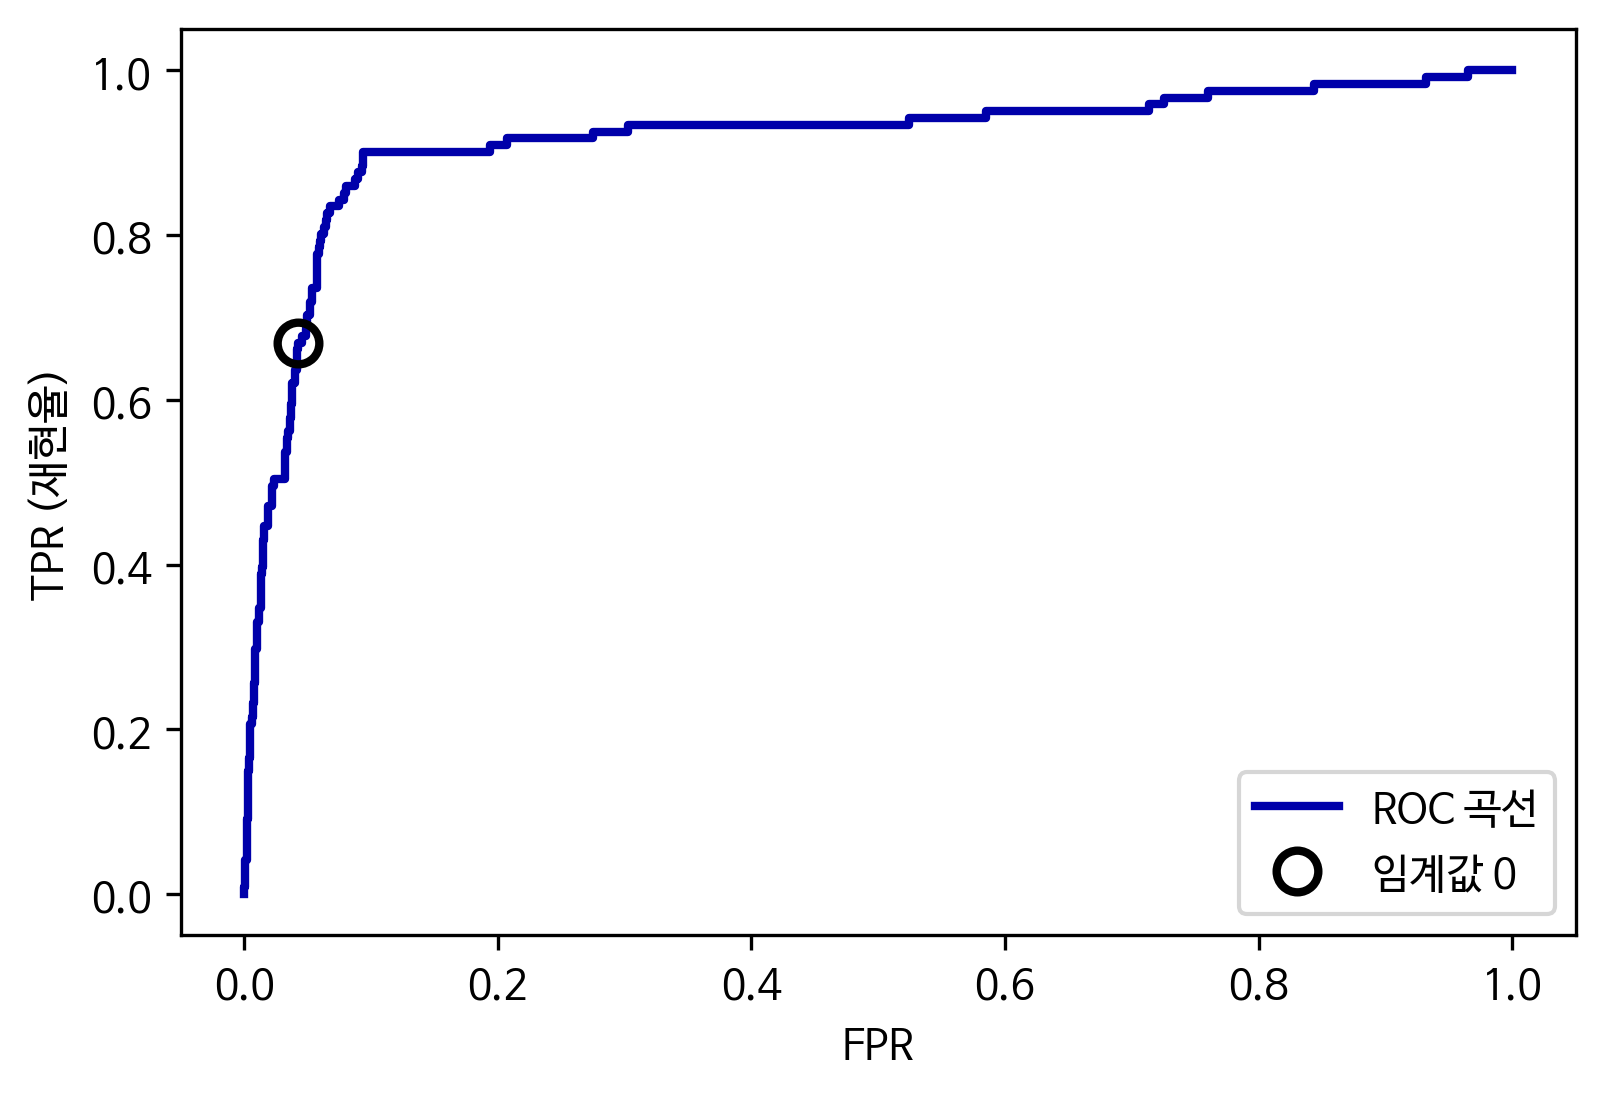

In [122]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))

plt.plot(fpr, tpr, label="ROC 곡선")
plt.xlabel("FPR")
plt.ylabel("TPR (재현율)")
# 0 근처의 임계값을 찾습니다
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="임계값 0", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

ROC곡선 roc_curve 사용해서 생성

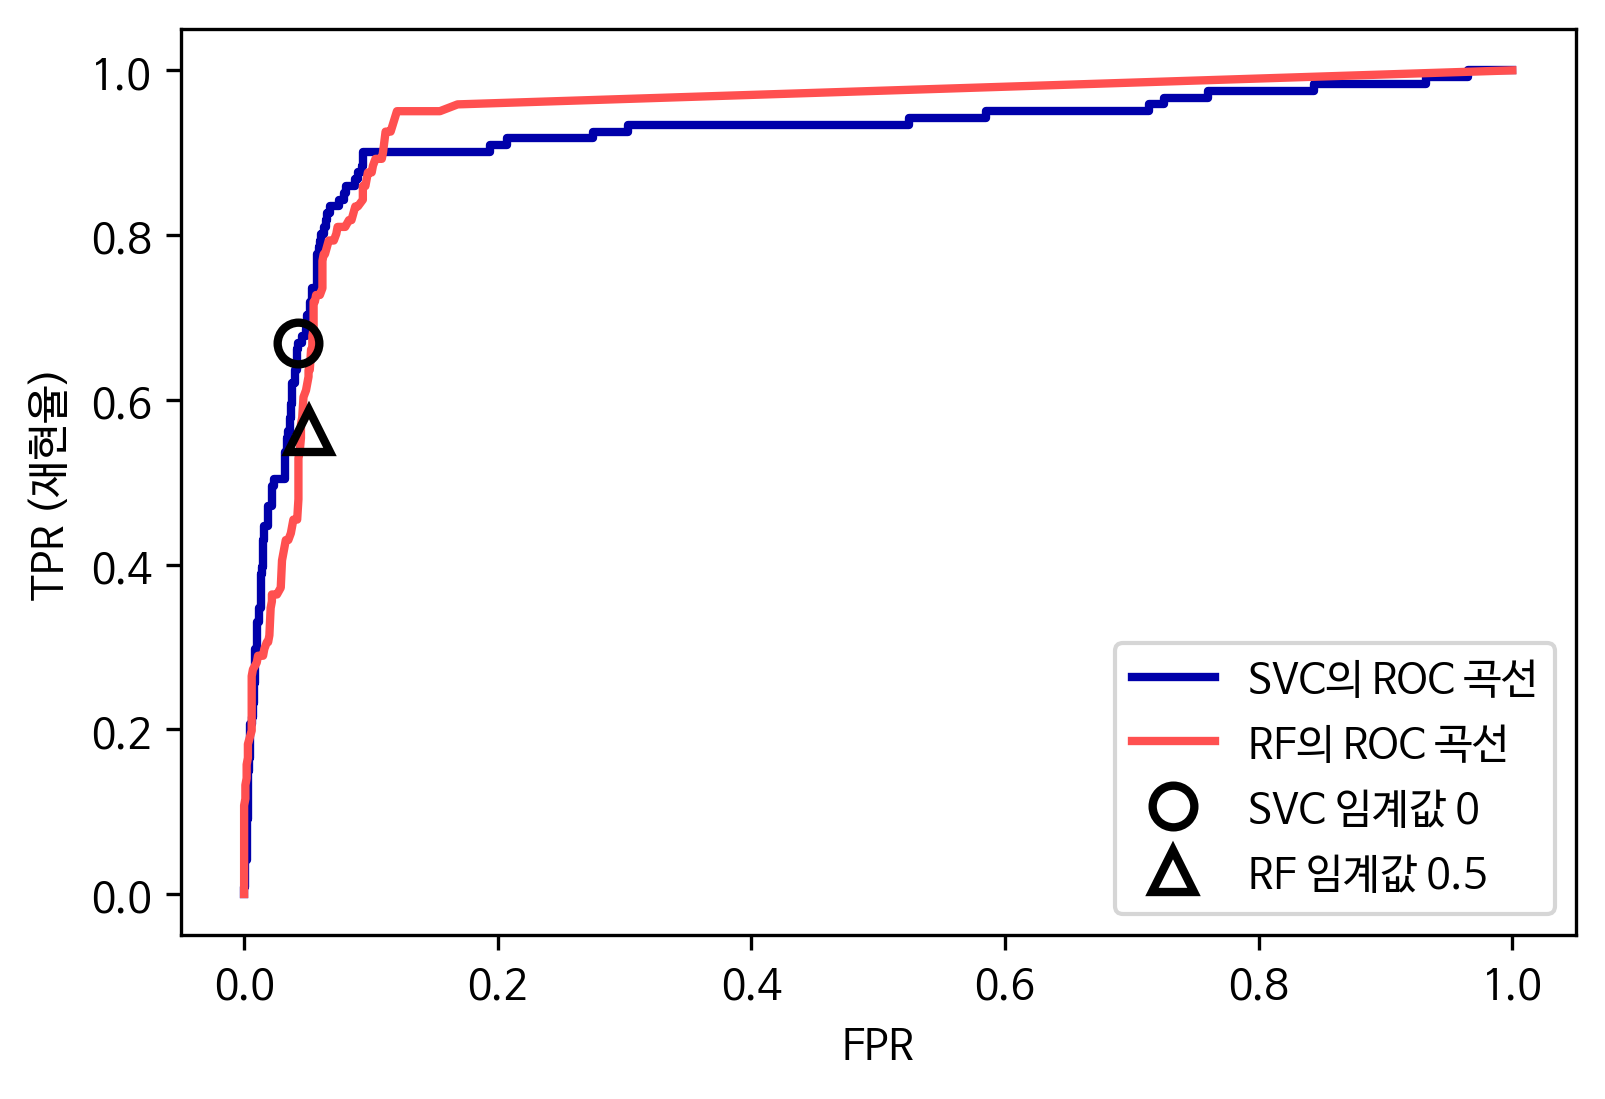

In [123]:
from sklearn.metrics import roc_curve

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(fpr, tpr, label="SVC의 ROC 곡선")
plt.plot(fpr_rf, tpr_rf, label="RF의 ROC 곡선")

plt.xlabel("FPR")
plt.ylabel("TPR (재현율)")
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="SVC 임계값 0", fillstyle="none", c='k', mew=2)
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(fpr_rf[close_default_rf], tpr[close_default_rf], '^', markersize=10,
         label="RF 임계값 0.5", fillstyle="none", c='k', mew=2)

plt.legend(loc=4)

SVM과 랜덤포레스트의 ROC곡선 비교

In [124]:
from sklearn.metrics import roc_auc_score

rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
svc_auc = roc_auc_score(y_test, svc.decision_function(X_test))
print("랜덤 포레스트의 AUC: {:.3f}".format(rf_auc))
print("SVC의 AUC: {:.3f}".format(svc_auc))

랜덤 포레스트의 AUC: 0.937
SVC의 AUC: 0.916


gamma = 1.00  정확도 = 0.90  AUC = 0.50
gamma = 0.10  정확도 = 0.90  AUC = 0.96
gamma = 0.01  정확도 = 0.90  AUC = 1.00


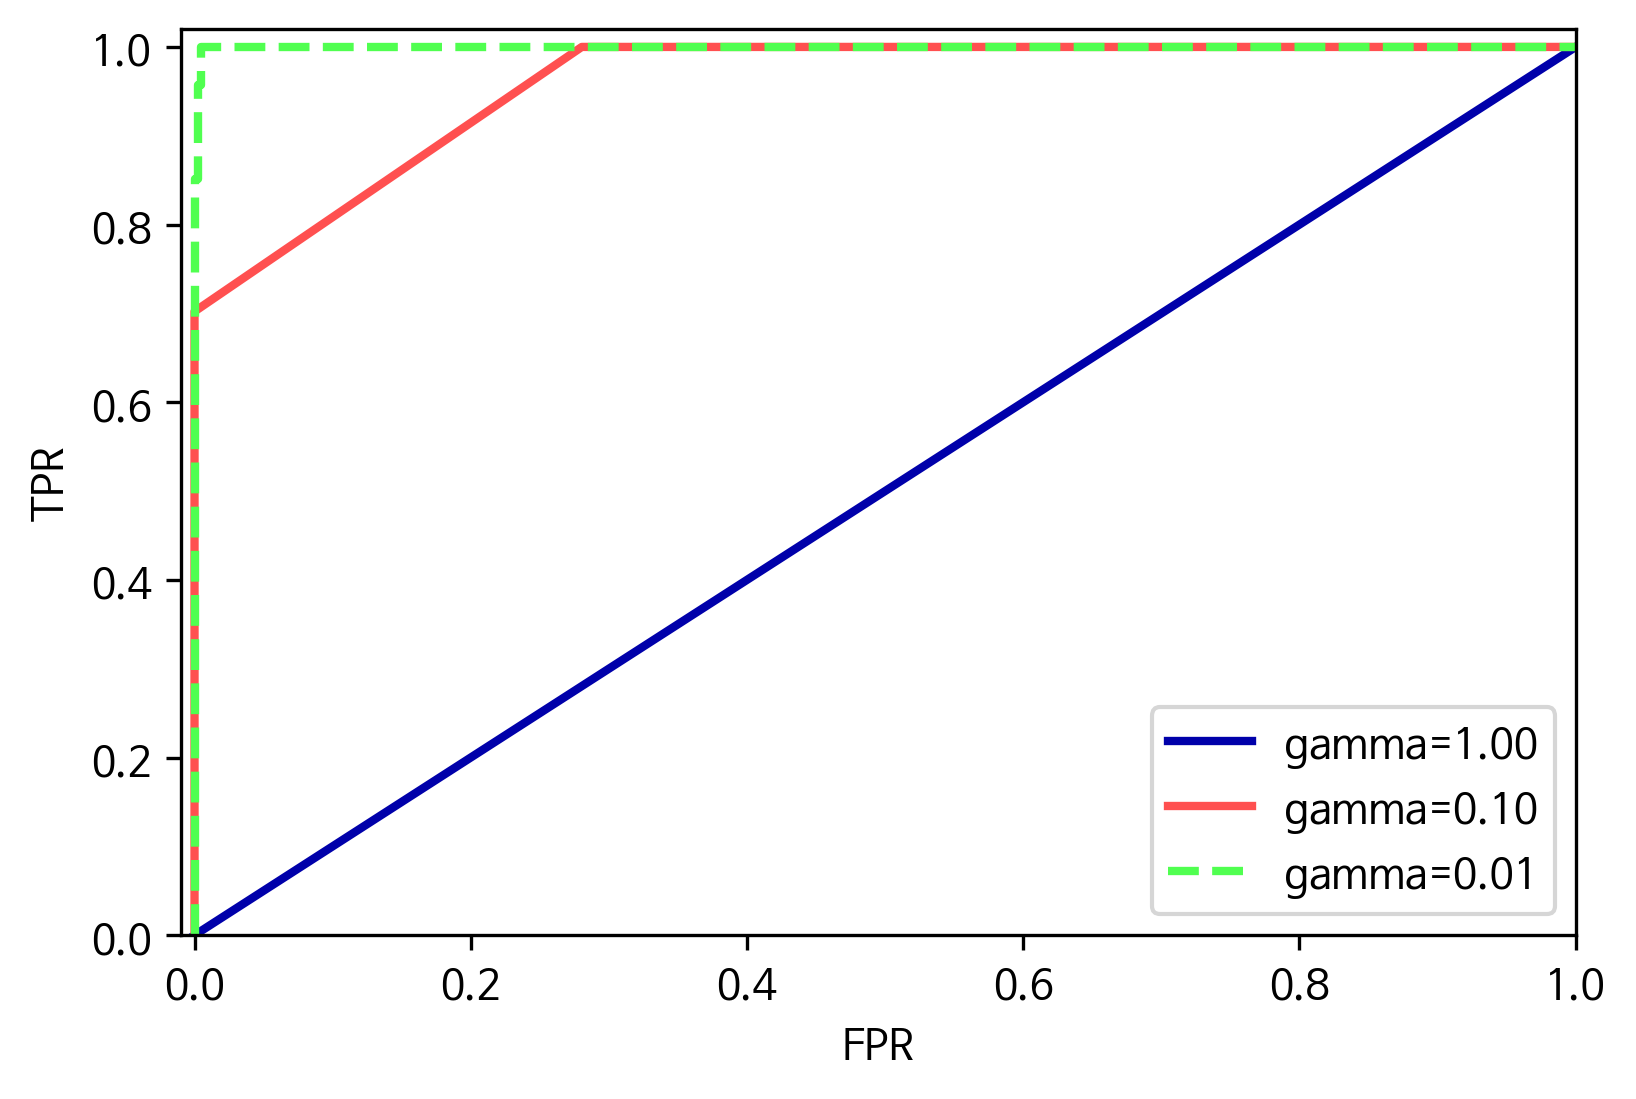

In [125]:
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(
    digits.data, y, random_state=0)

plt.figure()

for gamma in [1, 0.1, 0.01]:
    svc = SVC(gamma=gamma).fit(X_train, y_train)
    accuracy = svc.score(X_test, y_test)
    auc = roc_auc_score(y_test, svc.decision_function(X_test))
    fpr, tpr, _ = roc_curve(y_test , svc.decision_function(X_test))
    print("gamma = {:.2f}  정확도 = {:.2f}  AUC = {:.2f}".format(
        gamma, accuracy, auc))
    plt.plot(fpr, tpr, label="gamma={:.2f}".format(gamma))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim(-0.01, 1)
plt.ylim(0, 1.02)
plt.legend(loc="best")

각기 다른 감마를 가진 SVM의 ROC곡선 비교

In [126]:
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, random_state=0)
lr = LogisticRegression(solver='liblinear', multi_class='ovr').fit(X_train, y_train)
pred = lr.predict(X_test)
print("정확도: {:.3f}".format(accuracy_score(y_test, pred)))
print("오차 행렬:\n{}".format(confusion_matrix(y_test, pred)))

정확도: 0.953
오차 행렬:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  2  0  2  0]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  1 43  0  0  0  0  0  1]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  1  0  0  0 47  0  0  0  0]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  1  0  1  1  0  0 45  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  1  0  1  0  0  1 44]]


성능과 오차행렬 확인, 행은 정답 레이블, 열은 예측 레이블

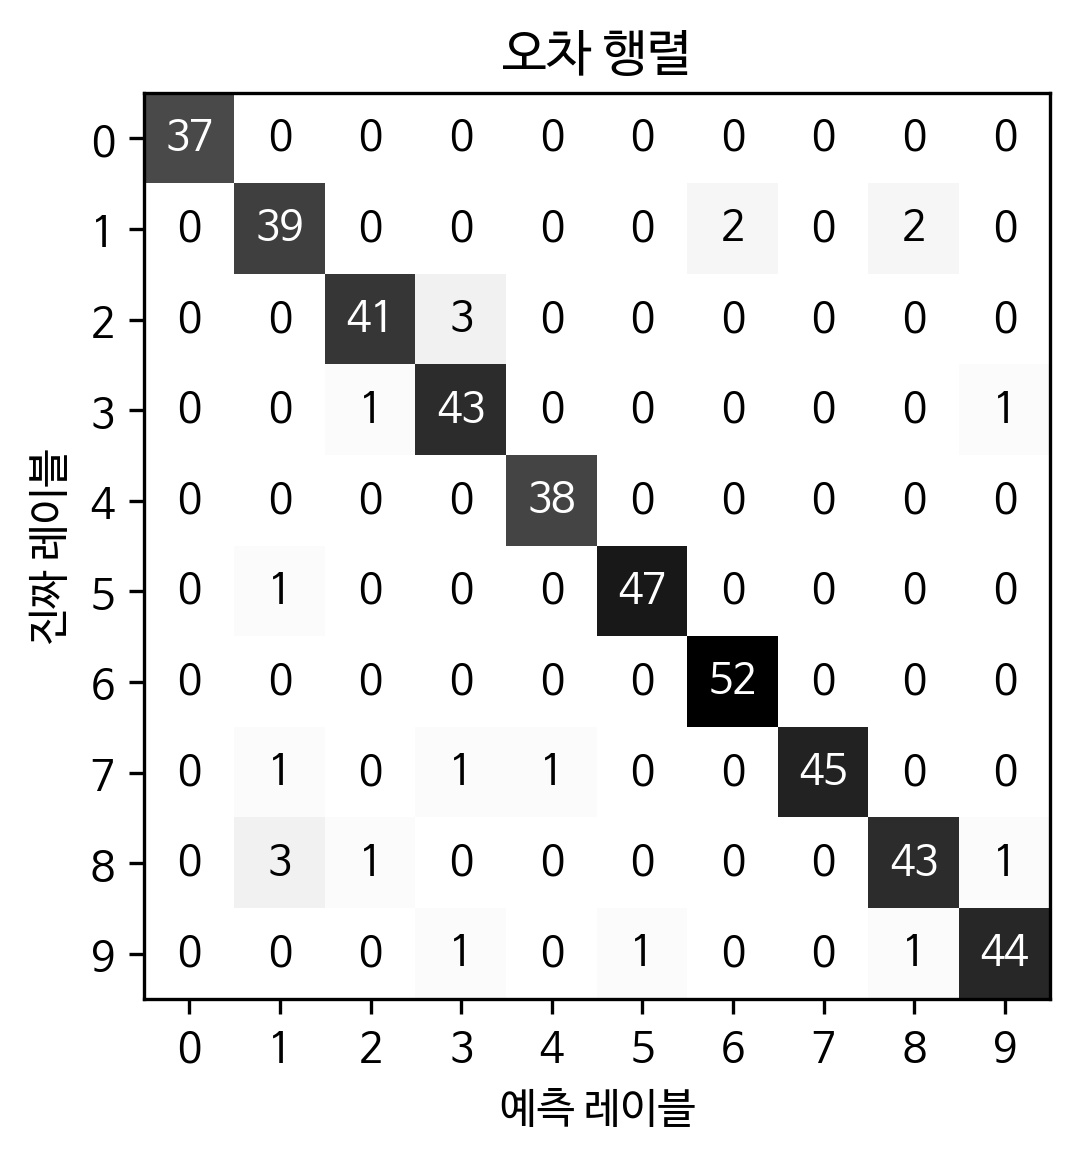

In [127]:
scores_image = mglearn.tools.heatmap(
    confusion_matrix(y_test, pred), xlabel='예측 레이블',
    ylabel='진짜 레이블', xticklabels=digits.target_names,
    yticklabels=digits.target_names, cmap=plt.cm.gray_r, fmt="%d")    
plt.title("오차 행렬")
plt.gca().invert_yaxis()

10개 숫자 분류 문제의 오차행렬

In [128]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.89      0.91      0.90        43
           2       0.95      0.93      0.94        44
           3       0.90      0.96      0.92        45
           4       0.97      1.00      0.99        38
           5       0.98      0.98      0.98        48
           6       0.96      1.00      0.98        52
           7       1.00      0.94      0.97        48
           8       0.93      0.90      0.91        48
           9       0.96      0.94      0.95        47

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



classification_report 사용해 정밀도, 재현율, f1-점수 계산

In [129]:
print("micro 평균 f1 점수: {:.3f}".format(f1_score(y_test, pred, average="micro")))
print("macro 평균 f1 점수: {:.3f}".format(f1_score(y_test, pred, average="macro")))

micro 평균 f1 점수: 0.953
macro 평균 f1 점수: 0.954


In [130]:
print("기본 평가 지표: {}".format(
      cross_val_score(SVC(gamma='auto'), digits.data, digits.target == 9, cv=3)))
# scoring="accuracy"의 결과는 같습니다.
explicit_accuracy =  cross_val_score(SVC(gamma='auto'), digits.data, digits.target == 9,
                                     scoring="accuracy", cv=3)
print("정확도 지표: {}".format(explicit_accuracy))
roc_auc =  cross_val_score(SVC(gamma='auto'), digits.data, digits.target == 9,
                           scoring="roc_auc", cv=3)
print("AUC 지표: {}".format(roc_auc))

기본 평가 지표: [0.9 0.9 0.9]
정확도 지표: [0.9 0.9 0.9]
AUC 지표: [0.994 0.99  0.996]


In [131]:
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target == 9, random_state=0)

param_grid = {'gamma': [0.0001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=3)
grid.fit(X_train, y_train)
print("정확도 지표를 사용한 그리드 서치")
print("최적의 파라미터:", grid.best_params_)
print("최상의 교차 검증 점수 (정확도)): {:.3f}".format(grid.best_score_))
print("테스트 세트 AUC: {:.3f}".format(
        roc_auc_score(y_test, grid.decision_function(X_test))))
print("테스트 세트 accuracy: {:.3f}".format(grid.score(X_test, y_test)))

정확도 지표를 사용한 그리드 서치
최적의 파라미터: {'gamma': 0.0001}
최상의 교차 검증 점수 (정확도)): 0.972
테스트 세트 AUC: 0.992
테스트 세트 accuracy: 0.973


In [132]:
grid = GridSearchCV(SVC(), param_grid=param_grid, scoring="roc_auc", cv=3)
grid.fit(X_train, y_train)
print("AUC 지표를 사용한 그리드 서치")
print("최적의 파라미터:", grid.best_params_)
print("최상의 교차 검증 점수 (AUC): {:.3f}".format(grid.best_score_))
print("테스트 세트 AUC: {:.3f}".format(grid.score(X_test, y_test)))

AUC 지표를 사용한 그리드 서치
최적의 파라미터: {'gamma': 0.01}
최상의 교차 검증 점수 (AUC): 0.997
테스트 세트 AUC: 1.000


In [133]:
from sklearn.metrics import SCORERS
print("가능한 평가 방식:\n{}".format(sorted(SCORERS.keys())))

가능한 평가 방식:
['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_root_mean_squared_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'rand_score', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'roc_auc_ovo', 'roc_auc_ovo_weighted', 'roc_auc_ovr', 'roc_auc_ovr_weighted', 'top_k_accuracy', 'v_measure